In [1]:
# Import relevant modules
import os
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from urllib.error import HTTPError
import xarray as xr
from datetime import timedelta, datetime
from datetime import date as DATE
import time
import calendar

In [3]:
# Makes a list of required dates
date_range = list(pd.date_range(start="1992-01-01",end="2022-03-02"))

# Print start and end dates as check
print(date_range[0], date_range[-1])

In [5]:
# Set up empty list to catch missing/failed dates
missing_dates = []

In [6]:
# Initialise counter of number of months averaged
avg_num = 1
# Loop over date range list
for i, date in enumerate(date_range):
    # Sleep code (to not cause too rapid access to server)
    time.sleep(0.5)
    
    # Get date
    d = date.date()
    # Get day number of date
    day_num = date.day
    
    
    ### This section of code starts by averaging the previous month's data, unless
    ### there is not a previous month in which case the averaging is skipped.
    ### Data is aquired below the ** AVERAGING ** section, and data for the previous
    ### month is averaged if the current date in the loop is the first of the month.
    
    ########### AVERAGING SECTION ###############
    
    # If day is 1st of month and this is not the first interation
    if (day_num == 1) and (i != 0):
        # If count is 1 (i.e Jan 1990) produce an month average of previous MLD measurments,
        # initialise 3D array to hold averages, and add one to count
        if avg_num == 1:
            mld_all = np.nanmean(mld_month, axis=2)
            avg_num += 1
        # Else produce an month average of previous MLD measurments,
        # append to 3D array, and add one to count
        else:
            mld_month_avg = np.nanmean(mld_month, axis=2)
            mld_all = np.dstack((mld_all, mld_month_avg))
            avg_num += 1
        
        # print number of averages completed and current 3D array shape
        print(avg_num, mld_all.shape)
    
    ############# DATA RETRIEVAL #################
    
    # Print current date is list
    print(d, end=' ') 
    
    # Try to access server for data on selected date
    try:
        url = f'http://apdrc.soest.hawaii.edu/erddap/griddap/hawaii_soest_baae_a144_d3b4.nc?mxldepth[({d}):1:({d}T00:00:00Z)][(-89.875):1:(89.875)][(0.125):1:(359.875)]'
        req = urllib.request.Request(url) # Request URL
        time.sleep(0.5) # Sleep to not overload server
        # If successful open dataset
        with urllib.request.urlopen(req) as resp:
            ds = xr.open_dataset(resp.read())
            
    # If HTTP error - print message and create/append array of NaNs (date dependent)
    except HTTPError:
        
        print('MISSING', end=' ') # Print error message
        missing_dates.append(d) # Append date to list of missing dates
        mld_r = np.full((720,1440),fill_value=np.nan) # Make array of NaNs
        
        # Initialise 2D array to store month dataif date is 1st of month, 
        # else append to already made array
        if day_num == 1:
            mld_month = mld_r
        else:
            mld_month = np.dstack((mld_month, mld_r))
    
    # If any other excpetion occurs stop loop over dates, flatten current array,
    # and save to file (this is becasue the server frequently stopped responding)
    except Exception as e:
        print(f'{e}: {e.with_traceback}') # Print error message
        # Flatten data
        for k in range(0, mld_all.shape[2]):
            if k == 0:
                mld_flat = mld_all[:,:,k]
            else:
                mld_flat = np.concatenate((mld_flat, mld_all[:,:,k]), axis=0)
        # Save data
        np.savetxt(f'mld_flat_199001_{date.year}{date.month}.csv', mld_flat, delimiter=',')
        # Break from loop
        break
    
    # If data is retrived 
    else:
        # Data is upside down and on wrong projection
        mld = np.flip(ds['mxldepth'][0,:,:].values,axis=0) # Flip right way up
        mld_1 = mld[:,:int(mld.shape[1]/2)] # Get first half array
        mld_2 = mld[:,int(mld.shape[1]/2):] # Get second half of array
        mld_r = np.concatenate((mld_2,mld_1), axis=1) # Concatenate them into desired projection
        
        # If 1st dat of the month initialise 2D array to hold current month's data
        if day_num == 1:
            mld_month = mld_r
        # Else append data to array
        else:
            mld_month = np.dstack((mld_month, mld_r))
    
    # Print when day data is retrieved, flipped & rearranged, and appended to 2D array
    print('complete', end='\n')

1992-01-01 complete
1992-01-02 complete
1992-01-03 complete
1992-01-04 complete
1992-01-05 complete
1992-01-06 complete
1992-01-07 complete
1992-01-08 complete
1992-01-09 complete
1992-01-10 complete
1992-01-11 complete
1992-01-12 complete
1992-01-13 complete
1992-01-14 complete
1992-01-15 complete
1992-01-16 complete
1992-01-17 complete
1992-01-18 complete
1992-01-19 complete
1992-01-20 complete
1992-01-21 complete
1992-01-22 complete
1992-01-23 complete
1992-01-24 complete
1992-01-25 complete
1992-01-26 complete
1992-01-27 complete
1992-01-28 complete
1992-01-29 complete
1992-01-30 complete
1992-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


2 (720, 1440)
1992-02-01 complete
1992-02-02 complete
1992-02-03 complete
1992-02-04 complete
1992-02-05 complete
1992-02-06 complete
1992-02-07 complete
1992-02-08 complete
1992-02-09 complete
1992-02-10 complete
1992-02-11 complete
1992-02-12 complete
1992-02-13 complete
1992-02-14 complete
1992-02-15 complete
1992-02-16 complete
1992-02-17 complete
1992-02-18 complete
1992-02-19 complete
1992-02-20 complete
1992-02-21 complete
1992-02-22 complete
1992-02-23 complete
1992-02-24 complete
1992-02-25 complete
1992-02-26 complete
1992-02-27 complete
1992-02-28 complete
1992-02-29 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


3 (720, 1440, 2)
1992-03-01 complete
1992-03-02 complete
1992-03-03 complete
1992-03-04 complete
1992-03-05 complete
1992-03-06 complete
1992-03-07 complete
1992-03-08 complete
1992-03-09 complete
1992-03-10 complete
1992-03-11 complete
1992-03-12 complete
1992-03-13 complete
1992-03-14 complete
1992-03-15 complete
1992-03-16 complete
1992-03-17 complete
1992-03-18 complete
1992-03-19 complete
1992-03-20 complete
1992-03-21 complete
1992-03-22 complete
1992-03-23 complete
1992-03-24 complete
1992-03-25 complete
1992-03-26 complete
1992-03-27 complete
1992-03-28 complete
1992-03-29 complete
1992-03-30 complete
1992-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


4 (720, 1440, 3)
1992-04-01 complete
1992-04-02 complete
1992-04-03 complete
1992-04-04 complete
1992-04-05 complete
1992-04-06 complete
1992-04-07 complete
1992-04-08 complete
1992-04-09 complete
1992-04-10 complete
1992-04-11 complete
1992-04-12 complete
1992-04-13 complete
1992-04-14 complete
1992-04-15 complete
1992-04-16 complete
1992-04-17 complete
1992-04-18 complete
1992-04-19 complete
1992-04-20 complete
1992-04-21 complete
1992-04-22 complete
1992-04-23 complete
1992-04-24 complete
1992-04-25 complete
1992-04-26 complete
1992-04-27 complete
1992-04-28 complete
1992-04-29 complete
1992-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


5 (720, 1440, 4)
1992-05-01 complete
1992-05-02 complete
1992-05-03 complete
1992-05-04 complete
1992-05-05 complete
1992-05-06 complete
1992-05-07 complete
1992-05-08 complete
1992-05-09 complete
1992-05-10 complete
1992-05-11 complete
1992-05-12 complete
1992-05-13 complete
1992-05-14 complete
1992-05-15 complete
1992-05-16 complete
1992-05-17 complete
1992-05-18 complete
1992-05-19 complete
1992-05-20 complete
1992-05-21 complete
1992-05-22 complete
1992-05-23 complete
1992-05-24 complete
1992-05-25 complete
1992-05-26 complete
1992-05-27 complete
1992-05-28 complete
1992-05-29 complete
1992-05-30 complete
1992-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


6 (720, 1440, 5)
1992-06-01 complete
1992-06-02 complete
1992-06-03 complete
1992-06-04 complete
1992-06-05 complete
1992-06-06 complete
1992-06-07 complete
1992-06-08 complete
1992-06-09 complete
1992-06-10 complete
1992-06-11 complete
1992-06-12 complete
1992-06-13 complete
1992-06-14 complete
1992-06-15 complete
1992-06-16 complete
1992-06-17 complete
1992-06-18 complete
1992-06-19 complete
1992-06-20 complete
1992-06-21 complete
1992-06-22 complete
1992-06-23 complete
1992-06-24 complete
1992-06-25 complete
1992-06-26 complete
1992-06-27 complete
1992-06-28 complete
1992-06-29 complete
1992-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


7 (720, 1440, 6)
1992-07-01 complete
1992-07-02 complete
1992-07-03 complete
1992-07-04 complete
1992-07-05 complete
1992-07-06 complete
1992-07-07 complete
1992-07-08 complete
1992-07-09 complete
1992-07-10 complete
1992-07-11 complete
1992-07-12 complete
1992-07-13 complete
1992-07-14 complete
1992-07-15 complete
1992-07-16 complete
1992-07-17 complete
1992-07-18 complete
1992-07-19 complete
1992-07-20 complete
1992-07-21 complete
1992-07-22 complete
1992-07-23 complete
1992-07-24 complete
1992-07-25 complete
1992-07-26 complete
1992-07-27 complete
1992-07-28 complete
1992-07-29 complete
1992-07-30 complete
1992-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


8 (720, 1440, 7)
1992-08-01 complete
1992-08-02 complete
1992-08-03 complete
1992-08-04 complete
1992-08-05 complete
1992-08-06 complete
1992-08-07 complete
1992-08-08 complete
1992-08-09 complete
1992-08-10 complete
1992-08-11 complete
1992-08-12 complete
1992-08-13 complete
1992-08-14 complete
1992-08-15 complete
1992-08-16 complete
1992-08-17 complete
1992-08-18 complete
1992-08-19 complete
1992-08-20 complete
1992-08-21 complete
1992-08-22 complete
1992-08-23 complete
1992-08-24 complete
1992-08-25 complete
1992-08-26 complete
1992-08-27 complete
1992-08-28 complete
1992-08-29 complete
1992-08-30 complete
1992-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


9 (720, 1440, 8)
1992-09-01 complete
1992-09-02 complete
1992-09-03 complete
1992-09-04 complete
1992-09-05 complete
1992-09-06 complete
1992-09-07 complete
1992-09-08 complete
1992-09-09 complete
1992-09-10 complete
1992-09-11 complete
1992-09-12 complete
1992-09-13 complete
1992-09-14 complete
1992-09-15 complete
1992-09-16 complete
1992-09-17 complete
1992-09-18 complete
1992-09-19 complete
1992-09-20 complete
1992-09-21 complete
1992-09-22 complete
1992-09-23 complete
1992-09-24 complete
1992-09-25 complete
1992-09-26 complete
1992-09-27 complete
1992-09-28 complete
1992-09-29 complete
1992-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


10 (720, 1440, 9)
1992-10-01 complete
1992-10-02 complete
1992-10-03 complete
1992-10-04 complete
1992-10-05 complete
1992-10-06 complete
1992-10-07 complete
1992-10-08 complete
1992-10-09 complete
1992-10-10 complete
1992-10-11 complete
1992-10-12 complete
1992-10-13 complete
1992-10-14 complete
1992-10-15 complete
1992-10-16 complete
1992-10-17 complete
1992-10-18 complete
1992-10-19 complete
1992-10-20 complete
1992-10-21 complete
1992-10-22 complete
1992-10-23 complete
1992-10-24 complete
1992-10-25 complete
1992-10-26 complete
1992-10-27 complete
1992-10-28 complete
1992-10-29 complete
1992-10-30 complete
1992-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


11 (720, 1440, 10)
1992-11-01 complete
1992-11-02 complete
1992-11-03 complete
1992-11-04 complete
1992-11-05 complete
1992-11-06 complete
1992-11-07 complete
1992-11-08 complete
1992-11-09 complete
1992-11-10 complete
1992-11-11 complete
1992-11-12 complete
1992-11-13 complete
1992-11-14 complete
1992-11-15 complete
1992-11-16 complete
1992-11-17 complete
1992-11-18 complete
1992-11-19 complete
1992-11-20 complete
1992-11-21 complete
1992-11-22 complete
1992-11-23 complete
1992-11-24 complete
1992-11-25 complete
1992-11-26 complete
1992-11-27 complete
1992-11-28 complete
1992-11-29 complete
1992-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


12 (720, 1440, 11)
1992-12-01 complete
1992-12-02 complete
1992-12-03 complete
1992-12-04 complete
1992-12-05 complete
1992-12-06 complete
1992-12-07 complete
1992-12-08 complete
1992-12-09 complete
1992-12-10 complete
1992-12-11 complete
1992-12-12 complete
1992-12-13 complete
1992-12-14 complete
1992-12-15 complete
1992-12-16 complete
1992-12-17 complete
1992-12-18 complete
1992-12-19 complete
1992-12-20 complete
1992-12-21 complete
1992-12-22 complete
1992-12-23 complete
1992-12-24 complete
1992-12-25 complete
1992-12-26 complete
1992-12-27 complete
1992-12-28 complete
1992-12-29 complete
1992-12-30 complete
1992-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


13 (720, 1440, 12)
1993-01-01 complete
1993-01-02 complete
1993-01-03 complete
1993-01-04 complete
1993-01-05 complete
1993-01-06 complete
1993-01-07 complete
1993-01-08 complete
1993-01-09 complete
1993-01-10 complete
1993-01-11 complete
1993-01-12 complete
1993-01-13 complete
1993-01-14 complete
1993-01-15 complete
1993-01-16 complete
1993-01-17 complete
1993-01-18 complete
1993-01-19 complete
1993-01-20 complete
1993-01-21 complete
1993-01-22 complete
1993-01-23 complete
1993-01-24 complete
1993-01-25 complete
1993-01-26 complete
1993-01-27 complete
1993-01-28 complete
1993-01-29 complete
1993-01-30 complete
1993-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


14 (720, 1440, 13)
1993-02-01 complete
1993-02-02 complete
1993-02-03 complete
1993-02-04 complete
1993-02-05 complete
1993-02-06 complete
1993-02-07 complete
1993-02-08 complete
1993-02-09 complete
1993-02-10 complete
1993-02-11 complete
1993-02-12 complete
1993-02-13 complete
1993-02-14 complete
1993-02-15 complete
1993-02-16 complete
1993-02-17 complete
1993-02-18 complete
1993-02-19 complete
1993-02-20 complete
1993-02-21 complete
1993-02-22 complete
1993-02-23 complete
1993-02-24 complete
1993-02-25 complete
1993-02-26 complete
1993-02-27 complete
1993-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


15 (720, 1440, 14)
1993-03-01 complete
1993-03-02 complete
1993-03-03 complete
1993-03-04 complete
1993-03-05 complete
1993-03-06 complete
1993-03-07 complete
1993-03-08 complete
1993-03-09 complete
1993-03-10 complete
1993-03-11 complete
1993-03-12 complete
1993-03-13 complete
1993-03-14 complete
1993-03-15 complete
1993-03-16 complete
1993-03-17 complete
1993-03-18 complete
1993-03-19 complete
1993-03-20 complete
1993-03-21 complete
1993-03-22 complete
1993-03-23 complete
1993-03-24 complete
1993-03-25 complete
1993-03-26 complete
1993-03-27 complete
1993-03-28 complete
1993-03-29 complete
1993-03-30 complete
1993-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


16 (720, 1440, 15)
1993-04-01 complete
1993-04-02 complete
1993-04-03 complete
1993-04-04 complete
1993-04-05 complete
1993-04-06 complete
1993-04-07 complete
1993-04-08 complete
1993-04-09 complete
1993-04-10 complete
1993-04-11 complete
1993-04-12 complete
1993-04-13 complete
1993-04-14 complete
1993-04-15 complete
1993-04-16 complete
1993-04-17 complete
1993-04-18 complete
1993-04-19 complete
1993-04-20 complete
1993-04-21 complete
1993-04-22 complete
1993-04-23 complete
1993-04-24 complete
1993-04-25 complete
1993-04-26 complete
1993-04-27 complete
1993-04-28 complete
1993-04-29 complete
1993-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


17 (720, 1440, 16)
1993-05-01 complete
1993-05-02 complete
1993-05-03 complete
1993-05-04 complete
1993-05-05 complete
1993-05-06 complete
1993-05-07 complete
1993-05-08 complete
1993-05-09 complete
1993-05-10 complete
1993-05-11 complete
1993-05-12 complete
1993-05-13 complete
1993-05-14 complete
1993-05-15 complete
1993-05-16 complete
1993-05-17 complete
1993-05-18 complete
1993-05-19 complete
1993-05-20 complete
1993-05-21 complete
1993-05-22 complete
1993-05-23 complete
1993-05-24 complete
1993-05-25 complete
1993-05-26 complete
1993-05-27 complete
1993-05-28 complete
1993-05-29 complete
1993-05-30 complete
1993-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


18 (720, 1440, 17)
1993-06-01 complete
1993-06-02 complete
1993-06-03 MISSING complete
1993-06-04 complete
1993-06-05 complete
1993-06-06 complete
1993-06-07 complete
1993-06-08 complete
1993-06-09 complete
1993-06-10 complete
1993-06-11 complete
1993-06-12 complete
1993-06-13 complete
1993-06-14 complete
1993-06-15 complete
1993-06-16 complete
1993-06-17 complete
1993-06-18 complete
1993-06-19 complete
1993-06-20 complete
1993-06-21 complete
1993-06-22 complete
1993-06-23 complete
1993-06-24 complete
1993-06-25 complete
1993-06-26 complete
1993-06-27 complete
1993-06-28 complete
1993-06-29 complete
1993-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


19 (720, 1440, 18)
1993-07-01 complete
1993-07-02 complete
1993-07-03 complete
1993-07-04 complete
1993-07-05 complete
1993-07-06 complete
1993-07-07 complete
1993-07-08 complete
1993-07-09 complete
1993-07-10 complete
1993-07-11 complete
1993-07-12 complete
1993-07-13 complete
1993-07-14 complete
1993-07-15 complete
1993-07-16 complete
1993-07-17 complete
1993-07-18 complete
1993-07-19 complete
1993-07-20 complete
1993-07-21 complete
1993-07-22 complete
1993-07-23 complete
1993-07-24 complete
1993-07-25 complete
1993-07-26 complete
1993-07-27 complete
1993-07-28 complete
1993-07-29 complete
1993-07-30 complete
1993-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


20 (720, 1440, 19)
1993-08-01 complete
1993-08-02 complete
1993-08-03 complete
1993-08-04 complete
1993-08-05 complete
1993-08-06 complete
1993-08-07 complete
1993-08-08 complete
1993-08-09 complete
1993-08-10 complete
1993-08-11 complete
1993-08-12 complete
1993-08-13 complete
1993-08-14 complete
1993-08-15 complete
1993-08-16 complete
1993-08-17 complete
1993-08-18 complete
1993-08-19 complete
1993-08-20 complete
1993-08-21 complete
1993-08-22 complete
1993-08-23 complete
1993-08-24 complete
1993-08-25 complete
1993-08-26 complete
1993-08-27 complete
1993-08-28 complete
1993-08-29 complete
1993-08-30 complete
1993-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


21 (720, 1440, 20)
1993-09-01 complete
1993-09-02 complete
1993-09-03 complete
1993-09-04 complete
1993-09-05 complete
1993-09-06 complete
1993-09-07 complete
1993-09-08 complete
1993-09-09 complete
1993-09-10 complete
1993-09-11 complete
1993-09-12 complete
1993-09-13 complete
1993-09-14 complete
1993-09-15 complete
1993-09-16 complete
1993-09-17 complete
1993-09-18 complete
1993-09-19 complete
1993-09-20 complete
1993-09-21 complete
1993-09-22 complete
1993-09-23 complete
1993-09-24 complete
1993-09-25 complete
1993-09-26 complete
1993-09-27 complete
1993-09-28 complete
1993-09-29 complete
1993-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


22 (720, 1440, 21)
1993-10-01 complete
1993-10-02 complete
1993-10-03 complete
1993-10-04 complete
1993-10-05 complete
1993-10-06 complete
1993-10-07 complete
1993-10-08 complete
1993-10-09 complete
1993-10-10 complete
1993-10-11 complete
1993-10-12 complete
1993-10-13 complete
1993-10-14 complete
1993-10-15 complete
1993-10-16 complete
1993-10-17 complete
1993-10-18 complete
1993-10-19 complete
1993-10-20 complete
1993-10-21 complete
1993-10-22 complete
1993-10-23 complete
1993-10-24 complete
1993-10-25 complete
1993-10-26 complete
1993-10-27 complete
1993-10-28 complete
1993-10-29 complete
1993-10-30 complete
1993-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


23 (720, 1440, 22)
1993-11-01 complete
1993-11-02 complete
1993-11-03 complete
1993-11-04 complete
1993-11-05 complete
1993-11-06 complete
1993-11-07 complete
1993-11-08 complete
1993-11-09 complete
1993-11-10 complete
1993-11-11 complete
1993-11-12 complete
1993-11-13 complete
1993-11-14 complete
1993-11-15 complete
1993-11-16 complete
1993-11-17 complete
1993-11-18 complete
1993-11-19 complete
1993-11-20 complete
1993-11-21 complete
1993-11-22 complete
1993-11-23 complete
1993-11-24 complete
1993-11-25 complete
1993-11-26 complete
1993-11-27 complete
1993-11-28 complete
1993-11-29 complete
1993-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


24 (720, 1440, 23)
1993-12-01 complete
1993-12-02 complete
1993-12-03 complete
1993-12-04 complete
1993-12-05 complete
1993-12-06 complete
1993-12-07 complete
1993-12-08 complete
1993-12-09 complete
1993-12-10 complete
1993-12-11 complete
1993-12-12 complete
1993-12-13 complete
1993-12-14 complete
1993-12-15 complete
1993-12-16 complete
1993-12-17 complete
1993-12-18 complete
1993-12-19 complete
1993-12-20 complete
1993-12-21 complete
1993-12-22 complete
1993-12-23 complete
1993-12-24 complete
1993-12-25 complete
1993-12-26 complete
1993-12-27 complete
1993-12-28 complete
1993-12-29 complete
1993-12-30 complete
1993-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


25 (720, 1440, 24)
1994-01-01 complete
1994-01-02 complete
1994-01-03 complete
1994-01-04 complete
1994-01-05 complete
1994-01-06 complete
1994-01-07 complete
1994-01-08 complete
1994-01-09 complete
1994-01-10 complete
1994-01-11 complete
1994-01-12 complete
1994-01-13 complete
1994-01-14 complete
1994-01-15 complete
1994-01-16 complete
1994-01-17 complete
1994-01-18 complete
1994-01-19 complete
1994-01-20 complete
1994-01-21 complete
1994-01-22 complete
1994-01-23 complete
1994-01-24 complete
1994-01-25 complete
1994-01-26 complete
1994-01-27 complete
1994-01-28 complete
1994-01-29 complete
1994-01-30 complete
1994-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


26 (720, 1440, 25)
1994-02-01 complete
1994-02-02 complete
1994-02-03 complete
1994-02-04 complete
1994-02-05 complete
1994-02-06 complete
1994-02-07 complete
1994-02-08 complete
1994-02-09 complete
1994-02-10 complete
1994-02-11 complete
1994-02-12 complete
1994-02-13 complete
1994-02-14 complete
1994-02-15 complete
1994-02-16 complete
1994-02-17 complete
1994-02-18 complete
1994-02-19 complete
1994-02-20 complete
1994-02-21 complete
1994-02-22 complete
1994-02-23 complete
1994-02-24 complete
1994-02-25 complete
1994-02-26 complete
1994-02-27 complete
1994-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


27 (720, 1440, 26)
1994-03-01 complete
1994-03-02 complete
1994-03-03 complete
1994-03-04 complete
1994-03-05 complete
1994-03-06 complete
1994-03-07 complete
1994-03-08 complete
1994-03-09 complete
1994-03-10 complete
1994-03-11 complete
1994-03-12 complete
1994-03-13 complete
1994-03-14 complete
1994-03-15 complete
1994-03-16 complete
1994-03-17 complete
1994-03-18 complete
1994-03-19 complete
1994-03-20 complete
1994-03-21 complete
1994-03-22 complete
1994-03-23 complete
1994-03-24 complete
1994-03-25 complete
1994-03-26 complete
1994-03-27 complete
1994-03-28 complete
1994-03-29 complete
1994-03-30 complete
1994-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


28 (720, 1440, 27)
1994-04-01 complete
1994-04-02 complete
1994-04-03 complete
1994-04-04 complete
1994-04-05 complete
1994-04-06 complete
1994-04-07 complete
1994-04-08 complete
1994-04-09 complete
1994-04-10 complete
1994-04-11 complete
1994-04-12 complete
1994-04-13 complete
1994-04-14 complete
1994-04-15 complete
1994-04-16 complete
1994-04-17 complete
1994-04-18 complete
1994-04-19 complete
1994-04-20 complete
1994-04-21 complete
1994-04-22 complete
1994-04-23 complete
1994-04-24 complete
1994-04-25 complete
1994-04-26 complete
1994-04-27 complete
1994-04-28 complete
1994-04-29 complete
1994-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


29 (720, 1440, 28)
1994-05-01 complete
1994-05-02 complete
1994-05-03 complete
1994-05-04 complete
1994-05-05 complete
1994-05-06 complete
1994-05-07 complete
1994-05-08 complete
1994-05-09 complete
1994-05-10 complete
1994-05-11 complete
1994-05-12 complete
1994-05-13 complete
1994-05-14 complete
1994-05-15 complete
1994-05-16 complete
1994-05-17 complete
1994-05-18 complete
1994-05-19 complete
1994-05-20 complete
1994-05-21 complete
1994-05-22 complete
1994-05-23 complete
1994-05-24 complete
1994-05-25 complete
1994-05-26 complete
1994-05-27 complete
1994-05-28 complete
1994-05-29 complete
1994-05-30 complete
1994-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


30 (720, 1440, 29)
1994-06-01 complete
1994-06-02 complete
1994-06-03 complete
1994-06-04 complete
1994-06-05 complete
1994-06-06 complete
1994-06-07 complete
1994-06-08 complete
1994-06-09 complete
1994-06-10 complete
1994-06-11 complete
1994-06-12 complete
1994-06-13 complete
1994-06-14 complete
1994-06-15 complete
1994-06-16 complete
1994-06-17 complete
1994-06-18 complete
1994-06-19 complete
1994-06-20 complete
1994-06-21 complete
1994-06-22 complete
1994-06-23 complete
1994-06-24 complete
1994-06-25 complete
1994-06-26 complete
1994-06-27 complete
1994-06-28 complete
1994-06-29 complete
1994-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


31 (720, 1440, 30)
1994-07-01 complete
1994-07-02 complete
1994-07-03 complete
1994-07-04 complete
1994-07-05 complete
1994-07-06 complete
1994-07-07 complete
1994-07-08 complete
1994-07-09 complete
1994-07-10 complete
1994-07-11 complete
1994-07-12 complete
1994-07-13 complete
1994-07-14 complete
1994-07-15 complete
1994-07-16 complete
1994-07-17 complete
1994-07-18 complete
1994-07-19 MISSING complete
1994-07-20 complete
1994-07-21 complete
1994-07-22 complete
1994-07-23 complete
1994-07-24 complete
1994-07-25 complete
1994-07-26 complete
1994-07-27 complete
1994-07-28 complete
1994-07-29 complete
1994-07-30 complete
1994-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


32 (720, 1440, 31)
1994-08-01 complete
1994-08-02 complete
1994-08-03 complete
1994-08-04 complete
1994-08-05 complete
1994-08-06 complete
1994-08-07 complete
1994-08-08 complete
1994-08-09 complete
1994-08-10 complete
1994-08-11 complete
1994-08-12 complete
1994-08-13 complete
1994-08-14 complete
1994-08-15 complete
1994-08-16 complete
1994-08-17 complete
1994-08-18 complete
1994-08-19 complete
1994-08-20 complete
1994-08-21 complete
1994-08-22 complete
1994-08-23 complete
1994-08-24 complete
1994-08-25 complete
1994-08-26 complete
1994-08-27 complete
1994-08-28 complete
1994-08-29 complete
1994-08-30 complete
1994-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


33 (720, 1440, 32)
1994-09-01 complete
1994-09-02 complete
1994-09-03 complete
1994-09-04 complete
1994-09-05 complete
1994-09-06 complete
1994-09-07 complete
1994-09-08 complete
1994-09-09 complete
1994-09-10 complete
1994-09-11 complete
1994-09-12 complete
1994-09-13 complete
1994-09-14 complete
1994-09-15 complete
1994-09-16 complete
1994-09-17 complete
1994-09-18 complete
1994-09-19 complete
1994-09-20 complete
1994-09-21 complete
1994-09-22 complete
1994-09-23 complete
1994-09-24 complete
1994-09-25 complete
1994-09-26 complete
1994-09-27 complete
1994-09-28 complete
1994-09-29 complete
1994-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


34 (720, 1440, 33)
1994-10-01 complete
1994-10-02 complete
1994-10-03 complete
1994-10-04 complete
1994-10-05 complete
1994-10-06 complete
1994-10-07 complete
1994-10-08 complete
1994-10-09 complete
1994-10-10 complete
1994-10-11 complete
1994-10-12 complete
1994-10-13 complete
1994-10-14 complete
1994-10-15 complete
1994-10-16 complete
1994-10-17 complete
1994-10-18 complete
1994-10-19 complete
1994-10-20 complete
1994-10-21 complete
1994-10-22 complete
1994-10-23 complete
1994-10-24 complete
1994-10-25 complete
1994-10-26 complete
1994-10-27 complete
1994-10-28 complete
1994-10-29 complete
1994-10-30 complete
1994-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


35 (720, 1440, 34)
1994-11-01 complete
1994-11-02 complete
1994-11-03 complete
1994-11-04 complete
1994-11-05 complete
1994-11-06 complete
1994-11-07 complete
1994-11-08 complete
1994-11-09 complete
1994-11-10 complete
1994-11-11 complete
1994-11-12 complete
1994-11-13 complete
1994-11-14 complete
1994-11-15 complete
1994-11-16 complete
1994-11-17 complete
1994-11-18 complete
1994-11-19 complete
1994-11-20 complete
1994-11-21 complete
1994-11-22 complete
1994-11-23 complete
1994-11-24 complete
1994-11-25 complete
1994-11-26 complete
1994-11-27 complete
1994-11-28 complete
1994-11-29 complete
1994-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


36 (720, 1440, 35)
1994-12-01 complete
1994-12-02 complete
1994-12-03 complete
1994-12-04 complete
1994-12-05 complete
1994-12-06 complete
1994-12-07 complete
1994-12-08 complete
1994-12-09 complete
1994-12-10 complete
1994-12-11 complete
1994-12-12 complete
1994-12-13 complete
1994-12-14 complete
1994-12-15 complete
1994-12-16 complete
1994-12-17 complete
1994-12-18 complete
1994-12-19 complete
1994-12-20 complete
1994-12-21 complete
1994-12-22 complete
1994-12-23 complete
1994-12-24 complete
1994-12-25 complete
1994-12-26 complete
1994-12-27 complete
1994-12-28 complete
1994-12-29 complete
1994-12-30 complete
1994-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


37 (720, 1440, 36)
1995-01-01 complete
1995-01-02 complete
1995-01-03 complete
1995-01-04 complete
1995-01-05 complete
1995-01-06 complete
1995-01-07 complete
1995-01-08 complete
1995-01-09 complete
1995-01-10 complete
1995-01-11 complete
1995-01-12 complete
1995-01-13 complete
1995-01-14 complete
1995-01-15 complete
1995-01-16 complete
1995-01-17 complete
1995-01-18 complete
1995-01-19 complete
1995-01-20 complete
1995-01-21 complete
1995-01-22 complete
1995-01-23 complete
1995-01-24 complete
1995-01-25 complete
1995-01-26 complete
1995-01-27 complete
1995-01-28 complete
1995-01-29 complete
1995-01-30 complete
1995-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


38 (720, 1440, 37)
1995-02-01 complete
1995-02-02 complete
1995-02-03 complete
1995-02-04 complete
1995-02-05 complete
1995-02-06 complete
1995-02-07 complete
1995-02-08 complete
1995-02-09 complete
1995-02-10 complete
1995-02-11 complete
1995-02-12 complete
1995-02-13 complete
1995-02-14 complete
1995-02-15 complete
1995-02-16 complete
1995-02-17 complete
1995-02-18 complete
1995-02-19 complete
1995-02-20 complete
1995-02-21 complete
1995-02-22 complete
1995-02-23 complete
1995-02-24 complete
1995-02-25 complete
1995-02-26 complete
1995-02-27 complete
1995-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


39 (720, 1440, 38)
1995-03-01 complete
1995-03-02 complete
1995-03-03 complete
1995-03-04 complete
1995-03-05 complete
1995-03-06 complete
1995-03-07 complete
1995-03-08 complete
1995-03-09 complete
1995-03-10 complete
1995-03-11 complete
1995-03-12 complete
1995-03-13 complete
1995-03-14 complete
1995-03-15 complete
1995-03-16 complete
1995-03-17 complete
1995-03-18 complete
1995-03-19 complete
1995-03-20 complete
1995-03-21 complete
1995-03-22 complete
1995-03-23 complete
1995-03-24 complete
1995-03-25 complete
1995-03-26 complete
1995-03-27 complete
1995-03-28 complete
1995-03-29 complete
1995-03-30 complete
1995-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


40 (720, 1440, 39)
1995-04-01 complete
1995-04-02 complete
1995-04-03 complete
1995-04-04 complete
1995-04-05 complete
1995-04-06 complete
1995-04-07 complete
1995-04-08 complete
1995-04-09 complete
1995-04-10 complete
1995-04-11 complete
1995-04-12 complete
1995-04-13 complete
1995-04-14 complete
1995-04-15 complete
1995-04-16 complete
1995-04-17 complete
1995-04-18 complete
1995-04-19 complete
1995-04-20 complete
1995-04-21 complete
1995-04-22 complete
1995-04-23 complete
1995-04-24 complete
1995-04-25 complete
1995-04-26 complete
1995-04-27 complete
1995-04-28 complete
1995-04-29 complete
1995-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


41 (720, 1440, 40)
1995-05-01 complete
1995-05-02 complete
1995-05-03 complete
1995-05-04 complete
1995-05-05 complete
1995-05-06 complete
1995-05-07 complete
1995-05-08 complete
1995-05-09 complete
1995-05-10 complete
1995-05-11 complete
1995-05-12 complete
1995-05-13 complete
1995-05-14 complete
1995-05-15 complete
1995-05-16 complete
1995-05-17 complete
1995-05-18 complete
1995-05-19 complete
1995-05-20 complete
1995-05-21 complete
1995-05-22 complete
1995-05-23 complete
1995-05-24 complete
1995-05-25 complete
1995-05-26 complete
1995-05-27 complete
1995-05-28 complete
1995-05-29 complete
1995-05-30 complete
1995-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


42 (720, 1440, 41)
1995-06-01 complete
1995-06-02 complete
1995-06-03 complete
1995-06-04 complete
1995-06-05 complete
1995-06-06 complete
1995-06-07 complete
1995-06-08 complete
1995-06-09 complete
1995-06-10 complete
1995-06-11 complete
1995-06-12 complete
1995-06-13 complete
1995-06-14 complete
1995-06-15 complete
1995-06-16 complete
1995-06-17 complete
1995-06-18 complete
1995-06-19 complete
1995-06-20 complete
1995-06-21 complete
1995-06-22 complete
1995-06-23 complete
1995-06-24 complete
1995-06-25 complete
1995-06-26 complete
1995-06-27 complete
1995-06-28 complete
1995-06-29 complete
1995-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


43 (720, 1440, 42)
1995-07-01 complete
1995-07-02 complete
1995-07-03 complete
1995-07-04 complete
1995-07-05 complete
1995-07-06 complete
1995-07-07 complete
1995-07-08 complete
1995-07-09 complete
1995-07-10 complete
1995-07-11 complete
1995-07-12 complete
1995-07-13 complete
1995-07-14 complete
1995-07-15 complete
1995-07-16 complete
1995-07-17 complete
1995-07-18 complete
1995-07-19 complete
1995-07-20 complete
1995-07-21 complete
1995-07-22 complete
1995-07-23 complete
1995-07-24 complete
1995-07-25 complete
1995-07-26 complete
1995-07-27 complete
1995-07-28 complete
1995-07-29 complete
1995-07-30 complete
1995-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


44 (720, 1440, 43)
1995-08-01 complete
1995-08-02 complete
1995-08-03 complete
1995-08-04 complete
1995-08-05 complete
1995-08-06 complete
1995-08-07 complete
1995-08-08 complete
1995-08-09 complete
1995-08-10 complete
1995-08-11 complete
1995-08-12 complete
1995-08-13 complete
1995-08-14 complete
1995-08-15 complete
1995-08-16 complete
1995-08-17 complete
1995-08-18 complete
1995-08-19 complete
1995-08-20 complete
1995-08-21 complete
1995-08-22 complete
1995-08-23 complete
1995-08-24 complete
1995-08-25 complete
1995-08-26 complete
1995-08-27 complete
1995-08-28 complete
1995-08-29 complete
1995-08-30 complete
1995-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


45 (720, 1440, 44)
1995-09-01 complete
1995-09-02 complete
1995-09-03 complete
1995-09-04 complete
1995-09-05 complete
1995-09-06 complete
1995-09-07 complete
1995-09-08 complete
1995-09-09 complete
1995-09-10 complete
1995-09-11 complete
1995-09-12 complete
1995-09-13 complete
1995-09-14 complete
1995-09-15 complete
1995-09-16 complete
1995-09-17 complete
1995-09-18 complete
1995-09-19 complete
1995-09-20 complete
1995-09-21 complete
1995-09-22 complete
1995-09-23 complete
1995-09-24 complete
1995-09-25 complete
1995-09-26 complete
1995-09-27 complete
1995-09-28 complete
1995-09-29 complete
1995-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


46 (720, 1440, 45)
1995-10-01 complete
1995-10-02 complete
1995-10-03 complete
1995-10-04 complete
1995-10-05 complete
1995-10-06 complete
1995-10-07 complete
1995-10-08 complete
1995-10-09 complete
1995-10-10 complete
1995-10-11 complete
1995-10-12 complete
1995-10-13 complete
1995-10-14 complete
1995-10-15 complete
1995-10-16 complete
1995-10-17 complete
1995-10-18 complete
1995-10-19 complete
1995-10-20 complete
1995-10-21 complete
1995-10-22 complete
1995-10-23 complete
1995-10-24 complete
1995-10-25 complete
1995-10-26 complete
1995-10-27 complete
1995-10-28 complete
1995-10-29 complete
1995-10-30 complete
1995-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


47 (720, 1440, 46)
1995-11-01 complete
1995-11-02 complete
1995-11-03 complete
1995-11-04 complete
1995-11-05 complete
1995-11-06 complete
1995-11-07 complete
1995-11-08 complete
1995-11-09 complete
1995-11-10 complete
1995-11-11 complete
1995-11-12 complete
1995-11-13 complete
1995-11-14 complete
1995-11-15 complete
1995-11-16 complete
1995-11-17 complete
1995-11-18 complete
1995-11-19 complete
1995-11-20 complete
1995-11-21 complete
1995-11-22 complete
1995-11-23 complete
1995-11-24 complete
1995-11-25 complete
1995-11-26 complete
1995-11-27 complete
1995-11-28 complete
1995-11-29 complete
1995-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


48 (720, 1440, 47)
1995-12-01 complete
1995-12-02 complete
1995-12-03 complete
1995-12-04 complete
1995-12-05 complete
1995-12-06 complete
1995-12-07 complete
1995-12-08 complete
1995-12-09 complete
1995-12-10 complete
1995-12-11 complete
1995-12-12 complete
1995-12-13 complete
1995-12-14 complete
1995-12-15 complete
1995-12-16 complete
1995-12-17 complete
1995-12-18 complete
1995-12-19 complete
1995-12-20 complete
1995-12-21 complete
1995-12-22 complete
1995-12-23 complete
1995-12-24 complete
1995-12-25 complete
1995-12-26 complete
1995-12-27 complete
1995-12-28 complete
1995-12-29 complete
1995-12-30 complete
1995-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


49 (720, 1440, 48)
1996-01-01 complete
1996-01-02 complete
1996-01-03 complete
1996-01-04 complete
1996-01-05 complete
1996-01-06 complete
1996-01-07 complete
1996-01-08 complete
1996-01-09 complete
1996-01-10 complete
1996-01-11 complete
1996-01-12 complete
1996-01-13 complete
1996-01-14 complete
1996-01-15 complete
1996-01-16 complete
1996-01-17 complete
1996-01-18 complete
1996-01-19 complete
1996-01-20 complete
1996-01-21 complete
1996-01-22 complete
1996-01-23 complete
1996-01-24 complete
1996-01-25 complete
1996-01-26 complete
1996-01-27 complete
1996-01-28 complete
1996-01-29 complete
1996-01-30 complete
1996-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


50 (720, 1440, 49)
1996-02-01 complete
1996-02-02 complete
1996-02-03 complete
1996-02-04 complete
1996-02-05 complete
1996-02-06 complete
1996-02-07 complete
1996-02-08 complete
1996-02-09 complete
1996-02-10 complete
1996-02-11 complete
1996-02-12 complete
1996-02-13 complete
1996-02-14 complete
1996-02-15 complete
1996-02-16 complete
1996-02-17 complete
1996-02-18 complete
1996-02-19 complete
1996-02-20 complete
1996-02-21 complete
1996-02-22 complete
1996-02-23 complete
1996-02-24 complete
1996-02-25 complete
1996-02-26 complete
1996-02-27 complete
1996-02-28 complete
1996-02-29 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


51 (720, 1440, 50)
1996-03-01 complete
1996-03-02 complete
1996-03-03 complete
1996-03-04 complete
1996-03-05 complete
1996-03-06 complete
1996-03-07 complete
1996-03-08 complete
1996-03-09 complete
1996-03-10 complete
1996-03-11 complete
1996-03-12 complete
1996-03-13 complete
1996-03-14 complete
1996-03-15 complete
1996-03-16 complete
1996-03-17 complete
1996-03-18 complete
1996-03-19 complete
1996-03-20 complete
1996-03-21 complete
1996-03-22 complete
1996-03-23 complete
1996-03-24 complete
1996-03-25 complete
1996-03-26 complete
1996-03-27 complete
1996-03-28 complete
1996-03-29 complete
1996-03-30 complete
1996-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


52 (720, 1440, 51)
1996-04-01 complete
1996-04-02 complete
1996-04-03 complete
1996-04-04 complete
1996-04-05 complete
1996-04-06 complete
1996-04-07 complete
1996-04-08 complete
1996-04-09 complete
1996-04-10 complete
1996-04-11 complete
1996-04-12 complete
1996-04-13 complete
1996-04-14 complete
1996-04-15 complete
1996-04-16 complete
1996-04-17 complete
1996-04-18 complete
1996-04-19 complete
1996-04-20 complete
1996-04-21 complete
1996-04-22 complete
1996-04-23 complete
1996-04-24 complete
1996-04-25 complete
1996-04-26 complete
1996-04-27 complete
1996-04-28 complete
1996-04-29 complete
1996-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


53 (720, 1440, 52)
1996-05-01 complete
1996-05-02 complete
1996-05-03 complete
1996-05-04 complete
1996-05-05 complete
1996-05-06 complete
1996-05-07 complete
1996-05-08 complete
1996-05-09 complete
1996-05-10 complete
1996-05-11 complete
1996-05-12 complete
1996-05-13 complete
1996-05-14 complete
1996-05-15 complete
1996-05-16 complete
1996-05-17 complete
1996-05-18 complete
1996-05-19 complete
1996-05-20 complete
1996-05-21 complete
1996-05-22 complete
1996-05-23 complete
1996-05-24 complete
1996-05-25 complete
1996-05-26 complete
1996-05-27 MISSING complete
1996-05-28 complete
1996-05-29 complete
1996-05-30 complete
1996-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


54 (720, 1440, 53)
1996-06-01 complete
1996-06-02 complete
1996-06-03 complete
1996-06-04 complete
1996-06-05 complete
1996-06-06 complete
1996-06-07 complete
1996-06-08 complete
1996-06-09 complete
1996-06-10 complete
1996-06-11 complete
1996-06-12 complete
1996-06-13 complete
1996-06-14 complete
1996-06-15 complete
1996-06-16 complete
1996-06-17 complete
1996-06-18 complete
1996-06-19 complete
1996-06-20 complete
1996-06-21 complete
1996-06-22 complete
1996-06-23 complete
1996-06-24 complete
1996-06-25 complete
1996-06-26 complete
1996-06-27 complete
1996-06-28 complete
1996-06-29 complete
1996-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


55 (720, 1440, 54)
1996-07-01 complete
1996-07-02 complete
1996-07-03 complete
1996-07-04 complete
1996-07-05 complete
1996-07-06 complete
1996-07-07 complete
1996-07-08 complete
1996-07-09 complete
1996-07-10 complete
1996-07-11 complete
1996-07-12 complete
1996-07-13 complete
1996-07-14 complete
1996-07-15 complete
1996-07-16 complete
1996-07-17 complete
1996-07-18 complete
1996-07-19 complete
1996-07-20 complete
1996-07-21 complete
1996-07-22 complete
1996-07-23 complete
1996-07-24 complete
1996-07-25 complete
1996-07-26 complete
1996-07-27 complete
1996-07-28 complete
1996-07-29 complete
1996-07-30 complete
1996-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


56 (720, 1440, 55)
1996-08-01 complete
1996-08-02 complete
1996-08-03 complete
1996-08-04 complete
1996-08-05 complete
1996-08-06 MISSING complete
1996-08-07 complete
1996-08-08 complete
1996-08-09 complete
1996-08-10 complete
1996-08-11 complete
1996-08-12 complete
1996-08-13 complete
1996-08-14 complete
1996-08-15 complete
1996-08-16 complete
1996-08-17 complete
1996-08-18 complete
1996-08-19 complete
1996-08-20 complete
1996-08-21 complete
1996-08-22 complete
1996-08-23 complete
1996-08-24 complete
1996-08-25 complete
1996-08-26 complete
1996-08-27 complete
1996-08-28 complete
1996-08-29 complete
1996-08-30 complete
1996-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


57 (720, 1440, 56)
1996-09-01 complete
1996-09-02 complete
1996-09-03 complete
1996-09-04 complete
1996-09-05 complete
1996-09-06 complete
1996-09-07 complete
1996-09-08 complete
1996-09-09 complete
1996-09-10 complete
1996-09-11 complete
1996-09-12 complete
1996-09-13 complete
1996-09-14 complete
1996-09-15 complete
1996-09-16 complete
1996-09-17 complete
1996-09-18 complete
1996-09-19 complete
1996-09-20 complete
1996-09-21 complete
1996-09-22 complete
1996-09-23 complete
1996-09-24 complete
1996-09-25 complete
1996-09-26 complete
1996-09-27 complete
1996-09-28 complete
1996-09-29 complete
1996-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


58 (720, 1440, 57)
1996-10-01 complete
1996-10-02 complete
1996-10-03 complete
1996-10-04 complete
1996-10-05 complete
1996-10-06 complete
1996-10-07 complete
1996-10-08 complete
1996-10-09 complete
1996-10-10 complete
1996-10-11 complete
1996-10-12 complete
1996-10-13 complete
1996-10-14 complete
1996-10-15 complete
1996-10-16 complete
1996-10-17 complete
1996-10-18 complete
1996-10-19 complete
1996-10-20 complete
1996-10-21 complete
1996-10-22 complete
1996-10-23 complete
1996-10-24 complete
1996-10-25 complete
1996-10-26 complete
1996-10-27 complete
1996-10-28 complete
1996-10-29 complete
1996-10-30 complete
1996-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


59 (720, 1440, 58)
1996-11-01 complete
1996-11-02 complete
1996-11-03 complete
1996-11-04 complete
1996-11-05 complete
1996-11-06 complete
1996-11-07 complete
1996-11-08 complete
1996-11-09 complete
1996-11-10 complete
1996-11-11 complete
1996-11-12 complete
1996-11-13 complete
1996-11-14 complete
1996-11-15 complete
1996-11-16 complete
1996-11-17 complete
1996-11-18 complete
1996-11-19 complete
1996-11-20 complete
1996-11-21 complete
1996-11-22 complete
1996-11-23 complete
1996-11-24 complete
1996-11-25 complete
1996-11-26 complete
1996-11-27 complete
1996-11-28 complete
1996-11-29 complete
1996-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


60 (720, 1440, 59)
1996-12-01 complete
1996-12-02 complete
1996-12-03 complete
1996-12-04 complete
1996-12-05 complete
1996-12-06 complete
1996-12-07 complete
1996-12-08 complete
1996-12-09 complete
1996-12-10 complete
1996-12-11 complete
1996-12-12 complete
1996-12-13 complete
1996-12-14 complete
1996-12-15 complete
1996-12-16 complete
1996-12-17 complete
1996-12-18 complete
1996-12-19 complete
1996-12-20 complete
1996-12-21 complete
1996-12-22 complete
1996-12-23 complete
1996-12-24 complete
1996-12-25 complete
1996-12-26 complete
1996-12-27 complete
1996-12-28 complete
1996-12-29 complete
1996-12-30 complete
1996-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


61 (720, 1440, 60)
1997-01-01 complete
1997-01-02 complete
1997-01-03 complete
1997-01-04 complete
1997-01-05 complete
1997-01-06 complete
1997-01-07 complete
1997-01-08 complete
1997-01-09 complete
1997-01-10 complete
1997-01-11 complete
1997-01-12 complete
1997-01-13 complete
1997-01-14 complete
1997-01-15 complete
1997-01-16 complete
1997-01-17 complete
1997-01-18 complete
1997-01-19 complete
1997-01-20 complete
1997-01-21 complete
1997-01-22 complete
1997-01-23 complete
1997-01-24 complete
1997-01-25 complete
1997-01-26 complete
1997-01-27 complete
1997-01-28 complete
1997-01-29 complete
1997-01-30 complete
1997-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


62 (720, 1440, 61)
1997-02-01 complete
1997-02-02 complete
1997-02-03 complete
1997-02-04 complete
1997-02-05 complete
1997-02-06 complete
1997-02-07 complete
1997-02-08 complete
1997-02-09 complete
1997-02-10 complete
1997-02-11 complete
1997-02-12 complete
1997-02-13 complete
1997-02-14 complete
1997-02-15 complete
1997-02-16 complete
1997-02-17 complete
1997-02-18 complete
1997-02-19 complete
1997-02-20 complete
1997-02-21 complete
1997-02-22 complete
1997-02-23 complete
1997-02-24 complete
1997-02-25 complete
1997-02-26 complete
1997-02-27 complete
1997-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


63 (720, 1440, 62)
1997-03-01 complete
1997-03-02 complete
1997-03-03 complete
1997-03-04 complete
1997-03-05 complete
1997-03-06 complete
1997-03-07 complete
1997-03-08 complete
1997-03-09 complete
1997-03-10 complete
1997-03-11 complete
1997-03-12 complete
1997-03-13 complete
1997-03-14 complete
1997-03-15 complete
1997-03-16 complete
1997-03-17 complete
1997-03-18 complete
1997-03-19 complete
1997-03-20 complete
1997-03-21 complete
1997-03-22 complete
1997-03-23 complete
1997-03-24 complete
1997-03-25 complete
1997-03-26 complete
1997-03-27 complete
1997-03-28 complete
1997-03-29 complete
1997-03-30 complete
1997-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


64 (720, 1440, 63)
1997-04-01 complete
1997-04-02 complete
1997-04-03 complete
1997-04-04 complete
1997-04-05 complete
1997-04-06 complete
1997-04-07 complete
1997-04-08 complete
1997-04-09 complete
1997-04-10 complete
1997-04-11 complete
1997-04-12 complete
1997-04-13 complete
1997-04-14 complete
1997-04-15 complete
1997-04-16 complete
1997-04-17 complete
1997-04-18 complete
1997-04-19 complete
1997-04-20 complete
1997-04-21 complete
1997-04-22 complete
1997-04-23 complete
1997-04-24 complete
1997-04-25 complete
1997-04-26 complete
1997-04-27 complete
1997-04-28 complete
1997-04-29 complete
1997-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


65 (720, 1440, 64)
1997-05-01 complete
1997-05-02 complete
1997-05-03 complete
1997-05-04 complete
1997-05-05 complete
1997-05-06 complete
1997-05-07 complete
1997-05-08 complete
1997-05-09 complete
1997-05-10 complete
1997-05-11 complete
1997-05-12 complete
1997-05-13 complete
1997-05-14 complete
1997-05-15 complete
1997-05-16 complete
1997-05-17 complete
1997-05-18 complete
1997-05-19 complete
1997-05-20 complete
1997-05-21 complete
1997-05-22 complete
1997-05-23 complete
1997-05-24 complete
1997-05-25 complete
1997-05-26 complete
1997-05-27 complete
1997-05-28 complete
1997-05-29 complete
1997-05-30 complete
1997-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


66 (720, 1440, 65)
1997-06-01 complete
1997-06-02 complete
1997-06-03 complete
1997-06-04 complete
1997-06-05 complete
1997-06-06 complete
1997-06-07 complete
1997-06-08 complete
1997-06-09 complete
1997-06-10 complete
1997-06-11 complete
1997-06-12 complete
1997-06-13 complete
1997-06-14 complete
1997-06-15 complete
1997-06-16 complete
1997-06-17 complete
1997-06-18 complete
1997-06-19 complete
1997-06-20 complete
1997-06-21 complete
1997-06-22 complete
1997-06-23 complete
1997-06-24 complete
1997-06-25 complete
1997-06-26 complete
1997-06-27 complete
1997-06-28 complete
1997-06-29 complete
1997-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


67 (720, 1440, 66)
1997-07-01 complete
1997-07-02 complete
1997-07-03 complete
1997-07-04 complete
1997-07-05 complete
1997-07-06 complete
1997-07-07 complete
1997-07-08 complete
1997-07-09 complete
1997-07-10 complete
1997-07-11 complete
1997-07-12 complete
1997-07-13 complete
1997-07-14 complete
1997-07-15 complete
1997-07-16 complete
1997-07-17 complete
1997-07-18 complete
1997-07-19 complete
1997-07-20 complete
1997-07-21 complete
1997-07-22 complete
1997-07-23 complete
1997-07-24 complete
1997-07-25 complete
1997-07-26 complete
1997-07-27 complete
1997-07-28 complete
1997-07-29 complete
1997-07-30 complete
1997-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


68 (720, 1440, 67)
1997-08-01 complete
1997-08-02 complete
1997-08-03 complete
1997-08-04 complete
1997-08-05 complete
1997-08-06 complete
1997-08-07 complete
1997-08-08 complete
1997-08-09 complete
1997-08-10 complete
1997-08-11 complete
1997-08-12 complete
1997-08-13 complete
1997-08-14 complete
1997-08-15 complete
1997-08-16 complete
1997-08-17 complete
1997-08-18 complete
1997-08-19 complete
1997-08-20 complete
1997-08-21 complete
1997-08-22 complete
1997-08-23 complete
1997-08-24 complete
1997-08-25 complete
1997-08-26 complete
1997-08-27 complete
1997-08-28 complete
1997-08-29 complete
1997-08-30 complete
1997-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


69 (720, 1440, 68)
1997-09-01 complete
1997-09-02 complete
1997-09-03 complete
1997-09-04 complete
1997-09-05 complete
1997-09-06 complete
1997-09-07 complete
1997-09-08 complete
1997-09-09 complete
1997-09-10 complete
1997-09-11 complete
1997-09-12 complete
1997-09-13 complete
1997-09-14 complete
1997-09-15 complete
1997-09-16 complete
1997-09-17 complete
1997-09-18 complete
1997-09-19 complete
1997-09-20 complete
1997-09-21 complete
1997-09-22 complete
1997-09-23 complete
1997-09-24 complete
1997-09-25 complete
1997-09-26 complete
1997-09-27 complete
1997-09-28 complete
1997-09-29 complete
1997-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


70 (720, 1440, 69)
1997-10-01 complete
1997-10-02 complete
1997-10-03 complete
1997-10-04 complete
1997-10-05 complete
1997-10-06 complete
1997-10-07 complete
1997-10-08 complete
1997-10-09 complete
1997-10-10 complete
1997-10-11 complete
1997-10-12 complete
1997-10-13 complete
1997-10-14 complete
1997-10-15 complete
1997-10-16 complete
1997-10-17 complete
1997-10-18 complete
1997-10-19 complete
1997-10-20 complete
1997-10-21 complete
1997-10-22 complete
1997-10-23 complete
1997-10-24 complete
1997-10-25 complete
1997-10-26 complete
1997-10-27 complete
1997-10-28 complete
1997-10-29 complete
1997-10-30 complete
1997-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


71 (720, 1440, 70)
1997-11-01 complete
1997-11-02 complete
1997-11-03 complete
1997-11-04 complete
1997-11-05 complete
1997-11-06 complete
1997-11-07 complete
1997-11-08 complete
1997-11-09 complete
1997-11-10 complete
1997-11-11 complete
1997-11-12 complete
1997-11-13 complete
1997-11-14 complete
1997-11-15 complete
1997-11-16 complete
1997-11-17 complete
1997-11-18 complete
1997-11-19 complete
1997-11-20 complete
1997-11-21 complete
1997-11-22 complete
1997-11-23 complete
1997-11-24 complete
1997-11-25 complete
1997-11-26 complete
1997-11-27 complete
1997-11-28 complete
1997-11-29 complete
1997-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


72 (720, 1440, 71)
1997-12-01 complete
1997-12-02 complete
1997-12-03 complete
1997-12-04 complete
1997-12-05 complete
1997-12-06 complete
1997-12-07 complete
1997-12-08 complete
1997-12-09 complete
1997-12-10 complete
1997-12-11 complete
1997-12-12 complete
1997-12-13 complete
1997-12-14 complete
1997-12-15 complete
1997-12-16 complete
1997-12-17 complete
1997-12-18 complete
1997-12-19 complete
1997-12-20 complete
1997-12-21 complete
1997-12-22 complete
1997-12-23 complete
1997-12-24 complete
1997-12-25 complete
1997-12-26 complete
1997-12-27 complete
1997-12-28 complete
1997-12-29 complete
1997-12-30 complete
1997-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


73 (720, 1440, 72)
1998-01-01 complete
1998-01-02 complete
1998-01-03 complete
1998-01-04 complete
1998-01-05 complete
1998-01-06 complete
1998-01-07 complete
1998-01-08 complete
1998-01-09 complete
1998-01-10 complete
1998-01-11 complete
1998-01-12 complete
1998-01-13 complete
1998-01-14 complete
1998-01-15 complete
1998-01-16 complete
1998-01-17 complete
1998-01-18 complete
1998-01-19 complete
1998-01-20 complete
1998-01-21 complete
1998-01-22 complete
1998-01-23 complete
1998-01-24 complete
1998-01-25 complete
1998-01-26 complete
1998-01-27 complete
1998-01-28 complete
1998-01-29 complete
1998-01-30 complete
1998-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


74 (720, 1440, 73)
1998-02-01 complete
1998-02-02 complete
1998-02-03 complete
1998-02-04 complete
1998-02-05 complete
1998-02-06 complete
1998-02-07 complete
1998-02-08 complete
1998-02-09 complete
1998-02-10 complete
1998-02-11 complete
1998-02-12 complete
1998-02-13 complete
1998-02-14 complete
1998-02-15 complete
1998-02-16 complete
1998-02-17 complete
1998-02-18 complete
1998-02-19 complete
1998-02-20 complete
1998-02-21 complete
1998-02-22 complete
1998-02-23 complete
1998-02-24 complete
1998-02-25 complete
1998-02-26 complete
1998-02-27 complete
1998-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


75 (720, 1440, 74)
1998-03-01 complete
1998-03-02 complete
1998-03-03 complete
1998-03-04 complete
1998-03-05 complete
1998-03-06 complete
1998-03-07 complete
1998-03-08 complete
1998-03-09 complete
1998-03-10 complete
1998-03-11 complete
1998-03-12 complete
1998-03-13 complete
1998-03-14 complete
1998-03-15 complete
1998-03-16 complete
1998-03-17 complete
1998-03-18 complete
1998-03-19 complete
1998-03-20 complete
1998-03-21 complete
1998-03-22 complete
1998-03-23 complete
1998-03-24 complete
1998-03-25 complete
1998-03-26 complete
1998-03-27 complete
1998-03-28 complete
1998-03-29 complete
1998-03-30 complete
1998-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


76 (720, 1440, 75)
1998-04-01 complete
1998-04-02 complete
1998-04-03 complete
1998-04-04 complete
1998-04-05 complete
1998-04-06 complete
1998-04-07 complete
1998-04-08 complete
1998-04-09 complete
1998-04-10 complete
1998-04-11 complete
1998-04-12 complete
1998-04-13 complete
1998-04-14 complete
1998-04-15 complete
1998-04-16 complete
1998-04-17 complete
1998-04-18 complete
1998-04-19 complete
1998-04-20 complete
1998-04-21 complete
1998-04-22 complete
1998-04-23 complete
1998-04-24 complete
1998-04-25 complete
1998-04-26 complete
1998-04-27 complete
1998-04-28 complete
1998-04-29 complete
1998-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


77 (720, 1440, 76)
1998-05-01 complete
1998-05-02 complete
1998-05-03 complete
1998-05-04 complete
1998-05-05 complete
1998-05-06 complete
1998-05-07 complete
1998-05-08 complete
1998-05-09 complete
1998-05-10 complete
1998-05-11 complete
1998-05-12 complete
1998-05-13 complete
1998-05-14 complete
1998-05-15 complete
1998-05-16 complete
1998-05-17 complete
1998-05-18 complete
1998-05-19 complete
1998-05-20 complete
1998-05-21 complete
1998-05-22 complete
1998-05-23 complete
1998-05-24 complete
1998-05-25 complete
1998-05-26 complete
1998-05-27 complete
1998-05-28 complete
1998-05-29 complete
1998-05-30 complete
1998-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


78 (720, 1440, 77)
1998-06-01 complete
1998-06-02 complete
1998-06-03 complete
1998-06-04 complete
1998-06-05 complete
1998-06-06 complete
1998-06-07 complete
1998-06-08 complete
1998-06-09 complete
1998-06-10 complete
1998-06-11 complete
1998-06-12 complete
1998-06-13 complete
1998-06-14 complete
1998-06-15 complete
1998-06-16 complete
1998-06-17 complete
1998-06-18 complete
1998-06-19 complete
1998-06-20 complete
1998-06-21 complete
1998-06-22 complete
1998-06-23 complete
1998-06-24 complete
1998-06-25 complete
1998-06-26 complete
1998-06-27 complete
1998-06-28 complete
1998-06-29 complete
1998-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


79 (720, 1440, 78)
1998-07-01 complete
1998-07-02 complete
1998-07-03 complete
1998-07-04 complete
1998-07-05 complete
1998-07-06 complete
1998-07-07 complete
1998-07-08 complete
1998-07-09 complete
1998-07-10 complete
1998-07-11 complete
1998-07-12 complete
1998-07-13 complete
1998-07-14 complete
1998-07-15 complete
1998-07-16 complete
1998-07-17 complete
1998-07-18 complete
1998-07-19 complete
1998-07-20 complete
1998-07-21 complete
1998-07-22 complete
1998-07-23 complete
1998-07-24 complete
1998-07-25 complete
1998-07-26 complete
1998-07-27 complete
1998-07-28 complete
1998-07-29 complete
1998-07-30 complete
1998-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


80 (720, 1440, 79)
1998-08-01 complete
1998-08-02 complete
1998-08-03 complete
1998-08-04 complete
1998-08-05 complete
1998-08-06 complete
1998-08-07 complete
1998-08-08 complete
1998-08-09 complete
1998-08-10 complete
1998-08-11 complete
1998-08-12 complete
1998-08-13 complete
1998-08-14 complete
1998-08-15 complete
1998-08-16 complete
1998-08-17 complete
1998-08-18 complete
1998-08-19 complete
1998-08-20 complete
1998-08-21 complete
1998-08-22 complete
1998-08-23 complete
1998-08-24 complete
1998-08-25 complete
1998-08-26 complete
1998-08-27 complete
1998-08-28 complete
1998-08-29 complete
1998-08-30 complete
1998-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


81 (720, 1440, 80)
1998-09-01 complete
1998-09-02 complete
1998-09-03 complete
1998-09-04 complete
1998-09-05 complete
1998-09-06 complete
1998-09-07 complete
1998-09-08 complete
1998-09-09 complete
1998-09-10 complete
1998-09-11 complete
1998-09-12 complete
1998-09-13 complete
1998-09-14 complete
1998-09-15 complete
1998-09-16 complete
1998-09-17 complete
1998-09-18 complete
1998-09-19 complete
1998-09-20 complete
1998-09-21 complete
1998-09-22 complete
1998-09-23 complete
1998-09-24 complete
1998-09-25 complete
1998-09-26 complete
1998-09-27 complete
1998-09-28 complete
1998-09-29 complete
1998-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


82 (720, 1440, 81)
1998-10-01 complete
1998-10-02 complete
1998-10-03 complete
1998-10-04 complete
1998-10-05 complete
1998-10-06 complete
1998-10-07 complete
1998-10-08 complete
1998-10-09 complete
1998-10-10 complete
1998-10-11 complete
1998-10-12 complete
1998-10-13 complete
1998-10-14 complete
1998-10-15 complete
1998-10-16 complete
1998-10-17 complete
1998-10-18 complete
1998-10-19 complete
1998-10-20 complete
1998-10-21 complete
1998-10-22 complete
1998-10-23 complete
1998-10-24 complete
1998-10-25 complete
1998-10-26 complete
1998-10-27 complete
1998-10-28 complete
1998-10-29 complete
1998-10-30 complete
1998-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


83 (720, 1440, 82)
1998-11-01 complete
1998-11-02 complete
1998-11-03 complete
1998-11-04 complete
1998-11-05 complete
1998-11-06 complete
1998-11-07 complete
1998-11-08 complete
1998-11-09 complete
1998-11-10 complete
1998-11-11 complete
1998-11-12 complete
1998-11-13 complete
1998-11-14 complete
1998-11-15 complete
1998-11-16 complete
1998-11-17 complete
1998-11-18 complete
1998-11-19 complete
1998-11-20 complete
1998-11-21 complete
1998-11-22 complete
1998-11-23 complete
1998-11-24 complete
1998-11-25 complete
1998-11-26 complete
1998-11-27 complete
1998-11-28 complete
1998-11-29 complete
1998-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


84 (720, 1440, 83)
1998-12-01 complete
1998-12-02 complete
1998-12-03 complete
1998-12-04 complete
1998-12-05 complete
1998-12-06 complete
1998-12-07 complete
1998-12-08 complete
1998-12-09 complete
1998-12-10 complete
1998-12-11 complete
1998-12-12 complete
1998-12-13 complete
1998-12-14 complete
1998-12-15 complete
1998-12-16 complete
1998-12-17 complete
1998-12-18 complete
1998-12-19 complete
1998-12-20 complete
1998-12-21 complete
1998-12-22 complete
1998-12-23 complete
1998-12-24 complete
1998-12-25 complete
1998-12-26 complete
1998-12-27 complete
1998-12-28 complete
1998-12-29 complete
1998-12-30 complete
1998-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


85 (720, 1440, 84)
1999-01-01 complete
1999-01-02 complete
1999-01-03 complete
1999-01-04 complete
1999-01-05 complete
1999-01-06 complete
1999-01-07 complete
1999-01-08 complete
1999-01-09 complete
1999-01-10 complete
1999-01-11 complete
1999-01-12 complete
1999-01-13 complete
1999-01-14 complete
1999-01-15 complete
1999-01-16 complete
1999-01-17 complete
1999-01-18 complete
1999-01-19 complete
1999-01-20 complete
1999-01-21 complete
1999-01-22 complete
1999-01-23 complete
1999-01-24 complete
1999-01-25 complete
1999-01-26 complete
1999-01-27 complete
1999-01-28 complete
1999-01-29 complete
1999-01-30 complete
1999-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


86 (720, 1440, 85)
1999-02-01 complete
1999-02-02 complete
1999-02-03 complete
1999-02-04 complete
1999-02-05 complete
1999-02-06 complete
1999-02-07 complete
1999-02-08 complete
1999-02-09 complete
1999-02-10 complete
1999-02-11 complete
1999-02-12 complete
1999-02-13 complete
1999-02-14 complete
1999-02-15 complete
1999-02-16 complete
1999-02-17 complete
1999-02-18 complete
1999-02-19 complete
1999-02-20 complete
1999-02-21 complete
1999-02-22 complete
1999-02-23 complete
1999-02-24 complete
1999-02-25 complete
1999-02-26 complete
1999-02-27 complete
1999-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


87 (720, 1440, 86)
1999-03-01 complete
1999-03-02 complete
1999-03-03 complete
1999-03-04 complete
1999-03-05 complete
1999-03-06 complete
1999-03-07 complete
1999-03-08 complete
1999-03-09 complete
1999-03-10 complete
1999-03-11 complete
1999-03-12 complete
1999-03-13 complete
1999-03-14 complete
1999-03-15 complete
1999-03-16 complete
1999-03-17 complete
1999-03-18 complete
1999-03-19 complete
1999-03-20 complete
1999-03-21 complete
1999-03-22 complete
1999-03-23 complete
1999-03-24 complete
1999-03-25 complete
1999-03-26 complete
1999-03-27 complete
1999-03-28 complete
1999-03-29 complete
1999-03-30 complete
1999-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


88 (720, 1440, 87)
1999-04-01 complete
1999-04-02 complete
1999-04-03 complete
1999-04-04 complete
1999-04-05 complete
1999-04-06 complete
1999-04-07 complete
1999-04-08 complete
1999-04-09 complete
1999-04-10 complete
1999-04-11 complete
1999-04-12 complete
1999-04-13 complete
1999-04-14 complete
1999-04-15 complete
1999-04-16 complete
1999-04-17 complete
1999-04-18 complete
1999-04-19 complete
1999-04-20 complete
1999-04-21 complete
1999-04-22 complete
1999-04-23 complete
1999-04-24 complete
1999-04-25 complete
1999-04-26 complete
1999-04-27 complete
1999-04-28 complete
1999-04-29 complete
1999-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


89 (720, 1440, 88)
1999-05-01 complete
1999-05-02 complete
1999-05-03 complete
1999-05-04 complete
1999-05-05 complete
1999-05-06 complete
1999-05-07 complete
1999-05-08 complete
1999-05-09 complete
1999-05-10 complete
1999-05-11 complete
1999-05-12 complete
1999-05-13 complete
1999-05-14 complete
1999-05-15 complete
1999-05-16 complete
1999-05-17 complete
1999-05-18 complete
1999-05-19 complete
1999-05-20 complete
1999-05-21 complete
1999-05-22 complete
1999-05-23 complete
1999-05-24 complete
1999-05-25 complete
1999-05-26 complete
1999-05-27 complete
1999-05-28 complete
1999-05-29 complete
1999-05-30 complete
1999-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


90 (720, 1440, 89)
1999-06-01 complete
1999-06-02 complete
1999-06-03 complete
1999-06-04 complete
1999-06-05 complete
1999-06-06 complete
1999-06-07 complete
1999-06-08 complete
1999-06-09 complete
1999-06-10 complete
1999-06-11 complete
1999-06-12 complete
1999-06-13 complete
1999-06-14 complete
1999-06-15 complete
1999-06-16 complete
1999-06-17 complete
1999-06-18 complete
1999-06-19 complete
1999-06-20 complete
1999-06-21 complete
1999-06-22 complete
1999-06-23 complete
1999-06-24 complete
1999-06-25 complete
1999-06-26 complete
1999-06-27 complete
1999-06-28 complete
1999-06-29 complete
1999-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


91 (720, 1440, 90)
1999-07-01 complete
1999-07-02 complete
1999-07-03 complete
1999-07-04 complete
1999-07-05 complete
1999-07-06 complete
1999-07-07 complete
1999-07-08 complete
1999-07-09 complete
1999-07-10 complete
1999-07-11 complete
1999-07-12 complete
1999-07-13 complete
1999-07-14 complete
1999-07-15 complete
1999-07-16 complete
1999-07-17 complete
1999-07-18 complete
1999-07-19 complete
1999-07-20 complete
1999-07-21 complete
1999-07-22 complete
1999-07-23 complete
1999-07-24 complete
1999-07-25 complete
1999-07-26 complete
1999-07-27 complete
1999-07-28 complete
1999-07-29 complete
1999-07-30 complete
1999-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


92 (720, 1440, 91)
1999-08-01 complete
1999-08-02 complete
1999-08-03 complete
1999-08-04 complete
1999-08-05 complete
1999-08-06 complete
1999-08-07 complete
1999-08-08 complete
1999-08-09 complete
1999-08-10 complete
1999-08-11 complete
1999-08-12 complete
1999-08-13 complete
1999-08-14 complete
1999-08-15 complete
1999-08-16 complete
1999-08-17 complete
1999-08-18 complete
1999-08-19 complete
1999-08-20 complete
1999-08-21 complete
1999-08-22 complete
1999-08-23 complete
1999-08-24 complete
1999-08-25 complete
1999-08-26 complete
1999-08-27 complete
1999-08-28 complete
1999-08-29 complete
1999-08-30 complete
1999-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


93 (720, 1440, 92)
1999-09-01 complete
1999-09-02 complete
1999-09-03 complete
1999-09-04 complete
1999-09-05 complete
1999-09-06 complete
1999-09-07 complete
1999-09-08 complete
1999-09-09 complete
1999-09-10 complete
1999-09-11 complete
1999-09-12 complete
1999-09-13 complete
1999-09-14 complete
1999-09-15 complete
1999-09-16 complete
1999-09-17 complete
1999-09-18 complete
1999-09-19 complete
1999-09-20 complete
1999-09-21 complete
1999-09-22 complete
1999-09-23 complete
1999-09-24 complete
1999-09-25 complete
1999-09-26 complete
1999-09-27 complete
1999-09-28 complete
1999-09-29 complete
1999-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


94 (720, 1440, 93)
1999-10-01 complete
1999-10-02 complete
1999-10-03 complete
1999-10-04 complete
1999-10-05 complete
1999-10-06 complete
1999-10-07 complete
1999-10-08 complete
1999-10-09 complete
1999-10-10 complete
1999-10-11 complete
1999-10-12 complete
1999-10-13 complete
1999-10-14 complete
1999-10-15 complete
1999-10-16 complete
1999-10-17 complete
1999-10-18 complete
1999-10-19 complete
1999-10-20 complete
1999-10-21 complete
1999-10-22 complete
1999-10-23 complete
1999-10-24 complete
1999-10-25 complete
1999-10-26 complete
1999-10-27 complete
1999-10-28 complete
1999-10-29 complete
1999-10-30 complete
1999-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


95 (720, 1440, 94)
1999-11-01 complete
1999-11-02 complete
1999-11-03 complete
1999-11-04 complete
1999-11-05 complete
1999-11-06 complete
1999-11-07 complete
1999-11-08 complete
1999-11-09 complete
1999-11-10 complete
1999-11-11 complete
1999-11-12 complete
1999-11-13 complete
1999-11-14 complete
1999-11-15 complete
1999-11-16 complete
1999-11-17 complete
1999-11-18 complete
1999-11-19 complete
1999-11-20 complete
1999-11-21 complete
1999-11-22 complete
1999-11-23 complete
1999-11-24 complete
1999-11-25 complete
1999-11-26 complete
1999-11-27 complete
1999-11-28 complete
1999-11-29 complete
1999-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


96 (720, 1440, 95)
1999-12-01 complete
1999-12-02 complete
1999-12-03 complete
1999-12-04 complete
1999-12-05 complete
1999-12-06 complete
1999-12-07 complete
1999-12-08 complete
1999-12-09 complete
1999-12-10 complete
1999-12-11 complete
1999-12-12 complete
1999-12-13 complete
1999-12-14 complete
1999-12-15 complete
1999-12-16 complete
1999-12-17 complete
1999-12-18 complete
1999-12-19 complete
1999-12-20 complete
1999-12-21 complete
1999-12-22 complete
1999-12-23 complete
1999-12-24 complete
1999-12-25 complete
1999-12-26 complete
1999-12-27 complete
1999-12-28 complete
1999-12-29 complete
1999-12-30 complete
1999-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


97 (720, 1440, 96)
2000-01-01 complete
2000-01-02 complete
2000-01-03 complete
2000-01-04 complete
2000-01-05 complete
2000-01-06 complete
2000-01-07 complete
2000-01-08 complete
2000-01-09 complete
2000-01-10 complete
2000-01-11 complete
2000-01-12 complete
2000-01-13 complete
2000-01-14 complete
2000-01-15 complete
2000-01-16 complete
2000-01-17 complete
2000-01-18 complete
2000-01-19 complete
2000-01-20 complete
2000-01-21 complete
2000-01-22 complete
2000-01-23 complete
2000-01-24 complete
2000-01-25 complete
2000-01-26 complete
2000-01-27 complete
2000-01-28 complete
2000-01-29 complete
2000-01-30 complete
2000-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


98 (720, 1440, 97)
2000-02-01 complete
2000-02-02 complete
2000-02-03 complete
2000-02-04 complete
2000-02-05 complete
2000-02-06 complete
2000-02-07 complete
2000-02-08 complete
2000-02-09 complete
2000-02-10 complete
2000-02-11 complete
2000-02-12 complete
2000-02-13 complete
2000-02-14 complete
2000-02-15 complete
2000-02-16 complete
2000-02-17 complete
2000-02-18 complete
2000-02-19 complete
2000-02-20 complete
2000-02-21 complete
2000-02-22 complete
2000-02-23 complete
2000-02-24 complete
2000-02-25 complete
2000-02-26 complete
2000-02-27 complete
2000-02-28 complete
2000-02-29 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


99 (720, 1440, 98)
2000-03-01 complete
2000-03-02 complete
2000-03-03 complete
2000-03-04 complete
2000-03-05 complete
2000-03-06 complete
2000-03-07 complete
2000-03-08 complete
2000-03-09 complete
2000-03-10 complete
2000-03-11 complete
2000-03-12 complete
2000-03-13 complete
2000-03-14 complete
2000-03-15 complete
2000-03-16 complete
2000-03-17 complete
2000-03-18 complete
2000-03-19 complete
2000-03-20 complete
2000-03-21 complete
2000-03-22 complete
2000-03-23 complete
2000-03-24 complete
2000-03-25 complete
2000-03-26 complete
2000-03-27 complete
2000-03-28 complete
2000-03-29 complete
2000-03-30 complete
2000-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


100 (720, 1440, 99)
2000-04-01 complete
2000-04-02 complete
2000-04-03 complete
2000-04-04 complete
2000-04-05 complete
2000-04-06 complete
2000-04-07 complete
2000-04-08 complete
2000-04-09 complete
2000-04-10 complete
2000-04-11 complete
2000-04-12 complete
2000-04-13 complete
2000-04-14 complete
2000-04-15 complete
2000-04-16 complete
2000-04-17 complete
2000-04-18 complete
2000-04-19 complete
2000-04-20 complete
2000-04-21 complete
2000-04-22 complete
2000-04-23 complete
2000-04-24 complete
2000-04-25 complete
2000-04-26 complete
2000-04-27 complete
2000-04-28 complete
2000-04-29 complete
2000-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


101 (720, 1440, 100)
2000-05-01 complete
2000-05-02 complete
2000-05-03 complete
2000-05-04 complete
2000-05-05 complete
2000-05-06 complete
2000-05-07 complete
2000-05-08 complete
2000-05-09 complete
2000-05-10 complete
2000-05-11 complete
2000-05-12 complete
2000-05-13 complete
2000-05-14 complete
2000-05-15 complete
2000-05-16 complete
2000-05-17 complete
2000-05-18 complete
2000-05-19 complete
2000-05-20 complete
2000-05-21 complete
2000-05-22 complete
2000-05-23 complete
2000-05-24 complete
2000-05-25 complete
2000-05-26 complete
2000-05-27 complete
2000-05-28 complete
2000-05-29 complete
2000-05-30 complete
2000-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


102 (720, 1440, 101)
2000-06-01 complete
2000-06-02 complete
2000-06-03 complete
2000-06-04 complete
2000-06-05 complete
2000-06-06 complete
2000-06-07 complete
2000-06-08 complete
2000-06-09 complete
2000-06-10 complete
2000-06-11 complete
2000-06-12 complete
2000-06-13 complete
2000-06-14 complete
2000-06-15 complete
2000-06-16 complete
2000-06-17 complete
2000-06-18 complete
2000-06-19 complete
2000-06-20 complete
2000-06-21 complete
2000-06-22 complete
2000-06-23 complete
2000-06-24 complete
2000-06-25 complete
2000-06-26 complete
2000-06-27 complete
2000-06-28 complete
2000-06-29 complete
2000-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


103 (720, 1440, 102)
2000-07-01 complete
2000-07-02 complete
2000-07-03 complete
2000-07-04 complete
2000-07-05 complete
2000-07-06 complete
2000-07-07 complete
2000-07-08 complete
2000-07-09 complete
2000-07-10 complete
2000-07-11 complete
2000-07-12 complete
2000-07-13 complete
2000-07-14 complete
2000-07-15 complete
2000-07-16 complete
2000-07-17 complete
2000-07-18 complete
2000-07-19 complete
2000-07-20 complete
2000-07-21 complete
2000-07-22 complete
2000-07-23 complete
2000-07-24 complete
2000-07-25 complete
2000-07-26 complete
2000-07-27 complete
2000-07-28 complete
2000-07-29 complete
2000-07-30 complete
2000-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


104 (720, 1440, 103)
2000-08-01 complete
2000-08-02 complete
2000-08-03 complete
2000-08-04 complete
2000-08-05 complete
2000-08-06 complete
2000-08-07 complete
2000-08-08 complete
2000-08-09 complete
2000-08-10 complete
2000-08-11 complete
2000-08-12 complete
2000-08-13 complete
2000-08-14 complete
2000-08-15 complete
2000-08-16 complete
2000-08-17 complete
2000-08-18 complete
2000-08-19 complete
2000-08-20 complete
2000-08-21 complete
2000-08-22 complete
2000-08-23 complete
2000-08-24 complete
2000-08-25 complete
2000-08-26 complete
2000-08-27 complete
2000-08-28 complete
2000-08-29 complete
2000-08-30 complete
2000-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


105 (720, 1440, 104)
2000-09-01 complete
2000-09-02 complete
2000-09-03 complete
2000-09-04 complete
2000-09-05 complete
2000-09-06 complete
2000-09-07 complete
2000-09-08 complete
2000-09-09 complete
2000-09-10 complete
2000-09-11 complete
2000-09-12 complete
2000-09-13 complete
2000-09-14 complete
2000-09-15 complete
2000-09-16 complete
2000-09-17 complete
2000-09-18 complete
2000-09-19 complete
2000-09-20 complete
2000-09-21 complete
2000-09-22 complete
2000-09-23 complete
2000-09-24 complete
2000-09-25 complete
2000-09-26 complete
2000-09-27 complete
2000-09-28 complete
2000-09-29 complete
2000-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


106 (720, 1440, 105)
2000-10-01 complete
2000-10-02 complete
2000-10-03 complete
2000-10-04 complete
2000-10-05 complete
2000-10-06 complete
2000-10-07 complete
2000-10-08 complete
2000-10-09 complete
2000-10-10 complete
2000-10-11 complete
2000-10-12 complete
2000-10-13 complete
2000-10-14 complete
2000-10-15 complete
2000-10-16 complete
2000-10-17 complete
2000-10-18 complete
2000-10-19 complete
2000-10-20 complete
2000-10-21 complete
2000-10-22 complete
2000-10-23 complete
2000-10-24 complete
2000-10-25 complete
2000-10-26 complete
2000-10-27 complete
2000-10-28 complete
2000-10-29 complete
2000-10-30 complete
2000-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


107 (720, 1440, 106)
2000-11-01 complete
2000-11-02 complete
2000-11-03 complete
2000-11-04 complete
2000-11-05 complete
2000-11-06 complete
2000-11-07 complete
2000-11-08 complete
2000-11-09 complete
2000-11-10 complete
2000-11-11 complete
2000-11-12 complete
2000-11-13 complete
2000-11-14 complete
2000-11-15 complete
2000-11-16 complete
2000-11-17 complete
2000-11-18 complete
2000-11-19 complete
2000-11-20 complete
2000-11-21 complete
2000-11-22 complete
2000-11-23 complete
2000-11-24 complete
2000-11-25 complete
2000-11-26 complete
2000-11-27 complete
2000-11-28 complete
2000-11-29 complete
2000-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


108 (720, 1440, 107)
2000-12-01 complete
2000-12-02 complete
2000-12-03 complete
2000-12-04 complete
2000-12-05 complete
2000-12-06 complete
2000-12-07 complete
2000-12-08 complete
2000-12-09 complete
2000-12-10 complete
2000-12-11 complete
2000-12-12 complete
2000-12-13 complete
2000-12-14 complete
2000-12-15 complete
2000-12-16 complete
2000-12-17 complete
2000-12-18 complete
2000-12-19 complete
2000-12-20 complete
2000-12-21 complete
2000-12-22 complete
2000-12-23 complete
2000-12-24 complete
2000-12-25 complete
2000-12-26 complete
2000-12-27 complete
2000-12-28 complete
2000-12-29 complete
2000-12-30 complete
2000-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


109 (720, 1440, 108)
2001-01-01 complete
2001-01-02 complete
2001-01-03 complete
2001-01-04 complete
2001-01-05 complete
2001-01-06 complete
2001-01-07 complete
2001-01-08 complete
2001-01-09 complete
2001-01-10 complete
2001-01-11 complete
2001-01-12 complete
2001-01-13 complete
2001-01-14 complete
2001-01-15 complete
2001-01-16 complete
2001-01-17 complete
2001-01-18 complete
2001-01-19 complete
2001-01-20 complete
2001-01-21 complete
2001-01-22 complete
2001-01-23 complete
2001-01-24 complete
2001-01-25 complete
2001-01-26 complete
2001-01-27 complete
2001-01-28 complete
2001-01-29 complete
2001-01-30 complete
2001-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


110 (720, 1440, 109)
2001-02-01 complete
2001-02-02 complete
2001-02-03 complete
2001-02-04 complete
2001-02-05 complete
2001-02-06 complete
2001-02-07 complete
2001-02-08 complete
2001-02-09 complete
2001-02-10 complete
2001-02-11 complete
2001-02-12 complete
2001-02-13 complete
2001-02-14 complete
2001-02-15 complete
2001-02-16 complete
2001-02-17 complete
2001-02-18 complete
2001-02-19 complete
2001-02-20 complete
2001-02-21 complete
2001-02-22 complete
2001-02-23 complete
2001-02-24 complete
2001-02-25 complete
2001-02-26 complete
2001-02-27 complete
2001-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


111 (720, 1440, 110)
2001-03-01 complete
2001-03-02 complete
2001-03-03 complete
2001-03-04 complete
2001-03-05 complete
2001-03-06 complete
2001-03-07 complete
2001-03-08 complete
2001-03-09 complete
2001-03-10 complete
2001-03-11 complete
2001-03-12 complete
2001-03-13 complete
2001-03-14 complete
2001-03-15 complete
2001-03-16 complete
2001-03-17 complete
2001-03-18 complete
2001-03-19 complete
2001-03-20 complete
2001-03-21 complete
2001-03-22 complete
2001-03-23 complete
2001-03-24 complete
2001-03-25 complete
2001-03-26 complete
2001-03-27 complete
2001-03-28 complete
2001-03-29 complete
2001-03-30 complete
2001-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


112 (720, 1440, 111)
2001-04-01 complete
2001-04-02 complete
2001-04-03 complete
2001-04-04 complete
2001-04-05 complete
2001-04-06 complete
2001-04-07 complete
2001-04-08 complete
2001-04-09 complete
2001-04-10 complete
2001-04-11 complete
2001-04-12 complete
2001-04-13 complete
2001-04-14 complete
2001-04-15 complete
2001-04-16 complete
2001-04-17 complete
2001-04-18 complete
2001-04-19 complete
2001-04-20 complete
2001-04-21 complete
2001-04-22 complete
2001-04-23 complete
2001-04-24 complete
2001-04-25 complete
2001-04-26 complete
2001-04-27 complete
2001-04-28 complete
2001-04-29 complete
2001-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


113 (720, 1440, 112)
2001-05-01 complete
2001-05-02 complete
2001-05-03 complete
2001-05-04 complete
2001-05-05 MISSING complete
2001-05-06 complete
2001-05-07 complete
2001-05-08 complete
2001-05-09 complete
2001-05-10 complete
2001-05-11 complete
2001-05-12 complete
2001-05-13 complete
2001-05-14 complete
2001-05-15 complete
2001-05-16 complete
2001-05-17 complete
2001-05-18 complete
2001-05-19 complete
2001-05-20 complete
2001-05-21 complete
2001-05-22 complete
2001-05-23 complete
2001-05-24 complete
2001-05-25 complete
2001-05-26 complete
2001-05-27 complete
2001-05-28 complete
2001-05-29 complete
2001-05-30 complete
2001-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


114 (720, 1440, 113)
2001-06-01 complete
2001-06-02 complete
2001-06-03 complete
2001-06-04 complete
2001-06-05 complete
2001-06-06 complete
2001-06-07 complete
2001-06-08 complete
2001-06-09 complete
2001-06-10 complete
2001-06-11 complete
2001-06-12 complete
2001-06-13 complete
2001-06-14 complete
2001-06-15 complete
2001-06-16 complete
2001-06-17 complete
2001-06-18 complete
2001-06-19 complete
2001-06-20 complete
2001-06-21 complete
2001-06-22 complete
2001-06-23 complete
2001-06-24 complete
2001-06-25 complete
2001-06-26 complete
2001-06-27 complete
2001-06-28 complete
2001-06-29 complete
2001-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


115 (720, 1440, 114)
2001-07-01 complete
2001-07-02 complete
2001-07-03 complete
2001-07-04 complete
2001-07-05 complete
2001-07-06 complete
2001-07-07 complete
2001-07-08 complete
2001-07-09 complete
2001-07-10 complete
2001-07-11 complete
2001-07-12 complete
2001-07-13 complete
2001-07-14 complete
2001-07-15 complete
2001-07-16 complete
2001-07-17 complete
2001-07-18 complete
2001-07-19 complete
2001-07-20 complete
2001-07-21 complete
2001-07-22 complete
2001-07-23 complete
2001-07-24 complete
2001-07-25 complete
2001-07-26 complete
2001-07-27 complete
2001-07-28 complete
2001-07-29 complete
2001-07-30 complete
2001-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


116 (720, 1440, 115)
2001-08-01 complete
2001-08-02 complete
2001-08-03 complete
2001-08-04 complete
2001-08-05 complete
2001-08-06 complete
2001-08-07 complete
2001-08-08 complete
2001-08-09 complete
2001-08-10 complete
2001-08-11 complete
2001-08-12 complete
2001-08-13 complete
2001-08-14 complete
2001-08-15 complete
2001-08-16 complete
2001-08-17 complete
2001-08-18 complete
2001-08-19 complete
2001-08-20 complete
2001-08-21 complete
2001-08-22 complete
2001-08-23 complete
2001-08-24 complete
2001-08-25 complete
2001-08-26 complete
2001-08-27 complete
2001-08-28 complete
2001-08-29 complete
2001-08-30 complete
2001-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


117 (720, 1440, 116)
2001-09-01 complete
2001-09-02 complete
2001-09-03 complete
2001-09-04 complete
2001-09-05 complete
2001-09-06 complete
2001-09-07 complete
2001-09-08 complete
2001-09-09 complete
2001-09-10 complete
2001-09-11 complete
2001-09-12 complete
2001-09-13 complete
2001-09-14 complete
2001-09-15 complete
2001-09-16 complete
2001-09-17 complete
2001-09-18 complete
2001-09-19 complete
2001-09-20 complete
2001-09-21 complete
2001-09-22 complete
2001-09-23 complete
2001-09-24 complete
2001-09-25 complete
2001-09-26 complete
2001-09-27 complete
2001-09-28 complete
2001-09-29 complete
2001-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


118 (720, 1440, 117)
2001-10-01 complete
2001-10-02 complete
2001-10-03 complete
2001-10-04 complete
2001-10-05 complete
2001-10-06 complete
2001-10-07 complete
2001-10-08 complete
2001-10-09 complete
2001-10-10 complete
2001-10-11 complete
2001-10-12 complete
2001-10-13 complete
2001-10-14 complete
2001-10-15 complete
2001-10-16 complete
2001-10-17 complete
2001-10-18 complete
2001-10-19 complete
2001-10-20 complete
2001-10-21 complete
2001-10-22 complete
2001-10-23 complete
2001-10-24 complete
2001-10-25 complete
2001-10-26 complete
2001-10-27 complete
2001-10-28 complete
2001-10-29 complete
2001-10-30 complete
2001-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


119 (720, 1440, 118)
2001-11-01 complete
2001-11-02 complete
2001-11-03 complete
2001-11-04 complete
2001-11-05 complete
2001-11-06 complete
2001-11-07 complete
2001-11-08 complete
2001-11-09 complete
2001-11-10 complete
2001-11-11 complete
2001-11-12 complete
2001-11-13 complete
2001-11-14 complete
2001-11-15 complete
2001-11-16 complete
2001-11-17 complete
2001-11-18 complete
2001-11-19 complete
2001-11-20 complete
2001-11-21 complete
2001-11-22 complete
2001-11-23 complete
2001-11-24 complete
2001-11-25 complete
2001-11-26 complete
2001-11-27 complete
2001-11-28 complete
2001-11-29 complete
2001-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


120 (720, 1440, 119)
2001-12-01 complete
2001-12-02 complete
2001-12-03 complete
2001-12-04 complete
2001-12-05 complete
2001-12-06 complete
2001-12-07 complete
2001-12-08 complete
2001-12-09 complete
2001-12-10 complete
2001-12-11 complete
2001-12-12 complete
2001-12-13 complete
2001-12-14 complete
2001-12-15 complete
2001-12-16 complete
2001-12-17 complete
2001-12-18 complete
2001-12-19 complete
2001-12-20 complete
2001-12-21 complete
2001-12-22 complete
2001-12-23 complete
2001-12-24 complete
2001-12-25 complete
2001-12-26 complete
2001-12-27 complete
2001-12-28 complete
2001-12-29 complete
2001-12-30 complete
2001-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


121 (720, 1440, 120)
2002-01-01 complete
2002-01-02 complete
2002-01-03 complete
2002-01-04 complete
2002-01-05 complete
2002-01-06 complete
2002-01-07 complete
2002-01-08 complete
2002-01-09 complete
2002-01-10 complete
2002-01-11 complete
2002-01-12 complete
2002-01-13 complete
2002-01-14 complete
2002-01-15 complete
2002-01-16 complete
2002-01-17 complete
2002-01-18 complete
2002-01-19 complete
2002-01-20 complete
2002-01-21 complete
2002-01-22 complete
2002-01-23 complete
2002-01-24 complete
2002-01-25 complete
2002-01-26 complete
2002-01-27 complete
2002-01-28 complete
2002-01-29 complete
2002-01-30 complete
2002-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


122 (720, 1440, 121)
2002-02-01 complete
2002-02-02 complete
2002-02-03 complete
2002-02-04 complete
2002-02-05 complete
2002-02-06 complete
2002-02-07 complete
2002-02-08 complete
2002-02-09 complete
2002-02-10 complete
2002-02-11 complete
2002-02-12 complete
2002-02-13 complete
2002-02-14 complete
2002-02-15 complete
2002-02-16 complete
2002-02-17 complete
2002-02-18 complete
2002-02-19 complete
2002-02-20 complete
2002-02-21 complete
2002-02-22 complete
2002-02-23 complete
2002-02-24 complete
2002-02-25 complete
2002-02-26 complete
2002-02-27 complete
2002-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


123 (720, 1440, 122)
2002-03-01 complete
2002-03-02 complete
2002-03-03 complete
2002-03-04 complete
2002-03-05 complete
2002-03-06 complete
2002-03-07 complete
2002-03-08 complete
2002-03-09 complete
2002-03-10 complete
2002-03-11 complete
2002-03-12 complete
2002-03-13 complete
2002-03-14 complete
2002-03-15 complete
2002-03-16 complete
2002-03-17 complete
2002-03-18 complete
2002-03-19 complete
2002-03-20 complete
2002-03-21 complete
2002-03-22 complete
2002-03-23 complete
2002-03-24 complete
2002-03-25 complete
2002-03-26 complete
2002-03-27 complete
2002-03-28 complete
2002-03-29 complete
2002-03-30 complete
2002-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


124 (720, 1440, 123)
2002-04-01 complete
2002-04-02 complete
2002-04-03 complete
2002-04-04 complete
2002-04-05 complete
2002-04-06 complete
2002-04-07 complete
2002-04-08 complete
2002-04-09 complete
2002-04-10 complete
2002-04-11 complete
2002-04-12 complete
2002-04-13 complete
2002-04-14 complete
2002-04-15 complete
2002-04-16 complete
2002-04-17 complete
2002-04-18 complete
2002-04-19 complete
2002-04-20 complete
2002-04-21 complete
2002-04-22 complete
2002-04-23 complete
2002-04-24 complete
2002-04-25 complete
2002-04-26 complete
2002-04-27 complete
2002-04-28 complete
2002-04-29 complete
2002-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


125 (720, 1440, 124)
2002-05-01 complete
2002-05-02 complete
2002-05-03 complete
2002-05-04 complete
2002-05-05 complete
2002-05-06 complete
2002-05-07 complete
2002-05-08 complete
2002-05-09 complete
2002-05-10 complete
2002-05-11 complete
2002-05-12 complete
2002-05-13 complete
2002-05-14 complete
2002-05-15 complete
2002-05-16 complete
2002-05-17 complete
2002-05-18 complete
2002-05-19 complete
2002-05-20 complete
2002-05-21 complete
2002-05-22 complete
2002-05-23 complete
2002-05-24 complete
2002-05-25 complete
2002-05-26 complete
2002-05-27 complete
2002-05-28 complete
2002-05-29 complete
2002-05-30 complete
2002-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


126 (720, 1440, 125)
2002-06-01 complete
2002-06-02 complete
2002-06-03 complete
2002-06-04 complete
2002-06-05 complete
2002-06-06 complete
2002-06-07 complete
2002-06-08 complete
2002-06-09 complete
2002-06-10 complete
2002-06-11 complete
2002-06-12 complete
2002-06-13 complete
2002-06-14 complete
2002-06-15 complete
2002-06-16 complete
2002-06-17 complete
2002-06-18 complete
2002-06-19 complete
2002-06-20 complete
2002-06-21 complete
2002-06-22 complete
2002-06-23 complete
2002-06-24 complete
2002-06-25 complete
2002-06-26 complete
2002-06-27 complete
2002-06-28 complete
2002-06-29 complete
2002-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


127 (720, 1440, 126)
2002-07-01 complete
2002-07-02 complete
2002-07-03 complete
2002-07-04 complete
2002-07-05 complete
2002-07-06 complete
2002-07-07 complete
2002-07-08 complete
2002-07-09 complete
2002-07-10 complete
2002-07-11 complete
2002-07-12 complete
2002-07-13 complete
2002-07-14 complete
2002-07-15 complete
2002-07-16 complete
2002-07-17 complete
2002-07-18 complete
2002-07-19 complete
2002-07-20 complete
2002-07-21 complete
2002-07-22 complete
2002-07-23 complete
2002-07-24 complete
2002-07-25 complete
2002-07-26 complete
2002-07-27 complete
2002-07-28 complete
2002-07-29 complete
2002-07-30 complete
2002-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


128 (720, 1440, 127)
2002-08-01 complete
2002-08-02 complete
2002-08-03 complete
2002-08-04 complete
2002-08-05 complete
2002-08-06 complete
2002-08-07 complete
2002-08-08 complete
2002-08-09 complete
2002-08-10 complete
2002-08-11 complete
2002-08-12 complete
2002-08-13 complete
2002-08-14 complete
2002-08-15 complete
2002-08-16 complete
2002-08-17 complete
2002-08-18 complete
2002-08-19 complete
2002-08-20 complete
2002-08-21 complete
2002-08-22 complete
2002-08-23 complete
2002-08-24 complete
2002-08-25 complete
2002-08-26 complete
2002-08-27 complete
2002-08-28 complete
2002-08-29 complete
2002-08-30 complete
2002-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


129 (720, 1440, 128)
2002-09-01 complete
2002-09-02 complete
2002-09-03 complete
2002-09-04 complete
2002-09-05 complete
2002-09-06 complete
2002-09-07 complete
2002-09-08 complete
2002-09-09 complete
2002-09-10 complete
2002-09-11 complete
2002-09-12 complete
2002-09-13 complete
2002-09-14 complete
2002-09-15 complete
2002-09-16 complete
2002-09-17 complete
2002-09-18 complete
2002-09-19 complete
2002-09-20 complete
2002-09-21 complete
2002-09-22 complete
2002-09-23 complete
2002-09-24 complete
2002-09-25 complete
2002-09-26 complete
2002-09-27 complete
2002-09-28 complete
2002-09-29 complete
2002-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


130 (720, 1440, 129)
2002-10-01 complete
2002-10-02 complete
2002-10-03 complete
2002-10-04 complete
2002-10-05 complete
2002-10-06 complete
2002-10-07 complete
2002-10-08 complete
2002-10-09 complete
2002-10-10 complete
2002-10-11 complete
2002-10-12 complete
2002-10-13 complete
2002-10-14 complete
2002-10-15 complete
2002-10-16 complete
2002-10-17 complete
2002-10-18 complete
2002-10-19 complete
2002-10-20 complete
2002-10-21 complete
2002-10-22 complete
2002-10-23 complete
2002-10-24 complete
2002-10-25 complete
2002-10-26 complete
2002-10-27 complete
2002-10-28 complete
2002-10-29 complete
2002-10-30 complete
2002-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


131 (720, 1440, 130)
2002-11-01 complete
2002-11-02 complete
2002-11-03 complete
2002-11-04 complete
2002-11-05 complete
2002-11-06 complete
2002-11-07 complete
2002-11-08 complete
2002-11-09 complete
2002-11-10 complete
2002-11-11 complete
2002-11-12 complete
2002-11-13 complete
2002-11-14 complete
2002-11-15 complete
2002-11-16 complete
2002-11-17 complete
2002-11-18 complete
2002-11-19 complete
2002-11-20 complete
2002-11-21 complete
2002-11-22 complete
2002-11-23 complete
2002-11-24 complete
2002-11-25 complete
2002-11-26 complete
2002-11-27 complete
2002-11-28 complete
2002-11-29 complete
2002-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


132 (720, 1440, 131)
2002-12-01 complete
2002-12-02 complete
2002-12-03 complete
2002-12-04 complete
2002-12-05 complete
2002-12-06 complete
2002-12-07 complete
2002-12-08 complete
2002-12-09 complete
2002-12-10 complete
2002-12-11 complete
2002-12-12 complete
2002-12-13 complete
2002-12-14 MISSING complete
2002-12-15 complete
2002-12-16 complete
2002-12-17 complete
2002-12-18 complete
2002-12-19 complete
2002-12-20 complete
2002-12-21 complete
2002-12-22 complete
2002-12-23 complete
2002-12-24 complete
2002-12-25 complete
2002-12-26 complete
2002-12-27 complete
2002-12-28 complete
2002-12-29 complete
2002-12-30 complete
2002-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


133 (720, 1440, 132)
2003-01-01 complete
2003-01-02 complete
2003-01-03 complete
2003-01-04 complete
2003-01-05 complete
2003-01-06 complete
2003-01-07 complete
2003-01-08 complete
2003-01-09 complete
2003-01-10 complete
2003-01-11 complete
2003-01-12 complete
2003-01-13 complete
2003-01-14 complete
2003-01-15 complete
2003-01-16 complete
2003-01-17 complete
2003-01-18 complete
2003-01-19 complete
2003-01-20 complete
2003-01-21 complete
2003-01-22 complete
2003-01-23 complete
2003-01-24 complete
2003-01-25 complete
2003-01-26 complete
2003-01-27 complete
2003-01-28 complete
2003-01-29 complete
2003-01-30 complete
2003-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


134 (720, 1440, 133)
2003-02-01 complete
2003-02-02 complete
2003-02-03 complete
2003-02-04 complete
2003-02-05 complete
2003-02-06 complete
2003-02-07 complete
2003-02-08 complete
2003-02-09 complete
2003-02-10 complete
2003-02-11 complete
2003-02-12 complete
2003-02-13 complete
2003-02-14 complete
2003-02-15 complete
2003-02-16 complete
2003-02-17 complete
2003-02-18 complete
2003-02-19 complete
2003-02-20 complete
2003-02-21 complete
2003-02-22 complete
2003-02-23 complete
2003-02-24 complete
2003-02-25 complete
2003-02-26 complete
2003-02-27 complete
2003-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


135 (720, 1440, 134)
2003-03-01 complete
2003-03-02 complete
2003-03-03 complete
2003-03-04 complete
2003-03-05 complete
2003-03-06 complete
2003-03-07 complete
2003-03-08 complete
2003-03-09 complete
2003-03-10 complete
2003-03-11 complete
2003-03-12 complete
2003-03-13 complete
2003-03-14 complete
2003-03-15 complete
2003-03-16 complete
2003-03-17 complete
2003-03-18 complete
2003-03-19 complete
2003-03-20 complete
2003-03-21 complete
2003-03-22 complete
2003-03-23 complete
2003-03-24 complete
2003-03-25 complete
2003-03-26 complete
2003-03-27 complete
2003-03-28 complete
2003-03-29 complete
2003-03-30 complete
2003-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


136 (720, 1440, 135)
2003-04-01 complete
2003-04-02 complete
2003-04-03 complete
2003-04-04 complete
2003-04-05 complete
2003-04-06 complete
2003-04-07 complete
2003-04-08 complete
2003-04-09 complete
2003-04-10 complete
2003-04-11 complete
2003-04-12 complete
2003-04-13 complete
2003-04-14 complete
2003-04-15 complete
2003-04-16 complete
2003-04-17 complete
2003-04-18 complete
2003-04-19 complete
2003-04-20 complete
2003-04-21 complete
2003-04-22 complete
2003-04-23 complete
2003-04-24 complete
2003-04-25 complete
2003-04-26 complete
2003-04-27 complete
2003-04-28 complete
2003-04-29 complete
2003-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


137 (720, 1440, 136)
2003-05-01 complete
2003-05-02 complete
2003-05-03 complete
2003-05-04 complete
2003-05-05 complete
2003-05-06 complete
2003-05-07 complete
2003-05-08 complete
2003-05-09 complete
2003-05-10 complete
2003-05-11 complete
2003-05-12 complete
2003-05-13 complete
2003-05-14 complete
2003-05-15 complete
2003-05-16 complete
2003-05-17 complete
2003-05-18 complete
2003-05-19 complete
2003-05-20 complete
2003-05-21 complete
2003-05-22 complete
2003-05-23 complete
2003-05-24 complete
2003-05-25 complete
2003-05-26 complete
2003-05-27 complete
2003-05-28 complete
2003-05-29 complete
2003-05-30 complete
2003-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


138 (720, 1440, 137)
2003-06-01 complete
2003-06-02 complete
2003-06-03 complete
2003-06-04 complete
2003-06-05 complete
2003-06-06 complete
2003-06-07 complete
2003-06-08 complete
2003-06-09 complete
2003-06-10 complete
2003-06-11 complete
2003-06-12 complete
2003-06-13 complete
2003-06-14 complete
2003-06-15 complete
2003-06-16 complete
2003-06-17 complete
2003-06-18 complete
2003-06-19 complete
2003-06-20 complete
2003-06-21 complete
2003-06-22 complete
2003-06-23 complete
2003-06-24 complete
2003-06-25 complete
2003-06-26 complete
2003-06-27 complete
2003-06-28 complete
2003-06-29 complete
2003-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


139 (720, 1440, 138)
2003-07-01 complete
2003-07-02 complete
2003-07-03 complete
2003-07-04 complete
2003-07-05 complete
2003-07-06 complete
2003-07-07 complete
2003-07-08 complete
2003-07-09 complete
2003-07-10 complete
2003-07-11 complete
2003-07-12 complete
2003-07-13 complete
2003-07-14 complete
2003-07-15 complete
2003-07-16 complete
2003-07-17 complete
2003-07-18 complete
2003-07-19 complete
2003-07-20 complete
2003-07-21 complete
2003-07-22 complete
2003-07-23 complete
2003-07-24 complete
2003-07-25 complete
2003-07-26 complete
2003-07-27 complete
2003-07-28 complete
2003-07-29 complete
2003-07-30 complete
2003-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


140 (720, 1440, 139)
2003-08-01 complete
2003-08-02 complete
2003-08-03 complete
2003-08-04 complete
2003-08-05 complete
2003-08-06 complete
2003-08-07 complete
2003-08-08 complete
2003-08-09 complete
2003-08-10 complete
2003-08-11 complete
2003-08-12 complete
2003-08-13 complete
2003-08-14 complete
2003-08-15 complete
2003-08-16 complete
2003-08-17 complete
2003-08-18 complete
2003-08-19 complete
2003-08-20 complete
2003-08-21 complete
2003-08-22 complete
2003-08-23 complete
2003-08-24 complete
2003-08-25 complete
2003-08-26 complete
2003-08-27 complete
2003-08-28 complete
2003-08-29 MISSING complete
2003-08-30 complete
2003-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


141 (720, 1440, 140)
2003-09-01 complete
2003-09-02 complete
2003-09-03 complete
2003-09-04 complete
2003-09-05 complete
2003-09-06 complete
2003-09-07 complete
2003-09-08 complete
2003-09-09 complete
2003-09-10 complete
2003-09-11 complete
2003-09-12 complete
2003-09-13 complete
2003-09-14 complete
2003-09-15 complete
2003-09-16 complete
2003-09-17 complete
2003-09-18 complete
2003-09-19 complete
2003-09-20 complete
2003-09-21 complete
2003-09-22 complete
2003-09-23 complete
2003-09-24 complete
2003-09-25 complete
2003-09-26 complete
2003-09-27 complete
2003-09-28 complete
2003-09-29 complete
2003-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


142 (720, 1440, 141)
2003-10-01 complete
2003-10-02 complete
2003-10-03 complete
2003-10-04 complete
2003-10-05 complete
2003-10-06 complete
2003-10-07 complete
2003-10-08 complete
2003-10-09 complete
2003-10-10 complete
2003-10-11 complete
2003-10-12 complete
2003-10-13 complete
2003-10-14 complete
2003-10-15 complete
2003-10-16 complete
2003-10-17 complete
2003-10-18 complete
2003-10-19 complete
2003-10-20 complete
2003-10-21 complete
2003-10-22 complete
2003-10-23 complete
2003-10-24 complete
2003-10-25 complete
2003-10-26 complete
2003-10-27 complete
2003-10-28 complete
2003-10-29 complete
2003-10-30 complete
2003-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


143 (720, 1440, 142)
2003-11-01 complete
2003-11-02 complete
2003-11-03 complete
2003-11-04 complete
2003-11-05 complete
2003-11-06 complete
2003-11-07 complete
2003-11-08 complete
2003-11-09 complete
2003-11-10 complete
2003-11-11 complete
2003-11-12 complete
2003-11-13 complete
2003-11-14 complete
2003-11-15 complete
2003-11-16 complete
2003-11-17 complete
2003-11-18 complete
2003-11-19 complete
2003-11-20 complete
2003-11-21 complete
2003-11-22 complete
2003-11-23 complete
2003-11-24 complete
2003-11-25 complete
2003-11-26 complete
2003-11-27 complete
2003-11-28 complete
2003-11-29 complete
2003-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


144 (720, 1440, 143)
2003-12-01 complete
2003-12-02 complete
2003-12-03 complete
2003-12-04 complete
2003-12-05 complete
2003-12-06 complete
2003-12-07 complete
2003-12-08 complete
2003-12-09 complete
2003-12-10 complete
2003-12-11 complete
2003-12-12 complete
2003-12-13 complete
2003-12-14 complete
2003-12-15 complete
2003-12-16 complete
2003-12-17 complete
2003-12-18 complete
2003-12-19 complete
2003-12-20 complete
2003-12-21 complete
2003-12-22 complete
2003-12-23 complete
2003-12-24 complete
2003-12-25 complete
2003-12-26 complete
2003-12-27 complete
2003-12-28 complete
2003-12-29 complete
2003-12-30 complete
2003-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


145 (720, 1440, 144)
2004-01-01 complete
2004-01-02 complete
2004-01-03 complete
2004-01-04 complete
2004-01-05 complete
2004-01-06 complete
2004-01-07 complete
2004-01-08 complete
2004-01-09 complete
2004-01-10 complete
2004-01-11 complete
2004-01-12 complete
2004-01-13 complete
2004-01-14 complete
2004-01-15 complete
2004-01-16 complete
2004-01-17 complete
2004-01-18 complete
2004-01-19 complete
2004-01-20 complete
2004-01-21 complete
2004-01-22 complete
2004-01-23 complete
2004-01-24 complete
2004-01-25 complete
2004-01-26 complete
2004-01-27 complete
2004-01-28 complete
2004-01-29 complete
2004-01-30 complete
2004-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


146 (720, 1440, 145)
2004-02-01 complete
2004-02-02 complete
2004-02-03 complete
2004-02-04 complete
2004-02-05 complete
2004-02-06 complete
2004-02-07 complete
2004-02-08 complete
2004-02-09 complete
2004-02-10 complete
2004-02-11 complete
2004-02-12 complete
2004-02-13 complete
2004-02-14 complete
2004-02-15 complete
2004-02-16 complete
2004-02-17 complete
2004-02-18 complete
2004-02-19 complete
2004-02-20 complete
2004-02-21 complete
2004-02-22 complete
2004-02-23 complete
2004-02-24 complete
2004-02-25 complete
2004-02-26 complete
2004-02-27 complete
2004-02-28 complete
2004-02-29 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


147 (720, 1440, 146)
2004-03-01 complete
2004-03-02 complete
2004-03-03 complete
2004-03-04 complete
2004-03-05 complete
2004-03-06 complete
2004-03-07 complete
2004-03-08 complete
2004-03-09 complete
2004-03-10 complete
2004-03-11 complete
2004-03-12 complete
2004-03-13 complete
2004-03-14 complete
2004-03-15 complete
2004-03-16 complete
2004-03-17 complete
2004-03-18 complete
2004-03-19 complete
2004-03-20 complete
2004-03-21 complete
2004-03-22 complete
2004-03-23 complete
2004-03-24 complete
2004-03-25 complete
2004-03-26 complete
2004-03-27 complete
2004-03-28 complete
2004-03-29 complete
2004-03-30 complete
2004-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


148 (720, 1440, 147)
2004-04-01 complete
2004-04-02 complete
2004-04-03 complete
2004-04-04 complete
2004-04-05 complete
2004-04-06 complete
2004-04-07 complete
2004-04-08 complete
2004-04-09 complete
2004-04-10 complete
2004-04-11 complete
2004-04-12 complete
2004-04-13 complete
2004-04-14 complete
2004-04-15 complete
2004-04-16 complete
2004-04-17 complete
2004-04-18 complete
2004-04-19 complete
2004-04-20 complete
2004-04-21 complete
2004-04-22 complete
2004-04-23 complete
2004-04-24 complete
2004-04-25 complete
2004-04-26 complete
2004-04-27 complete
2004-04-28 complete
2004-04-29 complete
2004-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


149 (720, 1440, 148)
2004-05-01 complete
2004-05-02 complete
2004-05-03 complete
2004-05-04 complete
2004-05-05 complete
2004-05-06 complete
2004-05-07 complete
2004-05-08 complete
2004-05-09 complete
2004-05-10 complete
2004-05-11 complete
2004-05-12 complete
2004-05-13 complete
2004-05-14 complete
2004-05-15 complete
2004-05-16 complete
2004-05-17 complete
2004-05-18 complete
2004-05-19 complete
2004-05-20 complete
2004-05-21 complete
2004-05-22 complete
2004-05-23 complete
2004-05-24 complete
2004-05-25 complete
2004-05-26 complete
2004-05-27 complete
2004-05-28 complete
2004-05-29 complete
2004-05-30 complete
2004-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


150 (720, 1440, 149)
2004-06-01 complete
2004-06-02 complete
2004-06-03 complete
2004-06-04 complete
2004-06-05 complete
2004-06-06 complete
2004-06-07 complete
2004-06-08 complete
2004-06-09 complete
2004-06-10 complete
2004-06-11 complete
2004-06-12 complete
2004-06-13 complete
2004-06-14 complete
2004-06-15 complete
2004-06-16 complete
2004-06-17 complete
2004-06-18 complete
2004-06-19 complete
2004-06-20 complete
2004-06-21 complete
2004-06-22 complete
2004-06-23 complete
2004-06-24 complete
2004-06-25 complete
2004-06-26 complete
2004-06-27 complete
2004-06-28 complete
2004-06-29 complete
2004-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


151 (720, 1440, 150)
2004-07-01 complete
2004-07-02 complete
2004-07-03 complete
2004-07-04 complete
2004-07-05 complete
2004-07-06 complete
2004-07-07 complete
2004-07-08 complete
2004-07-09 complete
2004-07-10 complete
2004-07-11 complete
2004-07-12 complete
2004-07-13 complete
2004-07-14 complete
2004-07-15 complete
2004-07-16 complete
2004-07-17 complete
2004-07-18 complete
2004-07-19 complete
2004-07-20 complete
2004-07-21 complete
2004-07-22 complete
2004-07-23 complete
2004-07-24 complete
2004-07-25 complete
2004-07-26 complete
2004-07-27 complete
2004-07-28 complete
2004-07-29 complete
2004-07-30 complete
2004-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


152 (720, 1440, 151)
2004-08-01 complete
2004-08-02 complete
2004-08-03 complete
2004-08-04 complete
2004-08-05 complete
2004-08-06 complete
2004-08-07 complete
2004-08-08 complete
2004-08-09 complete
2004-08-10 complete
2004-08-11 complete
2004-08-12 complete
2004-08-13 complete
2004-08-14 complete
2004-08-15 complete
2004-08-16 complete
2004-08-17 complete
2004-08-18 complete
2004-08-19 complete
2004-08-20 complete
2004-08-21 complete
2004-08-22 complete
2004-08-23 complete
2004-08-24 complete
2004-08-25 complete
2004-08-26 complete
2004-08-27 complete
2004-08-28 complete
2004-08-29 complete
2004-08-30 complete
2004-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


153 (720, 1440, 152)
2004-09-01 complete
2004-09-02 complete
2004-09-03 complete
2004-09-04 complete
2004-09-05 complete
2004-09-06 complete
2004-09-07 complete
2004-09-08 complete
2004-09-09 complete
2004-09-10 complete
2004-09-11 complete
2004-09-12 complete
2004-09-13 complete
2004-09-14 complete
2004-09-15 complete
2004-09-16 complete
2004-09-17 complete
2004-09-18 complete
2004-09-19 complete
2004-09-20 complete
2004-09-21 complete
2004-09-22 complete
2004-09-23 complete
2004-09-24 complete
2004-09-25 complete
2004-09-26 complete
2004-09-27 complete
2004-09-28 complete
2004-09-29 complete
2004-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


154 (720, 1440, 153)
2004-10-01 complete
2004-10-02 complete
2004-10-03 complete
2004-10-04 complete
2004-10-05 complete
2004-10-06 complete
2004-10-07 complete
2004-10-08 complete
2004-10-09 complete
2004-10-10 complete
2004-10-11 complete
2004-10-12 complete
2004-10-13 complete
2004-10-14 complete
2004-10-15 complete
2004-10-16 complete
2004-10-17 complete
2004-10-18 complete
2004-10-19 complete
2004-10-20 complete
2004-10-21 complete
2004-10-22 complete
2004-10-23 complete
2004-10-24 complete
2004-10-25 complete
2004-10-26 complete
2004-10-27 complete
2004-10-28 complete
2004-10-29 complete
2004-10-30 complete
2004-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


155 (720, 1440, 154)
2004-11-01 complete
2004-11-02 complete
2004-11-03 complete
2004-11-04 complete
2004-11-05 complete
2004-11-06 complete
2004-11-07 complete
2004-11-08 complete
2004-11-09 complete
2004-11-10 complete
2004-11-11 complete
2004-11-12 complete
2004-11-13 complete
2004-11-14 complete
2004-11-15 complete
2004-11-16 complete
2004-11-17 complete
2004-11-18 complete
2004-11-19 complete
2004-11-20 complete
2004-11-21 complete
2004-11-22 complete
2004-11-23 complete
2004-11-24 complete
2004-11-25 complete
2004-11-26 complete
2004-11-27 complete
2004-11-28 complete
2004-11-29 complete
2004-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


156 (720, 1440, 155)
2004-12-01 complete
2004-12-02 complete
2004-12-03 complete
2004-12-04 complete
2004-12-05 complete
2004-12-06 complete
2004-12-07 complete
2004-12-08 complete
2004-12-09 complete
2004-12-10 complete
2004-12-11 complete
2004-12-12 complete
2004-12-13 complete
2004-12-14 complete
2004-12-15 complete
2004-12-16 complete
2004-12-17 complete
2004-12-18 complete
2004-12-19 complete
2004-12-20 complete
2004-12-21 complete
2004-12-22 complete
2004-12-23 complete
2004-12-24 complete
2004-12-25 complete
2004-12-26 complete
2004-12-27 complete
2004-12-28 complete
2004-12-29 complete
2004-12-30 complete
2004-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


157 (720, 1440, 156)
2005-01-01 complete
2005-01-02 complete
2005-01-03 complete
2005-01-04 complete
2005-01-05 complete
2005-01-06 complete
2005-01-07 complete
2005-01-08 complete
2005-01-09 complete
2005-01-10 complete
2005-01-11 complete
2005-01-12 complete
2005-01-13 complete
2005-01-14 complete
2005-01-15 complete
2005-01-16 complete
2005-01-17 complete
2005-01-18 complete
2005-01-19 complete
2005-01-20 complete
2005-01-21 complete
2005-01-22 complete
2005-01-23 complete
2005-01-24 complete
2005-01-25 complete
2005-01-26 complete
2005-01-27 complete
2005-01-28 complete
2005-01-29 complete
2005-01-30 complete
2005-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


158 (720, 1440, 157)
2005-02-01 complete
2005-02-02 complete
2005-02-03 complete
2005-02-04 complete
2005-02-05 complete
2005-02-06 complete
2005-02-07 complete
2005-02-08 complete
2005-02-09 complete
2005-02-10 complete
2005-02-11 complete
2005-02-12 complete
2005-02-13 complete
2005-02-14 complete
2005-02-15 complete
2005-02-16 complete
2005-02-17 complete
2005-02-18 complete
2005-02-19 complete
2005-02-20 complete
2005-02-21 complete
2005-02-22 complete
2005-02-23 complete
2005-02-24 complete
2005-02-25 complete
2005-02-26 complete
2005-02-27 complete
2005-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


159 (720, 1440, 158)
2005-03-01 complete
2005-03-02 complete
2005-03-03 complete
2005-03-04 complete
2005-03-05 complete
2005-03-06 complete
2005-03-07 complete
2005-03-08 complete
2005-03-09 complete
2005-03-10 complete
2005-03-11 complete
2005-03-12 complete
2005-03-13 complete
2005-03-14 complete
2005-03-15 complete
2005-03-16 complete
2005-03-17 complete
2005-03-18 complete
2005-03-19 complete
2005-03-20 complete
2005-03-21 complete
2005-03-22 complete
2005-03-23 complete
2005-03-24 complete
2005-03-25 complete
2005-03-26 complete
2005-03-27 complete
2005-03-28 complete
2005-03-29 complete
2005-03-30 complete
2005-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


160 (720, 1440, 159)
2005-04-01 complete
2005-04-02 complete
2005-04-03 complete
2005-04-04 complete
2005-04-05 complete
2005-04-06 complete
2005-04-07 complete
2005-04-08 complete
2005-04-09 complete
2005-04-10 complete
2005-04-11 complete
2005-04-12 complete
2005-04-13 complete
2005-04-14 complete
2005-04-15 complete
2005-04-16 complete
2005-04-17 complete
2005-04-18 complete
2005-04-19 complete
2005-04-20 complete
2005-04-21 complete
2005-04-22 complete
2005-04-23 complete
2005-04-24 complete
2005-04-25 complete
2005-04-26 complete
2005-04-27 complete
2005-04-28 complete
2005-04-29 complete
2005-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


161 (720, 1440, 160)
2005-05-01 complete
2005-05-02 complete
2005-05-03 complete
2005-05-04 complete
2005-05-05 complete
2005-05-06 complete
2005-05-07 complete
2005-05-08 complete
2005-05-09 complete
2005-05-10 complete
2005-05-11 complete
2005-05-12 complete
2005-05-13 complete
2005-05-14 complete
2005-05-15 complete
2005-05-16 complete
2005-05-17 complete
2005-05-18 complete
2005-05-19 complete
2005-05-20 complete
2005-05-21 complete
2005-05-22 complete
2005-05-23 complete
2005-05-24 complete
2005-05-25 complete
2005-05-26 complete
2005-05-27 complete
2005-05-28 complete
2005-05-29 complete
2005-05-30 complete
2005-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


162 (720, 1440, 161)
2005-06-01 complete
2005-06-02 complete
2005-06-03 complete
2005-06-04 complete
2005-06-05 complete
2005-06-06 complete
2005-06-07 complete
2005-06-08 complete
2005-06-09 complete
2005-06-10 complete
2005-06-11 complete
2005-06-12 complete
2005-06-13 complete
2005-06-14 complete
2005-06-15 complete
2005-06-16 complete
2005-06-17 complete
2005-06-18 complete
2005-06-19 complete
2005-06-20 complete
2005-06-21 complete
2005-06-22 complete
2005-06-23 complete
2005-06-24 complete
2005-06-25 complete
2005-06-26 complete
2005-06-27 complete
2005-06-28 complete
2005-06-29 complete
2005-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


163 (720, 1440, 162)
2005-07-01 complete
2005-07-02 complete
2005-07-03 complete
2005-07-04 complete
2005-07-05 complete
2005-07-06 complete
2005-07-07 complete
2005-07-08 complete
2005-07-09 complete
2005-07-10 complete
2005-07-11 complete
2005-07-12 complete
2005-07-13 complete
2005-07-14 complete
2005-07-15 complete
2005-07-16 complete
2005-07-17 complete
2005-07-18 complete
2005-07-19 complete
2005-07-20 complete
2005-07-21 complete
2005-07-22 complete
2005-07-23 complete
2005-07-24 complete
2005-07-25 complete
2005-07-26 complete
2005-07-27 complete
2005-07-28 complete
2005-07-29 complete
2005-07-30 complete
2005-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


164 (720, 1440, 163)
2005-08-01 complete
2005-08-02 complete
2005-08-03 complete
2005-08-04 complete
2005-08-05 complete
2005-08-06 complete
2005-08-07 complete
2005-08-08 complete
2005-08-09 complete
2005-08-10 complete
2005-08-11 complete
2005-08-12 complete
2005-08-13 complete
2005-08-14 complete
2005-08-15 complete
2005-08-16 complete
2005-08-17 complete
2005-08-18 complete
2005-08-19 complete
2005-08-20 complete
2005-08-21 complete
2005-08-22 complete
2005-08-23 complete
2005-08-24 complete
2005-08-25 complete
2005-08-26 complete
2005-08-27 complete
2005-08-28 complete
2005-08-29 complete
2005-08-30 complete
2005-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


165 (720, 1440, 164)
2005-09-01 complete
2005-09-02 complete
2005-09-03 complete
2005-09-04 complete
2005-09-05 complete
2005-09-06 complete
2005-09-07 complete
2005-09-08 complete
2005-09-09 complete
2005-09-10 complete
2005-09-11 complete
2005-09-12 complete
2005-09-13 complete
2005-09-14 complete
2005-09-15 complete
2005-09-16 complete
2005-09-17 complete
2005-09-18 complete
2005-09-19 complete
2005-09-20 complete
2005-09-21 complete
2005-09-22 complete
2005-09-23 complete
2005-09-24 complete
2005-09-25 complete
2005-09-26 complete
2005-09-27 complete
2005-09-28 complete
2005-09-29 complete
2005-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


166 (720, 1440, 165)
2005-10-01 complete
2005-10-02 complete
2005-10-03 complete
2005-10-04 complete
2005-10-05 complete
2005-10-06 complete
2005-10-07 complete
2005-10-08 complete
2005-10-09 complete
2005-10-10 complete
2005-10-11 complete
2005-10-12 complete
2005-10-13 complete
2005-10-14 complete
2005-10-15 complete
2005-10-16 complete
2005-10-17 complete
2005-10-18 complete
2005-10-19 complete
2005-10-20 complete
2005-10-21 complete
2005-10-22 complete
2005-10-23 complete
2005-10-24 complete
2005-10-25 complete
2005-10-26 complete
2005-10-27 complete
2005-10-28 complete
2005-10-29 complete
2005-10-30 complete
2005-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


167 (720, 1440, 166)
2005-11-01 complete
2005-11-02 complete
2005-11-03 complete
2005-11-04 complete
2005-11-05 complete
2005-11-06 complete
2005-11-07 complete
2005-11-08 complete
2005-11-09 complete
2005-11-10 complete
2005-11-11 complete
2005-11-12 complete
2005-11-13 complete
2005-11-14 complete
2005-11-15 complete
2005-11-16 complete
2005-11-17 complete
2005-11-18 complete
2005-11-19 complete
2005-11-20 complete
2005-11-21 complete
2005-11-22 complete
2005-11-23 complete
2005-11-24 complete
2005-11-25 complete
2005-11-26 complete
2005-11-27 complete
2005-11-28 complete
2005-11-29 complete
2005-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


168 (720, 1440, 167)
2005-12-01 complete
2005-12-02 complete
2005-12-03 complete
2005-12-04 complete
2005-12-05 complete
2005-12-06 complete
2005-12-07 complete
2005-12-08 complete
2005-12-09 complete
2005-12-10 complete
2005-12-11 complete
2005-12-12 complete
2005-12-13 complete
2005-12-14 complete
2005-12-15 complete
2005-12-16 complete
2005-12-17 complete
2005-12-18 complete
2005-12-19 complete
2005-12-20 complete
2005-12-21 complete
2005-12-22 complete
2005-12-23 complete
2005-12-24 complete
2005-12-25 complete
2005-12-26 complete
2005-12-27 complete
2005-12-28 complete
2005-12-29 complete
2005-12-30 complete
2005-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


169 (720, 1440, 168)
2006-01-01 complete
2006-01-02 complete
2006-01-03 complete
2006-01-04 complete
2006-01-05 complete
2006-01-06 complete
2006-01-07 complete
2006-01-08 complete
2006-01-09 complete
2006-01-10 complete
2006-01-11 complete
2006-01-12 complete
2006-01-13 complete
2006-01-14 complete
2006-01-15 complete
2006-01-16 complete
2006-01-17 complete
2006-01-18 complete
2006-01-19 complete
2006-01-20 complete
2006-01-21 complete
2006-01-22 complete
2006-01-23 complete
2006-01-24 complete
2006-01-25 complete
2006-01-26 complete
2006-01-27 complete
2006-01-28 complete
2006-01-29 complete
2006-01-30 complete
2006-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


170 (720, 1440, 169)
2006-02-01 complete
2006-02-02 complete
2006-02-03 complete
2006-02-04 complete
2006-02-05 complete
2006-02-06 complete
2006-02-07 complete
2006-02-08 complete
2006-02-09 complete
2006-02-10 complete
2006-02-11 complete
2006-02-12 complete
2006-02-13 complete
2006-02-14 complete
2006-02-15 complete
2006-02-16 complete
2006-02-17 complete
2006-02-18 complete
2006-02-19 complete
2006-02-20 complete
2006-02-21 complete
2006-02-22 complete
2006-02-23 complete
2006-02-24 complete
2006-02-25 complete
2006-02-26 complete
2006-02-27 complete
2006-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


171 (720, 1440, 170)
2006-03-01 complete
2006-03-02 complete
2006-03-03 complete
2006-03-04 complete
2006-03-05 complete
2006-03-06 complete
2006-03-07 complete
2006-03-08 complete
2006-03-09 complete
2006-03-10 complete
2006-03-11 complete
2006-03-12 complete
2006-03-13 complete
2006-03-14 complete
2006-03-15 complete
2006-03-16 complete
2006-03-17 complete
2006-03-18 complete
2006-03-19 complete
2006-03-20 complete
2006-03-21 complete
2006-03-22 complete
2006-03-23 complete
2006-03-24 complete
2006-03-25 complete
2006-03-26 complete
2006-03-27 complete
2006-03-28 complete
2006-03-29 complete
2006-03-30 complete
2006-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


172 (720, 1440, 171)
2006-04-01 complete
2006-04-02 complete
2006-04-03 complete
2006-04-04 complete
2006-04-05 complete
2006-04-06 complete
2006-04-07 complete
2006-04-08 complete
2006-04-09 complete
2006-04-10 complete
2006-04-11 complete
2006-04-12 complete
2006-04-13 complete
2006-04-14 complete
2006-04-15 complete
2006-04-16 complete
2006-04-17 complete
2006-04-18 complete
2006-04-19 complete
2006-04-20 complete
2006-04-21 complete
2006-04-22 complete
2006-04-23 complete
2006-04-24 complete
2006-04-25 complete
2006-04-26 complete
2006-04-27 complete
2006-04-28 complete
2006-04-29 complete
2006-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


173 (720, 1440, 172)
2006-05-01 complete
2006-05-02 complete
2006-05-03 complete
2006-05-04 complete
2006-05-05 complete
2006-05-06 complete
2006-05-07 complete
2006-05-08 complete
2006-05-09 complete
2006-05-10 complete
2006-05-11 complete
2006-05-12 complete
2006-05-13 complete
2006-05-14 complete
2006-05-15 complete
2006-05-16 complete
2006-05-17 complete
2006-05-18 complete
2006-05-19 complete
2006-05-20 complete
2006-05-21 complete
2006-05-22 complete
2006-05-23 complete
2006-05-24 complete
2006-05-25 complete
2006-05-26 complete
2006-05-27 complete
2006-05-28 complete
2006-05-29 complete
2006-05-30 complete
2006-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


174 (720, 1440, 173)
2006-06-01 complete
2006-06-02 complete
2006-06-03 complete
2006-06-04 complete
2006-06-05 complete
2006-06-06 complete
2006-06-07 complete
2006-06-08 complete
2006-06-09 complete
2006-06-10 complete
2006-06-11 complete
2006-06-12 complete
2006-06-13 complete
2006-06-14 complete
2006-06-15 complete
2006-06-16 complete
2006-06-17 complete
2006-06-18 complete
2006-06-19 complete
2006-06-20 complete
2006-06-21 complete
2006-06-22 complete
2006-06-23 complete
2006-06-24 complete
2006-06-25 complete
2006-06-26 complete
2006-06-27 complete
2006-06-28 complete
2006-06-29 complete
2006-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


175 (720, 1440, 174)
2006-07-01 complete
2006-07-02 complete
2006-07-03 complete
2006-07-04 complete
2006-07-05 complete
2006-07-06 complete
2006-07-07 complete
2006-07-08 complete
2006-07-09 complete
2006-07-10 complete
2006-07-11 complete
2006-07-12 complete
2006-07-13 complete
2006-07-14 complete
2006-07-15 complete
2006-07-16 complete
2006-07-17 complete
2006-07-18 complete
2006-07-19 complete
2006-07-20 complete
2006-07-21 complete
2006-07-22 complete
2006-07-23 complete
2006-07-24 complete
2006-07-25 complete
2006-07-26 complete
2006-07-27 complete
2006-07-28 complete
2006-07-29 complete
2006-07-30 complete
2006-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


176 (720, 1440, 175)
2006-08-01 complete
2006-08-02 complete
2006-08-03 complete
2006-08-04 complete
2006-08-05 complete
2006-08-06 complete
2006-08-07 complete
2006-08-08 complete
2006-08-09 complete
2006-08-10 complete
2006-08-11 complete
2006-08-12 complete
2006-08-13 complete
2006-08-14 complete
2006-08-15 complete
2006-08-16 complete
2006-08-17 complete
2006-08-18 complete
2006-08-19 complete
2006-08-20 complete
2006-08-21 complete
2006-08-22 complete
2006-08-23 complete
2006-08-24 complete
2006-08-25 complete
2006-08-26 complete
2006-08-27 complete
2006-08-28 complete
2006-08-29 complete
2006-08-30 complete
2006-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


177 (720, 1440, 176)
2006-09-01 complete
2006-09-02 complete
2006-09-03 complete
2006-09-04 complete
2006-09-05 complete
2006-09-06 complete
2006-09-07 complete
2006-09-08 complete
2006-09-09 complete
2006-09-10 complete
2006-09-11 complete
2006-09-12 complete
2006-09-13 complete
2006-09-14 complete
2006-09-15 complete
2006-09-16 complete
2006-09-17 complete
2006-09-18 complete
2006-09-19 complete
2006-09-20 complete
2006-09-21 complete
2006-09-22 complete
2006-09-23 complete
2006-09-24 complete
2006-09-25 complete
2006-09-26 complete
2006-09-27 complete
2006-09-28 complete
2006-09-29 complete
2006-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


178 (720, 1440, 177)
2006-10-01 complete
2006-10-02 complete
2006-10-03 complete
2006-10-04 complete
2006-10-05 complete
2006-10-06 complete
2006-10-07 complete
2006-10-08 complete
2006-10-09 complete
2006-10-10 complete
2006-10-11 complete
2006-10-12 complete
2006-10-13 complete
2006-10-14 complete
2006-10-15 complete
2006-10-16 complete
2006-10-17 complete
2006-10-18 complete
2006-10-19 complete
2006-10-20 complete
2006-10-21 complete
2006-10-22 complete
2006-10-23 complete
2006-10-24 complete
2006-10-25 complete
2006-10-26 complete
2006-10-27 complete
2006-10-28 complete
2006-10-29 complete
2006-10-30 complete
2006-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


179 (720, 1440, 178)
2006-11-01 complete
2006-11-02 complete
2006-11-03 complete
2006-11-04 complete
2006-11-05 complete
2006-11-06 complete
2006-11-07 complete
2006-11-08 complete
2006-11-09 complete
2006-11-10 complete
2006-11-11 complete
2006-11-12 complete
2006-11-13 complete
2006-11-14 complete
2006-11-15 complete
2006-11-16 complete
2006-11-17 complete
2006-11-18 complete
2006-11-19 complete
2006-11-20 complete
2006-11-21 complete
2006-11-22 complete
2006-11-23 complete
2006-11-24 complete
2006-11-25 complete
2006-11-26 complete
2006-11-27 complete
2006-11-28 complete
2006-11-29 complete
2006-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


180 (720, 1440, 179)
2006-12-01 complete
2006-12-02 complete
2006-12-03 complete
2006-12-04 complete
2006-12-05 complete
2006-12-06 complete
2006-12-07 complete
2006-12-08 complete
2006-12-09 complete
2006-12-10 complete
2006-12-11 complete
2006-12-12 complete
2006-12-13 complete
2006-12-14 complete
2006-12-15 complete
2006-12-16 complete
2006-12-17 complete
2006-12-18 complete
2006-12-19 complete
2006-12-20 complete
2006-12-21 complete
2006-12-22 complete
2006-12-23 complete
2006-12-24 complete
2006-12-25 complete
2006-12-26 complete
2006-12-27 complete
2006-12-28 complete
2006-12-29 complete
2006-12-30 complete
2006-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


181 (720, 1440, 180)
2007-01-01 complete
2007-01-02 complete
2007-01-03 complete
2007-01-04 complete
2007-01-05 complete
2007-01-06 complete
2007-01-07 complete
2007-01-08 complete
2007-01-09 complete
2007-01-10 complete
2007-01-11 complete
2007-01-12 complete
2007-01-13 complete
2007-01-14 complete
2007-01-15 complete
2007-01-16 complete
2007-01-17 complete
2007-01-18 complete
2007-01-19 complete
2007-01-20 complete
2007-01-21 complete
2007-01-22 complete
2007-01-23 complete
2007-01-24 complete
2007-01-25 complete
2007-01-26 complete
2007-01-27 complete
2007-01-28 complete
2007-01-29 complete
2007-01-30 complete
2007-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


182 (720, 1440, 181)
2007-02-01 complete
2007-02-02 complete
2007-02-03 complete
2007-02-04 complete
2007-02-05 complete
2007-02-06 complete
2007-02-07 complete
2007-02-08 complete
2007-02-09 complete
2007-02-10 complete
2007-02-11 complete
2007-02-12 complete
2007-02-13 complete
2007-02-14 complete
2007-02-15 complete
2007-02-16 complete
2007-02-17 complete
2007-02-18 complete
2007-02-19 complete
2007-02-20 complete
2007-02-21 complete
2007-02-22 complete
2007-02-23 complete
2007-02-24 complete
2007-02-25 complete
2007-02-26 complete
2007-02-27 complete
2007-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


183 (720, 1440, 182)
2007-03-01 complete
2007-03-02 complete
2007-03-03 complete
2007-03-04 complete
2007-03-05 complete
2007-03-06 complete
2007-03-07 complete
2007-03-08 complete
2007-03-09 complete
2007-03-10 complete
2007-03-11 complete
2007-03-12 complete
2007-03-13 complete
2007-03-14 complete
2007-03-15 complete
2007-03-16 complete
2007-03-17 complete
2007-03-18 complete
2007-03-19 complete
2007-03-20 complete
2007-03-21 complete
2007-03-22 complete
2007-03-23 complete
2007-03-24 complete
2007-03-25 complete
2007-03-26 complete
2007-03-27 complete
2007-03-28 complete
2007-03-29 complete
2007-03-30 complete
2007-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


184 (720, 1440, 183)
2007-04-01 complete
2007-04-02 complete
2007-04-03 complete
2007-04-04 complete
2007-04-05 complete
2007-04-06 complete
2007-04-07 complete
2007-04-08 complete
2007-04-09 complete
2007-04-10 complete
2007-04-11 complete
2007-04-12 complete
2007-04-13 complete
2007-04-14 complete
2007-04-15 complete
2007-04-16 complete
2007-04-17 complete
2007-04-18 complete
2007-04-19 complete
2007-04-20 complete
2007-04-21 complete
2007-04-22 complete
2007-04-23 complete
2007-04-24 complete
2007-04-25 complete
2007-04-26 complete
2007-04-27 complete
2007-04-28 complete
2007-04-29 complete
2007-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


185 (720, 1440, 184)
2007-05-01 complete
2007-05-02 complete
2007-05-03 complete
2007-05-04 complete
2007-05-05 complete
2007-05-06 complete
2007-05-07 complete
2007-05-08 complete
2007-05-09 complete
2007-05-10 complete
2007-05-11 complete
2007-05-12 complete
2007-05-13 complete
2007-05-14 complete
2007-05-15 complete
2007-05-16 complete
2007-05-17 complete
2007-05-18 complete
2007-05-19 complete
2007-05-20 complete
2007-05-21 complete
2007-05-22 complete
2007-05-23 complete
2007-05-24 complete
2007-05-25 complete
2007-05-26 complete
2007-05-27 complete
2007-05-28 complete
2007-05-29 complete
2007-05-30 complete
2007-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


186 (720, 1440, 185)
2007-06-01 complete
2007-06-02 complete
2007-06-03 complete
2007-06-04 complete
2007-06-05 complete
2007-06-06 complete
2007-06-07 complete
2007-06-08 complete
2007-06-09 complete
2007-06-10 complete
2007-06-11 complete
2007-06-12 complete
2007-06-13 complete
2007-06-14 complete
2007-06-15 complete
2007-06-16 complete
2007-06-17 complete
2007-06-18 complete
2007-06-19 complete
2007-06-20 complete
2007-06-21 complete
2007-06-22 complete
2007-06-23 complete
2007-06-24 complete
2007-06-25 complete
2007-06-26 complete
2007-06-27 complete
2007-06-28 complete
2007-06-29 complete
2007-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


187 (720, 1440, 186)
2007-07-01 complete
2007-07-02 complete
2007-07-03 complete
2007-07-04 complete
2007-07-05 complete
2007-07-06 complete
2007-07-07 complete
2007-07-08 complete
2007-07-09 complete
2007-07-10 complete
2007-07-11 complete
2007-07-12 complete
2007-07-13 complete
2007-07-14 complete
2007-07-15 complete
2007-07-16 complete
2007-07-17 complete
2007-07-18 complete
2007-07-19 complete
2007-07-20 complete
2007-07-21 complete
2007-07-22 complete
2007-07-23 complete
2007-07-24 complete
2007-07-25 complete
2007-07-26 complete
2007-07-27 complete
2007-07-28 complete
2007-07-29 complete
2007-07-30 complete
2007-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


188 (720, 1440, 187)
2007-08-01 complete
2007-08-02 complete
2007-08-03 complete
2007-08-04 complete
2007-08-05 complete
2007-08-06 complete
2007-08-07 complete
2007-08-08 complete
2007-08-09 complete
2007-08-10 complete
2007-08-11 complete
2007-08-12 complete
2007-08-13 complete
2007-08-14 complete
2007-08-15 complete
2007-08-16 complete
2007-08-17 complete
2007-08-18 complete
2007-08-19 complete
2007-08-20 complete
2007-08-21 complete
2007-08-22 complete
2007-08-23 complete
2007-08-24 complete
2007-08-25 complete
2007-08-26 complete
2007-08-27 complete
2007-08-28 complete
2007-08-29 complete
2007-08-30 complete
2007-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


189 (720, 1440, 188)
2007-09-01 complete
2007-09-02 complete
2007-09-03 complete
2007-09-04 complete
2007-09-05 complete
2007-09-06 complete
2007-09-07 complete
2007-09-08 complete
2007-09-09 complete
2007-09-10 complete
2007-09-11 complete
2007-09-12 complete
2007-09-13 complete
2007-09-14 complete
2007-09-15 complete
2007-09-16 complete
2007-09-17 complete
2007-09-18 complete
2007-09-19 complete
2007-09-20 complete
2007-09-21 complete
2007-09-22 complete
2007-09-23 complete
2007-09-24 complete
2007-09-25 complete
2007-09-26 complete
2007-09-27 complete
2007-09-28 complete
2007-09-29 complete
2007-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


190 (720, 1440, 189)
2007-10-01 complete
2007-10-02 complete
2007-10-03 complete
2007-10-04 complete
2007-10-05 complete
2007-10-06 complete
2007-10-07 complete
2007-10-08 complete
2007-10-09 complete
2007-10-10 complete
2007-10-11 complete
2007-10-12 complete
2007-10-13 complete
2007-10-14 complete
2007-10-15 complete
2007-10-16 complete
2007-10-17 complete
2007-10-18 complete
2007-10-19 complete
2007-10-20 complete
2007-10-21 complete
2007-10-22 complete
2007-10-23 complete
2007-10-24 complete
2007-10-25 complete
2007-10-26 complete
2007-10-27 complete
2007-10-28 complete
2007-10-29 complete
2007-10-30 complete
2007-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


191 (720, 1440, 190)
2007-11-01 complete
2007-11-02 complete
2007-11-03 complete
2007-11-04 complete
2007-11-05 complete
2007-11-06 complete
2007-11-07 complete
2007-11-08 complete
2007-11-09 complete
2007-11-10 complete
2007-11-11 complete
2007-11-12 complete
2007-11-13 complete
2007-11-14 complete
2007-11-15 complete
2007-11-16 complete
2007-11-17 complete
2007-11-18 complete
2007-11-19 complete
2007-11-20 complete
2007-11-21 complete
2007-11-22 complete
2007-11-23 complete
2007-11-24 complete
2007-11-25 complete
2007-11-26 complete
2007-11-27 complete
2007-11-28 complete
2007-11-29 complete
2007-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


192 (720, 1440, 191)
2007-12-01 complete
2007-12-02 complete
2007-12-03 complete
2007-12-04 complete
2007-12-05 complete
2007-12-06 complete
2007-12-07 complete
2007-12-08 complete
2007-12-09 complete
2007-12-10 complete
2007-12-11 complete
2007-12-12 complete
2007-12-13 complete
2007-12-14 complete
2007-12-15 complete
2007-12-16 complete
2007-12-17 complete
2007-12-18 complete
2007-12-19 complete
2007-12-20 complete
2007-12-21 complete
2007-12-22 complete
2007-12-23 complete
2007-12-24 complete
2007-12-25 complete
2007-12-26 complete
2007-12-27 complete
2007-12-28 complete
2007-12-29 complete
2007-12-30 complete
2007-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


193 (720, 1440, 192)
2008-01-01 complete
2008-01-02 complete
2008-01-03 complete
2008-01-04 complete
2008-01-05 complete
2008-01-06 complete
2008-01-07 complete
2008-01-08 complete
2008-01-09 complete
2008-01-10 complete
2008-01-11 complete
2008-01-12 complete
2008-01-13 complete
2008-01-14 complete
2008-01-15 complete
2008-01-16 complete
2008-01-17 complete
2008-01-18 complete
2008-01-19 complete
2008-01-20 complete
2008-01-21 complete
2008-01-22 complete
2008-01-23 complete
2008-01-24 complete
2008-01-25 complete
2008-01-26 complete
2008-01-27 complete
2008-01-28 complete
2008-01-29 complete
2008-01-30 complete
2008-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


194 (720, 1440, 193)
2008-02-01 complete
2008-02-02 complete
2008-02-03 complete
2008-02-04 complete
2008-02-05 complete
2008-02-06 complete
2008-02-07 complete
2008-02-08 complete
2008-02-09 complete
2008-02-10 complete
2008-02-11 complete
2008-02-12 complete
2008-02-13 complete
2008-02-14 complete
2008-02-15 complete
2008-02-16 complete
2008-02-17 complete
2008-02-18 complete
2008-02-19 complete
2008-02-20 complete
2008-02-21 complete
2008-02-22 complete
2008-02-23 complete
2008-02-24 complete
2008-02-25 complete
2008-02-26 complete
2008-02-27 complete
2008-02-28 complete
2008-02-29 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


195 (720, 1440, 194)
2008-03-01 complete
2008-03-02 complete
2008-03-03 complete
2008-03-04 complete
2008-03-05 complete
2008-03-06 complete
2008-03-07 complete
2008-03-08 complete
2008-03-09 complete
2008-03-10 complete
2008-03-11 complete
2008-03-12 complete
2008-03-13 complete
2008-03-14 complete
2008-03-15 complete
2008-03-16 complete
2008-03-17 complete
2008-03-18 complete
2008-03-19 complete
2008-03-20 complete
2008-03-21 complete
2008-03-22 complete
2008-03-23 complete
2008-03-24 complete
2008-03-25 complete
2008-03-26 complete
2008-03-27 complete
2008-03-28 complete
2008-03-29 complete
2008-03-30 complete
2008-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


196 (720, 1440, 195)
2008-04-01 complete
2008-04-02 complete
2008-04-03 MISSING complete
2008-04-04 complete
2008-04-05 complete
2008-04-06 complete
2008-04-07 complete
2008-04-08 complete
2008-04-09 complete
2008-04-10 complete
2008-04-11 complete
2008-04-12 complete
2008-04-13 complete
2008-04-14 complete
2008-04-15 complete
2008-04-16 complete
2008-04-17 complete
2008-04-18 complete
2008-04-19 complete
2008-04-20 complete
2008-04-21 complete
2008-04-22 complete
2008-04-23 complete
2008-04-24 complete
2008-04-25 complete
2008-04-26 complete
2008-04-27 complete
2008-04-28 complete
2008-04-29 complete
2008-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


197 (720, 1440, 196)
2008-05-01 complete
2008-05-02 complete
2008-05-03 complete
2008-05-04 complete
2008-05-05 complete
2008-05-06 complete
2008-05-07 complete
2008-05-08 complete
2008-05-09 complete
2008-05-10 complete
2008-05-11 complete
2008-05-12 complete
2008-05-13 complete
2008-05-14 complete
2008-05-15 complete
2008-05-16 complete
2008-05-17 complete
2008-05-18 complete
2008-05-19 complete
2008-05-20 complete
2008-05-21 complete
2008-05-22 complete
2008-05-23 complete
2008-05-24 complete
2008-05-25 complete
2008-05-26 complete
2008-05-27 complete
2008-05-28 complete
2008-05-29 complete
2008-05-30 complete
2008-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


198 (720, 1440, 197)
2008-06-01 complete
2008-06-02 complete
2008-06-03 complete
2008-06-04 complete
2008-06-05 complete
2008-06-06 complete
2008-06-07 complete
2008-06-08 complete
2008-06-09 complete
2008-06-10 complete
2008-06-11 complete
2008-06-12 complete
2008-06-13 complete
2008-06-14 complete
2008-06-15 complete
2008-06-16 complete
2008-06-17 complete
2008-06-18 complete
2008-06-19 complete
2008-06-20 complete
2008-06-21 complete
2008-06-22 complete
2008-06-23 complete
2008-06-24 complete
2008-06-25 complete
2008-06-26 complete
2008-06-27 complete
2008-06-28 complete
2008-06-29 complete
2008-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


199 (720, 1440, 198)
2008-07-01 complete
2008-07-02 complete
2008-07-03 complete
2008-07-04 complete
2008-07-05 complete
2008-07-06 complete
2008-07-07 complete
2008-07-08 complete
2008-07-09 complete
2008-07-10 complete
2008-07-11 complete
2008-07-12 complete
2008-07-13 complete
2008-07-14 complete
2008-07-15 complete
2008-07-16 complete
2008-07-17 complete
2008-07-18 complete
2008-07-19 complete
2008-07-20 complete
2008-07-21 complete
2008-07-22 complete
2008-07-23 complete
2008-07-24 complete
2008-07-25 complete
2008-07-26 complete
2008-07-27 complete
2008-07-28 complete
2008-07-29 complete
2008-07-30 complete
2008-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


200 (720, 1440, 199)
2008-08-01 complete
2008-08-02 complete
2008-08-03 complete
2008-08-04 complete
2008-08-05 complete
2008-08-06 complete
2008-08-07 complete
2008-08-08 complete
2008-08-09 complete
2008-08-10 complete
2008-08-11 complete
2008-08-12 complete
2008-08-13 complete
2008-08-14 complete
2008-08-15 complete
2008-08-16 complete
2008-08-17 complete
2008-08-18 complete
2008-08-19 complete
2008-08-20 complete
2008-08-21 complete
2008-08-22 complete
2008-08-23 complete
2008-08-24 complete
2008-08-25 complete
2008-08-26 complete
2008-08-27 complete
2008-08-28 complete
2008-08-29 complete
2008-08-30 complete
2008-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


201 (720, 1440, 200)
2008-09-01 complete
2008-09-02 complete
2008-09-03 complete
2008-09-04 complete
2008-09-05 complete
2008-09-06 complete
2008-09-07 complete
2008-09-08 complete
2008-09-09 complete
2008-09-10 complete
2008-09-11 complete
2008-09-12 complete
2008-09-13 complete
2008-09-14 complete
2008-09-15 complete
2008-09-16 complete
2008-09-17 complete
2008-09-18 complete
2008-09-19 complete
2008-09-20 complete
2008-09-21 complete
2008-09-22 complete
2008-09-23 complete
2008-09-24 complete
2008-09-25 complete
2008-09-26 complete
2008-09-27 complete
2008-09-28 complete
2008-09-29 complete
2008-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


202 (720, 1440, 201)
2008-10-01 complete
2008-10-02 complete
2008-10-03 complete
2008-10-04 complete
2008-10-05 complete
2008-10-06 complete
2008-10-07 complete
2008-10-08 complete
2008-10-09 complete
2008-10-10 complete
2008-10-11 complete
2008-10-12 complete
2008-10-13 complete
2008-10-14 complete
2008-10-15 complete
2008-10-16 complete
2008-10-17 complete
2008-10-18 complete
2008-10-19 complete
2008-10-20 complete
2008-10-21 complete
2008-10-22 complete
2008-10-23 complete
2008-10-24 complete
2008-10-25 complete
2008-10-26 complete
2008-10-27 complete
2008-10-28 complete
2008-10-29 complete
2008-10-30 complete
2008-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


203 (720, 1440, 202)
2008-11-01 complete
2008-11-02 complete
2008-11-03 complete
2008-11-04 complete
2008-11-05 complete
2008-11-06 complete
2008-11-07 complete
2008-11-08 complete
2008-11-09 complete
2008-11-10 complete
2008-11-11 complete
2008-11-12 complete
2008-11-13 complete
2008-11-14 complete
2008-11-15 complete
2008-11-16 complete
2008-11-17 complete
2008-11-18 complete
2008-11-19 complete
2008-11-20 complete
2008-11-21 complete
2008-11-22 complete
2008-11-23 complete
2008-11-24 complete
2008-11-25 complete
2008-11-26 complete
2008-11-27 complete
2008-11-28 complete
2008-11-29 complete
2008-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


204 (720, 1440, 203)
2008-12-01 complete
2008-12-02 complete
2008-12-03 complete
2008-12-04 complete
2008-12-05 complete
2008-12-06 complete
2008-12-07 complete
2008-12-08 complete
2008-12-09 complete
2008-12-10 complete
2008-12-11 complete
2008-12-12 complete
2008-12-13 complete
2008-12-14 complete
2008-12-15 complete
2008-12-16 complete
2008-12-17 complete
2008-12-18 complete
2008-12-19 complete
2008-12-20 complete
2008-12-21 complete
2008-12-22 complete
2008-12-23 complete
2008-12-24 complete
2008-12-25 complete
2008-12-26 complete
2008-12-27 complete
2008-12-28 complete
2008-12-29 complete
2008-12-30 complete
2008-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


205 (720, 1440, 204)
2009-01-01 complete
2009-01-02 complete
2009-01-03 complete
2009-01-04 complete
2009-01-05 complete
2009-01-06 complete
2009-01-07 complete
2009-01-08 complete
2009-01-09 complete
2009-01-10 complete
2009-01-11 complete
2009-01-12 complete
2009-01-13 complete
2009-01-14 complete
2009-01-15 complete
2009-01-16 complete
2009-01-17 complete
2009-01-18 complete
2009-01-19 complete
2009-01-20 complete
2009-01-21 complete
2009-01-22 complete
2009-01-23 complete
2009-01-24 complete
2009-01-25 complete
2009-01-26 complete
2009-01-27 complete
2009-01-28 complete
2009-01-29 complete
2009-01-30 complete
2009-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


206 (720, 1440, 205)
2009-02-01 complete
2009-02-02 complete
2009-02-03 complete
2009-02-04 complete
2009-02-05 complete
2009-02-06 complete
2009-02-07 complete
2009-02-08 complete
2009-02-09 complete
2009-02-10 complete
2009-02-11 complete
2009-02-12 complete
2009-02-13 complete
2009-02-14 complete
2009-02-15 complete
2009-02-16 complete
2009-02-17 complete
2009-02-18 complete
2009-02-19 complete
2009-02-20 complete
2009-02-21 complete
2009-02-22 complete
2009-02-23 complete
2009-02-24 complete
2009-02-25 complete
2009-02-26 complete
2009-02-27 complete
2009-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


207 (720, 1440, 206)
2009-03-01 complete
2009-03-02 complete
2009-03-03 complete
2009-03-04 complete
2009-03-05 complete
2009-03-06 complete
2009-03-07 complete
2009-03-08 complete
2009-03-09 complete
2009-03-10 complete
2009-03-11 complete
2009-03-12 complete
2009-03-13 complete
2009-03-14 complete
2009-03-15 complete
2009-03-16 complete
2009-03-17 complete
2009-03-18 complete
2009-03-19 complete
2009-03-20 complete
2009-03-21 complete
2009-03-22 complete
2009-03-23 complete
2009-03-24 complete
2009-03-25 complete
2009-03-26 complete
2009-03-27 complete
2009-03-28 complete
2009-03-29 complete
2009-03-30 complete
2009-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


208 (720, 1440, 207)
2009-04-01 complete
2009-04-02 complete
2009-04-03 complete
2009-04-04 complete
2009-04-05 complete
2009-04-06 complete
2009-04-07 complete
2009-04-08 complete
2009-04-09 complete
2009-04-10 complete
2009-04-11 complete
2009-04-12 complete
2009-04-13 complete
2009-04-14 complete
2009-04-15 complete
2009-04-16 complete
2009-04-17 complete
2009-04-18 complete
2009-04-19 complete
2009-04-20 complete
2009-04-21 complete
2009-04-22 complete
2009-04-23 complete
2009-04-24 complete
2009-04-25 complete
2009-04-26 complete
2009-04-27 complete
2009-04-28 complete
2009-04-29 complete
2009-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


209 (720, 1440, 208)
2009-05-01 complete
2009-05-02 complete
2009-05-03 complete
2009-05-04 complete
2009-05-05 complete
2009-05-06 complete
2009-05-07 complete
2009-05-08 complete
2009-05-09 complete
2009-05-10 complete
2009-05-11 complete
2009-05-12 complete
2009-05-13 complete
2009-05-14 complete
2009-05-15 complete
2009-05-16 complete
2009-05-17 complete
2009-05-18 complete
2009-05-19 complete
2009-05-20 complete
2009-05-21 complete
2009-05-22 complete
2009-05-23 complete
2009-05-24 complete
2009-05-25 complete
2009-05-26 complete
2009-05-27 complete
2009-05-28 complete
2009-05-29 complete
2009-05-30 complete
2009-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


210 (720, 1440, 209)
2009-06-01 complete
2009-06-02 complete
2009-06-03 complete
2009-06-04 complete
2009-06-05 complete
2009-06-06 complete
2009-06-07 complete
2009-06-08 complete
2009-06-09 complete
2009-06-10 complete
2009-06-11 complete
2009-06-12 complete
2009-06-13 complete
2009-06-14 complete
2009-06-15 complete
2009-06-16 complete
2009-06-17 complete
2009-06-18 complete
2009-06-19 complete
2009-06-20 complete
2009-06-21 complete
2009-06-22 complete
2009-06-23 complete
2009-06-24 complete
2009-06-25 complete
2009-06-26 complete
2009-06-27 complete
2009-06-28 complete
2009-06-29 complete
2009-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


211 (720, 1440, 210)
2009-07-01 complete
2009-07-02 complete
2009-07-03 complete
2009-07-04 complete
2009-07-05 complete
2009-07-06 complete
2009-07-07 complete
2009-07-08 complete
2009-07-09 complete
2009-07-10 complete
2009-07-11 complete
2009-07-12 complete
2009-07-13 complete
2009-07-14 complete
2009-07-15 complete
2009-07-16 complete
2009-07-17 complete
2009-07-18 complete
2009-07-19 complete
2009-07-20 complete
2009-07-21 complete
2009-07-22 complete
2009-07-23 complete
2009-07-24 complete
2009-07-25 complete
2009-07-26 complete
2009-07-27 complete
2009-07-28 complete
2009-07-29 complete
2009-07-30 complete
2009-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


212 (720, 1440, 211)
2009-08-01 complete
2009-08-02 complete
2009-08-03 complete
2009-08-04 complete
2009-08-05 complete
2009-08-06 complete
2009-08-07 complete
2009-08-08 MISSING complete
2009-08-09 complete
2009-08-10 complete
2009-08-11 complete
2009-08-12 complete
2009-08-13 complete
2009-08-14 complete
2009-08-15 complete
2009-08-16 complete
2009-08-17 complete
2009-08-18 complete
2009-08-19 complete
2009-08-20 complete
2009-08-21 complete
2009-08-22 complete
2009-08-23 complete
2009-08-24 complete
2009-08-25 complete
2009-08-26 complete
2009-08-27 complete
2009-08-28 complete
2009-08-29 complete
2009-08-30 complete
2009-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


213 (720, 1440, 212)
2009-09-01 complete
2009-09-02 complete
2009-09-03 complete
2009-09-04 complete
2009-09-05 complete
2009-09-06 complete
2009-09-07 complete
2009-09-08 complete
2009-09-09 complete
2009-09-10 complete
2009-09-11 complete
2009-09-12 complete
2009-09-13 complete
2009-09-14 complete
2009-09-15 complete
2009-09-16 complete
2009-09-17 complete
2009-09-18 complete
2009-09-19 complete
2009-09-20 complete
2009-09-21 complete
2009-09-22 complete
2009-09-23 complete
2009-09-24 complete
2009-09-25 complete
2009-09-26 complete
2009-09-27 complete
2009-09-28 complete
2009-09-29 complete
2009-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


214 (720, 1440, 213)
2009-10-01 complete
2009-10-02 complete
2009-10-03 complete
2009-10-04 complete
2009-10-05 complete
2009-10-06 complete
2009-10-07 complete
2009-10-08 complete
2009-10-09 complete
2009-10-10 complete
2009-10-11 complete
2009-10-12 complete
2009-10-13 complete
2009-10-14 complete
2009-10-15 complete
2009-10-16 complete
2009-10-17 complete
2009-10-18 complete
2009-10-19 complete
2009-10-20 complete
2009-10-21 complete
2009-10-22 complete
2009-10-23 complete
2009-10-24 complete
2009-10-25 complete
2009-10-26 complete
2009-10-27 complete
2009-10-28 complete
2009-10-29 complete
2009-10-30 complete
2009-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


215 (720, 1440, 214)
2009-11-01 complete
2009-11-02 complete
2009-11-03 complete
2009-11-04 complete
2009-11-05 complete
2009-11-06 complete
2009-11-07 complete
2009-11-08 complete
2009-11-09 complete
2009-11-10 complete
2009-11-11 complete
2009-11-12 complete
2009-11-13 complete
2009-11-14 complete
2009-11-15 complete
2009-11-16 complete
2009-11-17 complete
2009-11-18 complete
2009-11-19 complete
2009-11-20 complete
2009-11-21 complete
2009-11-22 complete
2009-11-23 complete
2009-11-24 complete
2009-11-25 complete
2009-11-26 complete
2009-11-27 complete
2009-11-28 complete
2009-11-29 complete
2009-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


216 (720, 1440, 215)
2009-12-01 complete
2009-12-02 complete
2009-12-03 complete
2009-12-04 complete
2009-12-05 complete
2009-12-06 complete
2009-12-07 complete
2009-12-08 complete
2009-12-09 complete
2009-12-10 complete
2009-12-11 complete
2009-12-12 complete
2009-12-13 complete
2009-12-14 complete
2009-12-15 complete
2009-12-16 complete
2009-12-17 complete
2009-12-18 complete
2009-12-19 complete
2009-12-20 complete
2009-12-21 complete
2009-12-22 complete
2009-12-23 complete
2009-12-24 complete
2009-12-25 complete
2009-12-26 complete
2009-12-27 complete
2009-12-28 complete
2009-12-29 complete
2009-12-30 complete
2009-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


217 (720, 1440, 216)
2010-01-01 complete
2010-01-02 complete
2010-01-03 complete
2010-01-04 complete
2010-01-05 complete
2010-01-06 complete
2010-01-07 complete
2010-01-08 complete
2010-01-09 complete
2010-01-10 complete
2010-01-11 complete
2010-01-12 complete
2010-01-13 complete
2010-01-14 complete
2010-01-15 complete
2010-01-16 complete
2010-01-17 complete
2010-01-18 complete
2010-01-19 complete
2010-01-20 complete
2010-01-21 complete
2010-01-22 complete
2010-01-23 complete
2010-01-24 complete
2010-01-25 complete
2010-01-26 complete
2010-01-27 complete
2010-01-28 complete
2010-01-29 complete
2010-01-30 complete
2010-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


218 (720, 1440, 217)
2010-02-01 complete
2010-02-02 complete
2010-02-03 complete
2010-02-04 complete
2010-02-05 complete
2010-02-06 complete
2010-02-07 complete
2010-02-08 complete
2010-02-09 complete
2010-02-10 complete
2010-02-11 complete
2010-02-12 complete
2010-02-13 complete
2010-02-14 complete
2010-02-15 complete
2010-02-16 complete
2010-02-17 complete
2010-02-18 complete
2010-02-19 complete
2010-02-20 complete
2010-02-21 complete
2010-02-22 complete
2010-02-23 complete
2010-02-24 complete
2010-02-25 complete
2010-02-26 complete
2010-02-27 complete
2010-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


219 (720, 1440, 218)
2010-03-01 complete
2010-03-02 complete
2010-03-03 complete
2010-03-04 complete
2010-03-05 complete
2010-03-06 complete
2010-03-07 complete
2010-03-08 complete
2010-03-09 complete
2010-03-10 complete
2010-03-11 complete
2010-03-12 complete
2010-03-13 complete
2010-03-14 complete
2010-03-15 complete
2010-03-16 complete
2010-03-17 complete
2010-03-18 complete
2010-03-19 complete
2010-03-20 complete
2010-03-21 complete
2010-03-22 complete
2010-03-23 complete
2010-03-24 complete
2010-03-25 complete
2010-03-26 complete
2010-03-27 complete
2010-03-28 complete
2010-03-29 complete
2010-03-30 complete
2010-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


220 (720, 1440, 219)
2010-04-01 complete
2010-04-02 complete
2010-04-03 complete
2010-04-04 complete
2010-04-05 complete
2010-04-06 complete
2010-04-07 complete
2010-04-08 complete
2010-04-09 complete
2010-04-10 complete
2010-04-11 complete
2010-04-12 complete
2010-04-13 complete
2010-04-14 complete
2010-04-15 complete
2010-04-16 complete
2010-04-17 complete
2010-04-18 complete
2010-04-19 complete
2010-04-20 complete
2010-04-21 complete
2010-04-22 complete
2010-04-23 complete
2010-04-24 complete
2010-04-25 complete
2010-04-26 complete
2010-04-27 complete
2010-04-28 complete
2010-04-29 complete
2010-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


221 (720, 1440, 220)
2010-05-01 complete
2010-05-02 complete
2010-05-03 complete
2010-05-04 complete
2010-05-05 complete
2010-05-06 complete
2010-05-07 complete
2010-05-08 complete
2010-05-09 complete
2010-05-10 complete
2010-05-11 complete
2010-05-12 complete
2010-05-13 complete
2010-05-14 complete
2010-05-15 complete
2010-05-16 complete
2010-05-17 complete
2010-05-18 complete
2010-05-19 complete
2010-05-20 complete
2010-05-21 complete
2010-05-22 complete
2010-05-23 complete
2010-05-24 complete
2010-05-25 complete
2010-05-26 complete
2010-05-27 complete
2010-05-28 complete
2010-05-29 complete
2010-05-30 complete
2010-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


222 (720, 1440, 221)
2010-06-01 complete
2010-06-02 complete
2010-06-03 complete
2010-06-04 complete
2010-06-05 complete
2010-06-06 complete
2010-06-07 complete
2010-06-08 complete
2010-06-09 complete
2010-06-10 complete
2010-06-11 complete
2010-06-12 complete
2010-06-13 complete
2010-06-14 complete
2010-06-15 complete
2010-06-16 complete
2010-06-17 complete
2010-06-18 complete
2010-06-19 complete
2010-06-20 complete
2010-06-21 complete
2010-06-22 complete
2010-06-23 complete
2010-06-24 complete
2010-06-25 complete
2010-06-26 complete
2010-06-27 complete
2010-06-28 complete
2010-06-29 complete
2010-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


223 (720, 1440, 222)
2010-07-01 complete
2010-07-02 complete
2010-07-03 complete
2010-07-04 complete
2010-07-05 complete
2010-07-06 complete
2010-07-07 complete
2010-07-08 complete
2010-07-09 complete
2010-07-10 complete
2010-07-11 complete
2010-07-12 complete
2010-07-13 complete
2010-07-14 complete
2010-07-15 complete
2010-07-16 complete
2010-07-17 complete
2010-07-18 complete
2010-07-19 complete
2010-07-20 complete
2010-07-21 complete
2010-07-22 complete
2010-07-23 complete
2010-07-24 complete
2010-07-25 complete
2010-07-26 complete
2010-07-27 complete
2010-07-28 complete
2010-07-29 complete
2010-07-30 complete
2010-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


224 (720, 1440, 223)
2010-08-01 complete
2010-08-02 complete
2010-08-03 complete
2010-08-04 complete
2010-08-05 complete
2010-08-06 complete
2010-08-07 complete
2010-08-08 complete
2010-08-09 complete
2010-08-10 complete
2010-08-11 complete
2010-08-12 complete
2010-08-13 complete
2010-08-14 complete
2010-08-15 complete
2010-08-16 complete
2010-08-17 complete
2010-08-18 complete
2010-08-19 complete
2010-08-20 complete
2010-08-21 complete
2010-08-22 complete
2010-08-23 complete
2010-08-24 complete
2010-08-25 complete
2010-08-26 complete
2010-08-27 complete
2010-08-28 complete
2010-08-29 complete
2010-08-30 complete
2010-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


225 (720, 1440, 224)
2010-09-01 complete
2010-09-02 complete
2010-09-03 complete
2010-09-04 complete
2010-09-05 complete
2010-09-06 complete
2010-09-07 complete
2010-09-08 complete
2010-09-09 complete
2010-09-10 complete
2010-09-11 complete
2010-09-12 complete
2010-09-13 complete
2010-09-14 complete
2010-09-15 complete
2010-09-16 complete
2010-09-17 complete
2010-09-18 complete
2010-09-19 complete
2010-09-20 complete
2010-09-21 complete
2010-09-22 complete
2010-09-23 complete
2010-09-24 complete
2010-09-25 complete
2010-09-26 complete
2010-09-27 complete
2010-09-28 complete
2010-09-29 complete
2010-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


226 (720, 1440, 225)
2010-10-01 complete
2010-10-02 complete
2010-10-03 complete
2010-10-04 complete
2010-10-05 complete
2010-10-06 complete
2010-10-07 complete
2010-10-08 complete
2010-10-09 complete
2010-10-10 complete
2010-10-11 complete
2010-10-12 complete
2010-10-13 complete
2010-10-14 complete
2010-10-15 complete
2010-10-16 complete
2010-10-17 complete
2010-10-18 complete
2010-10-19 complete
2010-10-20 complete
2010-10-21 complete
2010-10-22 complete
2010-10-23 complete
2010-10-24 complete
2010-10-25 complete
2010-10-26 complete
2010-10-27 complete
2010-10-28 complete
2010-10-29 complete
2010-10-30 complete
2010-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


227 (720, 1440, 226)
2010-11-01 complete
2010-11-02 complete
2010-11-03 complete
2010-11-04 complete
2010-11-05 complete
2010-11-06 complete
2010-11-07 complete
2010-11-08 complete
2010-11-09 complete
2010-11-10 complete
2010-11-11 complete
2010-11-12 complete
2010-11-13 complete
2010-11-14 complete
2010-11-15 complete
2010-11-16 complete
2010-11-17 complete
2010-11-18 complete
2010-11-19 complete
2010-11-20 complete
2010-11-21 complete
2010-11-22 complete
2010-11-23 complete
2010-11-24 complete
2010-11-25 complete
2010-11-26 complete
2010-11-27 complete
2010-11-28 complete
2010-11-29 complete
2010-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


228 (720, 1440, 227)
2010-12-01 complete
2010-12-02 complete
2010-12-03 complete
2010-12-04 complete
2010-12-05 complete
2010-12-06 complete
2010-12-07 complete
2010-12-08 complete
2010-12-09 complete
2010-12-10 complete
2010-12-11 complete
2010-12-12 complete
2010-12-13 complete
2010-12-14 complete
2010-12-15 complete
2010-12-16 complete
2010-12-17 complete
2010-12-18 complete
2010-12-19 complete
2010-12-20 complete
2010-12-21 complete
2010-12-22 complete
2010-12-23 complete
2010-12-24 complete
2010-12-25 complete
2010-12-26 complete
2010-12-27 complete
2010-12-28 complete
2010-12-29 complete
2010-12-30 complete
2010-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


229 (720, 1440, 228)
2011-01-01 complete
2011-01-02 complete
2011-01-03 complete
2011-01-04 complete
2011-01-05 complete
2011-01-06 complete
2011-01-07 complete
2011-01-08 complete
2011-01-09 complete
2011-01-10 complete
2011-01-11 complete
2011-01-12 complete
2011-01-13 complete
2011-01-14 complete
2011-01-15 complete
2011-01-16 complete
2011-01-17 complete
2011-01-18 complete
2011-01-19 complete
2011-01-20 complete
2011-01-21 complete
2011-01-22 complete
2011-01-23 complete
2011-01-24 complete
2011-01-25 complete
2011-01-26 complete
2011-01-27 complete
2011-01-28 complete
2011-01-29 complete
2011-01-30 complete
2011-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


230 (720, 1440, 229)
2011-02-01 complete
2011-02-02 complete
2011-02-03 complete
2011-02-04 complete
2011-02-05 complete
2011-02-06 complete
2011-02-07 complete
2011-02-08 complete
2011-02-09 complete
2011-02-10 complete
2011-02-11 complete
2011-02-12 complete
2011-02-13 complete
2011-02-14 complete
2011-02-15 complete
2011-02-16 complete
2011-02-17 complete
2011-02-18 complete
2011-02-19 complete
2011-02-20 complete
2011-02-21 complete
2011-02-22 complete
2011-02-23 complete
2011-02-24 complete
2011-02-25 complete
2011-02-26 complete
2011-02-27 complete
2011-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


231 (720, 1440, 230)
2011-03-01 complete
2011-03-02 complete
2011-03-03 complete
2011-03-04 complete
2011-03-05 complete
2011-03-06 complete
2011-03-07 complete
2011-03-08 complete
2011-03-09 complete
2011-03-10 complete
2011-03-11 complete
2011-03-12 complete
2011-03-13 complete
2011-03-14 complete
2011-03-15 complete
2011-03-16 complete
2011-03-17 complete
2011-03-18 complete
2011-03-19 complete
2011-03-20 complete
2011-03-21 complete
2011-03-22 complete
2011-03-23 complete
2011-03-24 complete
2011-03-25 complete
2011-03-26 complete
2011-03-27 complete
2011-03-28 complete
2011-03-29 complete
2011-03-30 complete
2011-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


232 (720, 1440, 231)
2011-04-01 complete
2011-04-02 complete
2011-04-03 complete
2011-04-04 complete
2011-04-05 complete
2011-04-06 complete
2011-04-07 complete
2011-04-08 complete
2011-04-09 complete
2011-04-10 complete
2011-04-11 complete
2011-04-12 complete
2011-04-13 complete
2011-04-14 complete
2011-04-15 complete
2011-04-16 complete
2011-04-17 complete
2011-04-18 complete
2011-04-19 complete
2011-04-20 complete
2011-04-21 complete
2011-04-22 complete
2011-04-23 complete
2011-04-24 complete
2011-04-25 complete
2011-04-26 complete
2011-04-27 complete
2011-04-28 complete
2011-04-29 complete
2011-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


233 (720, 1440, 232)
2011-05-01 complete
2011-05-02 complete
2011-05-03 complete
2011-05-04 complete
2011-05-05 complete
2011-05-06 complete
2011-05-07 complete
2011-05-08 complete
2011-05-09 complete
2011-05-10 complete
2011-05-11 complete
2011-05-12 complete
2011-05-13 complete
2011-05-14 complete
2011-05-15 complete
2011-05-16 complete
2011-05-17 complete
2011-05-18 complete
2011-05-19 complete
2011-05-20 complete
2011-05-21 complete
2011-05-22 complete
2011-05-23 complete
2011-05-24 complete
2011-05-25 complete
2011-05-26 complete
2011-05-27 complete
2011-05-28 complete
2011-05-29 complete
2011-05-30 complete
2011-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


234 (720, 1440, 233)
2011-06-01 complete
2011-06-02 complete
2011-06-03 complete
2011-06-04 complete
2011-06-05 complete
2011-06-06 complete
2011-06-07 complete
2011-06-08 complete
2011-06-09 complete
2011-06-10 complete
2011-06-11 complete
2011-06-12 complete
2011-06-13 complete
2011-06-14 complete
2011-06-15 complete
2011-06-16 complete
2011-06-17 complete
2011-06-18 complete
2011-06-19 complete
2011-06-20 complete
2011-06-21 complete
2011-06-22 complete
2011-06-23 complete
2011-06-24 complete
2011-06-25 complete
2011-06-26 complete
2011-06-27 complete
2011-06-28 complete
2011-06-29 complete
2011-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


235 (720, 1440, 234)
2011-07-01 complete
2011-07-02 complete
2011-07-03 complete
2011-07-04 complete
2011-07-05 complete
2011-07-06 complete
2011-07-07 complete
2011-07-08 complete
2011-07-09 complete
2011-07-10 complete
2011-07-11 complete
2011-07-12 complete
2011-07-13 complete
2011-07-14 complete
2011-07-15 complete
2011-07-16 complete
2011-07-17 complete
2011-07-18 complete
2011-07-19 complete
2011-07-20 complete
2011-07-21 complete
2011-07-22 complete
2011-07-23 complete
2011-07-24 complete
2011-07-25 complete
2011-07-26 complete
2011-07-27 complete
2011-07-28 complete
2011-07-29 complete
2011-07-30 complete
2011-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


236 (720, 1440, 235)
2011-08-01 complete
2011-08-02 complete
2011-08-03 complete
2011-08-04 complete
2011-08-05 complete
2011-08-06 complete
2011-08-07 complete
2011-08-08 complete
2011-08-09 complete
2011-08-10 complete
2011-08-11 complete
2011-08-12 complete
2011-08-13 complete
2011-08-14 complete
2011-08-15 complete
2011-08-16 complete
2011-08-17 complete
2011-08-18 complete
2011-08-19 complete
2011-08-20 complete
2011-08-21 complete
2011-08-22 complete
2011-08-23 complete
2011-08-24 complete
2011-08-25 complete
2011-08-26 complete
2011-08-27 complete
2011-08-28 complete
2011-08-29 complete
2011-08-30 complete
2011-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


237 (720, 1440, 236)
2011-09-01 complete
2011-09-02 complete
2011-09-03 complete
2011-09-04 complete
2011-09-05 complete
2011-09-06 complete
2011-09-07 complete
2011-09-08 complete
2011-09-09 complete
2011-09-10 complete
2011-09-11 complete
2011-09-12 complete
2011-09-13 complete
2011-09-14 complete
2011-09-15 complete
2011-09-16 complete
2011-09-17 complete
2011-09-18 complete
2011-09-19 complete
2011-09-20 complete
2011-09-21 complete
2011-09-22 complete
2011-09-23 complete
2011-09-24 complete
2011-09-25 complete
2011-09-26 complete
2011-09-27 complete
2011-09-28 complete
2011-09-29 complete
2011-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


238 (720, 1440, 237)
2011-10-01 complete
2011-10-02 complete
2011-10-03 complete
2011-10-04 complete
2011-10-05 complete
2011-10-06 complete
2011-10-07 complete
2011-10-08 complete
2011-10-09 complete
2011-10-10 complete
2011-10-11 complete
2011-10-12 complete
2011-10-13 complete
2011-10-14 complete
2011-10-15 complete
2011-10-16 complete
2011-10-17 complete
2011-10-18 complete
2011-10-19 complete
2011-10-20 complete
2011-10-21 complete
2011-10-22 complete
2011-10-23 complete
2011-10-24 complete
2011-10-25 complete
2011-10-26 complete
2011-10-27 complete
2011-10-28 complete
2011-10-29 complete
2011-10-30 complete
2011-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


239 (720, 1440, 238)
2011-11-01 complete
2011-11-02 complete
2011-11-03 complete
2011-11-04 complete
2011-11-05 complete
2011-11-06 complete
2011-11-07 complete
2011-11-08 complete
2011-11-09 complete
2011-11-10 complete
2011-11-11 complete
2011-11-12 complete
2011-11-13 complete
2011-11-14 complete
2011-11-15 complete
2011-11-16 complete
2011-11-17 complete
2011-11-18 complete
2011-11-19 complete
2011-11-20 complete
2011-11-21 complete
2011-11-22 complete
2011-11-23 complete
2011-11-24 complete
2011-11-25 complete
2011-11-26 complete
2011-11-27 complete
2011-11-28 complete
2011-11-29 complete
2011-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


240 (720, 1440, 239)
2011-12-01 complete
2011-12-02 complete
2011-12-03 complete
2011-12-04 complete
2011-12-05 complete
2011-12-06 complete
2011-12-07 complete
2011-12-08 complete
2011-12-09 complete
2011-12-10 complete
2011-12-11 complete
2011-12-12 complete
2011-12-13 complete
2011-12-14 complete
2011-12-15 complete
2011-12-16 complete
2011-12-17 complete
2011-12-18 complete
2011-12-19 complete
2011-12-20 complete
2011-12-21 complete
2011-12-22 complete
2011-12-23 complete
2011-12-24 complete
2011-12-25 complete
2011-12-26 complete
2011-12-27 complete
2011-12-28 complete
2011-12-29 complete
2011-12-30 complete
2011-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


241 (720, 1440, 240)
2012-01-01 complete
2012-01-02 complete
2012-01-03 complete
2012-01-04 complete
2012-01-05 complete
2012-01-06 complete
2012-01-07 complete
2012-01-08 complete
2012-01-09 complete
2012-01-10 complete
2012-01-11 complete
2012-01-12 complete
2012-01-13 complete
2012-01-14 complete
2012-01-15 complete
2012-01-16 complete
2012-01-17 complete
2012-01-18 complete
2012-01-19 complete
2012-01-20 complete
2012-01-21 complete
2012-01-22 complete
2012-01-23 complete
2012-01-24 complete
2012-01-25 complete
2012-01-26 complete
2012-01-27 complete
2012-01-28 complete
2012-01-29 complete
2012-01-30 complete
2012-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


242 (720, 1440, 241)
2012-02-01 complete
2012-02-02 complete
2012-02-03 complete
2012-02-04 complete
2012-02-05 complete
2012-02-06 complete
2012-02-07 complete
2012-02-08 complete
2012-02-09 complete
2012-02-10 complete
2012-02-11 complete
2012-02-12 complete
2012-02-13 complete
2012-02-14 complete
2012-02-15 complete
2012-02-16 complete
2012-02-17 complete
2012-02-18 complete
2012-02-19 complete
2012-02-20 complete
2012-02-21 complete
2012-02-22 complete
2012-02-23 complete
2012-02-24 complete
2012-02-25 complete
2012-02-26 complete
2012-02-27 complete
2012-02-28 complete
2012-02-29 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


243 (720, 1440, 242)
2012-03-01 complete
2012-03-02 complete
2012-03-03 complete
2012-03-04 complete
2012-03-05 complete
2012-03-06 complete
2012-03-07 complete
2012-03-08 complete
2012-03-09 complete
2012-03-10 complete
2012-03-11 complete
2012-03-12 complete
2012-03-13 complete
2012-03-14 complete
2012-03-15 complete
2012-03-16 complete
2012-03-17 complete
2012-03-18 complete
2012-03-19 complete
2012-03-20 complete
2012-03-21 complete
2012-03-22 complete
2012-03-23 complete
2012-03-24 complete
2012-03-25 complete
2012-03-26 complete
2012-03-27 complete
2012-03-28 complete
2012-03-29 complete
2012-03-30 complete
2012-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


244 (720, 1440, 243)
2012-04-01 complete
2012-04-02 complete
2012-04-03 complete
2012-04-04 complete
2012-04-05 complete
2012-04-06 complete
2012-04-07 complete
2012-04-08 complete
2012-04-09 complete
2012-04-10 complete
2012-04-11 complete
2012-04-12 complete
2012-04-13 complete
2012-04-14 complete
2012-04-15 complete
2012-04-16 complete
2012-04-17 complete
2012-04-18 complete
2012-04-19 complete
2012-04-20 complete
2012-04-21 complete
2012-04-22 complete
2012-04-23 complete
2012-04-24 complete
2012-04-25 complete
2012-04-26 complete
2012-04-27 complete
2012-04-28 complete
2012-04-29 complete
2012-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


245 (720, 1440, 244)
2012-05-01 complete
2012-05-02 complete
2012-05-03 complete
2012-05-04 complete
2012-05-05 complete
2012-05-06 complete
2012-05-07 complete
2012-05-08 complete
2012-05-09 complete
2012-05-10 complete
2012-05-11 complete
2012-05-12 complete
2012-05-13 complete
2012-05-14 complete
2012-05-15 complete
2012-05-16 complete
2012-05-17 complete
2012-05-18 complete
2012-05-19 complete
2012-05-20 complete
2012-05-21 complete
2012-05-22 complete
2012-05-23 complete
2012-05-24 complete
2012-05-25 complete
2012-05-26 complete
2012-05-27 complete
2012-05-28 complete
2012-05-29 complete
2012-05-30 complete
2012-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


246 (720, 1440, 245)
2012-06-01 complete
2012-06-02 complete
2012-06-03 complete
2012-06-04 complete
2012-06-05 complete
2012-06-06 complete
2012-06-07 complete
2012-06-08 complete
2012-06-09 complete
2012-06-10 complete
2012-06-11 complete
2012-06-12 complete
2012-06-13 complete
2012-06-14 complete
2012-06-15 complete
2012-06-16 complete
2012-06-17 complete
2012-06-18 complete
2012-06-19 complete
2012-06-20 complete
2012-06-21 complete
2012-06-22 complete
2012-06-23 complete
2012-06-24 complete
2012-06-25 complete
2012-06-26 complete
2012-06-27 complete
2012-06-28 complete
2012-06-29 complete
2012-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


247 (720, 1440, 246)
2012-07-01 complete
2012-07-02 complete
2012-07-03 complete
2012-07-04 complete
2012-07-05 complete
2012-07-06 complete
2012-07-07 complete
2012-07-08 complete
2012-07-09 complete
2012-07-10 complete
2012-07-11 complete
2012-07-12 complete
2012-07-13 complete
2012-07-14 complete
2012-07-15 complete
2012-07-16 complete
2012-07-17 complete
2012-07-18 complete
2012-07-19 complete
2012-07-20 complete
2012-07-21 complete
2012-07-22 complete
2012-07-23 complete
2012-07-24 complete
2012-07-25 complete
2012-07-26 complete
2012-07-27 complete
2012-07-28 complete
2012-07-29 complete
2012-07-30 complete
2012-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


248 (720, 1440, 247)
2012-08-01 complete
2012-08-02 complete
2012-08-03 complete
2012-08-04 complete
2012-08-05 complete
2012-08-06 complete
2012-08-07 complete
2012-08-08 complete
2012-08-09 complete
2012-08-10 complete
2012-08-11 complete
2012-08-12 complete
2012-08-13 complete
2012-08-14 complete
2012-08-15 complete
2012-08-16 complete
2012-08-17 complete
2012-08-18 complete
2012-08-19 complete
2012-08-20 complete
2012-08-21 complete
2012-08-22 complete
2012-08-23 complete
2012-08-24 complete
2012-08-25 complete
2012-08-26 complete
2012-08-27 complete
2012-08-28 complete
2012-08-29 complete
2012-08-30 complete
2012-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


249 (720, 1440, 248)
2012-09-01 complete
2012-09-02 complete
2012-09-03 complete
2012-09-04 complete
2012-09-05 complete
2012-09-06 complete
2012-09-07 complete
2012-09-08 complete
2012-09-09 complete
2012-09-10 complete
2012-09-11 complete
2012-09-12 complete
2012-09-13 complete
2012-09-14 complete
2012-09-15 complete
2012-09-16 complete
2012-09-17 complete
2012-09-18 complete
2012-09-19 complete
2012-09-20 complete
2012-09-21 complete
2012-09-22 complete
2012-09-23 complete
2012-09-24 complete
2012-09-25 complete
2012-09-26 complete
2012-09-27 complete
2012-09-28 complete
2012-09-29 complete
2012-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


250 (720, 1440, 249)
2012-10-01 complete
2012-10-02 complete
2012-10-03 complete
2012-10-04 complete
2012-10-05 complete
2012-10-06 complete
2012-10-07 complete
2012-10-08 complete
2012-10-09 complete
2012-10-10 complete
2012-10-11 complete
2012-10-12 complete
2012-10-13 complete
2012-10-14 complete
2012-10-15 complete
2012-10-16 complete
2012-10-17 complete
2012-10-18 complete
2012-10-19 complete
2012-10-20 complete
2012-10-21 complete
2012-10-22 complete
2012-10-23 complete
2012-10-24 complete
2012-10-25 complete
2012-10-26 complete
2012-10-27 complete
2012-10-28 complete
2012-10-29 complete
2012-10-30 complete
2012-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


251 (720, 1440, 250)
2012-11-01 complete
2012-11-02 complete
2012-11-03 complete
2012-11-04 complete
2012-11-05 complete
2012-11-06 complete
2012-11-07 complete
2012-11-08 complete
2012-11-09 complete
2012-11-10 complete
2012-11-11 complete
2012-11-12 complete
2012-11-13 complete
2012-11-14 complete
2012-11-15 complete
2012-11-16 complete
2012-11-17 complete
2012-11-18 complete
2012-11-19 complete
2012-11-20 complete
2012-11-21 complete
2012-11-22 complete
2012-11-23 complete
2012-11-24 complete
2012-11-25 complete
2012-11-26 complete
2012-11-27 complete
2012-11-28 complete
2012-11-29 complete
2012-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


252 (720, 1440, 251)
2012-12-01 complete
2012-12-02 complete
2012-12-03 complete
2012-12-04 complete
2012-12-05 complete
2012-12-06 complete
2012-12-07 complete
2012-12-08 complete
2012-12-09 complete
2012-12-10 complete
2012-12-11 complete
2012-12-12 complete
2012-12-13 complete
2012-12-14 complete
2012-12-15 complete
2012-12-16 complete
2012-12-17 complete
2012-12-18 complete
2012-12-19 complete
2012-12-20 complete
2012-12-21 complete
2012-12-22 complete
2012-12-23 complete
2012-12-24 complete
2012-12-25 complete
2012-12-26 complete
2012-12-27 complete
2012-12-28 complete
2012-12-29 complete
2012-12-30 complete
2012-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


253 (720, 1440, 252)
2013-01-01 complete
2013-01-02 complete
2013-01-03 complete
2013-01-04 complete
2013-01-05 complete
2013-01-06 complete
2013-01-07 complete
2013-01-08 complete
2013-01-09 complete
2013-01-10 complete
2013-01-11 complete
2013-01-12 complete
2013-01-13 complete
2013-01-14 complete
2013-01-15 complete
2013-01-16 complete
2013-01-17 complete
2013-01-18 complete
2013-01-19 complete
2013-01-20 complete
2013-01-21 complete
2013-01-22 complete
2013-01-23 complete
2013-01-24 complete
2013-01-25 complete
2013-01-26 complete
2013-01-27 complete
2013-01-28 complete
2013-01-29 complete
2013-01-30 complete
2013-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


254 (720, 1440, 253)
2013-02-01 complete
2013-02-02 complete
2013-02-03 complete
2013-02-04 complete
2013-02-05 complete
2013-02-06 complete
2013-02-07 complete
2013-02-08 complete
2013-02-09 complete
2013-02-10 complete
2013-02-11 complete
2013-02-12 complete
2013-02-13 complete
2013-02-14 complete
2013-02-15 complete
2013-02-16 complete
2013-02-17 complete
2013-02-18 complete
2013-02-19 complete
2013-02-20 complete
2013-02-21 complete
2013-02-22 complete
2013-02-23 complete
2013-02-24 complete
2013-02-25 complete
2013-02-26 complete
2013-02-27 complete
2013-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


255 (720, 1440, 254)
2013-03-01 complete
2013-03-02 complete
2013-03-03 complete
2013-03-04 complete
2013-03-05 complete
2013-03-06 complete
2013-03-07 complete
2013-03-08 complete
2013-03-09 complete
2013-03-10 complete
2013-03-11 complete
2013-03-12 complete
2013-03-13 complete
2013-03-14 complete
2013-03-15 complete
2013-03-16 complete
2013-03-17 complete
2013-03-18 complete
2013-03-19 complete
2013-03-20 complete
2013-03-21 complete
2013-03-22 complete
2013-03-23 complete
2013-03-24 complete
2013-03-25 complete
2013-03-26 complete
2013-03-27 complete
2013-03-28 complete
2013-03-29 complete
2013-03-30 complete
2013-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


256 (720, 1440, 255)
2013-04-01 complete
2013-04-02 complete
2013-04-03 complete
2013-04-04 complete
2013-04-05 complete
2013-04-06 complete
2013-04-07 complete
2013-04-08 complete
2013-04-09 complete
2013-04-10 complete
2013-04-11 complete
2013-04-12 complete
2013-04-13 complete
2013-04-14 complete
2013-04-15 complete
2013-04-16 complete
2013-04-17 complete
2013-04-18 complete
2013-04-19 complete
2013-04-20 complete
2013-04-21 complete
2013-04-22 complete
2013-04-23 complete
2013-04-24 complete
2013-04-25 complete
2013-04-26 complete
2013-04-27 complete
2013-04-28 complete
2013-04-29 complete
2013-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


257 (720, 1440, 256)
2013-05-01 complete
2013-05-02 complete
2013-05-03 complete
2013-05-04 complete
2013-05-05 complete
2013-05-06 complete
2013-05-07 complete
2013-05-08 complete
2013-05-09 complete
2013-05-10 complete
2013-05-11 complete
2013-05-12 complete
2013-05-13 complete
2013-05-14 complete
2013-05-15 complete
2013-05-16 complete
2013-05-17 complete
2013-05-18 complete
2013-05-19 complete
2013-05-20 complete
2013-05-21 complete
2013-05-22 complete
2013-05-23 complete
2013-05-24 complete
2013-05-25 complete
2013-05-26 complete
2013-05-27 complete
2013-05-28 complete
2013-05-29 complete
2013-05-30 complete
2013-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


258 (720, 1440, 257)
2013-06-01 complete
2013-06-02 complete
2013-06-03 complete
2013-06-04 complete
2013-06-05 complete
2013-06-06 complete
2013-06-07 complete
2013-06-08 complete
2013-06-09 complete
2013-06-10 complete
2013-06-11 complete
2013-06-12 complete
2013-06-13 complete
2013-06-14 complete
2013-06-15 complete
2013-06-16 complete
2013-06-17 complete
2013-06-18 complete
2013-06-19 complete
2013-06-20 complete
2013-06-21 complete
2013-06-22 complete
2013-06-23 complete
2013-06-24 complete
2013-06-25 complete
2013-06-26 complete
2013-06-27 complete
2013-06-28 complete
2013-06-29 complete
2013-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


259 (720, 1440, 258)
2013-07-01 complete
2013-07-02 complete
2013-07-03 complete
2013-07-04 complete
2013-07-05 complete
2013-07-06 complete
2013-07-07 complete
2013-07-08 complete
2013-07-09 complete
2013-07-10 complete
2013-07-11 complete
2013-07-12 complete
2013-07-13 complete
2013-07-14 complete
2013-07-15 complete
2013-07-16 complete
2013-07-17 complete
2013-07-18 complete
2013-07-19 complete
2013-07-20 complete
2013-07-21 complete
2013-07-22 complete
2013-07-23 complete
2013-07-24 complete
2013-07-25 complete
2013-07-26 complete
2013-07-27 complete
2013-07-28 complete
2013-07-29 complete
2013-07-30 complete
2013-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


260 (720, 1440, 259)
2013-08-01 complete
2013-08-02 complete
2013-08-03 complete
2013-08-04 complete
2013-08-05 complete
2013-08-06 complete
2013-08-07 complete
2013-08-08 complete
2013-08-09 complete
2013-08-10 complete
2013-08-11 complete
2013-08-12 complete
2013-08-13 complete
2013-08-14 complete
2013-08-15 complete
2013-08-16 complete
2013-08-17 complete
2013-08-18 complete
2013-08-19 complete
2013-08-20 complete
2013-08-21 complete
2013-08-22 complete
2013-08-23 complete
2013-08-24 complete
2013-08-25 complete
2013-08-26 complete
2013-08-27 complete
2013-08-28 complete
2013-08-29 complete
2013-08-30 complete
2013-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


261 (720, 1440, 260)
2013-09-01 complete
2013-09-02 complete
2013-09-03 complete
2013-09-04 complete
2013-09-05 complete
2013-09-06 complete
2013-09-07 complete
2013-09-08 complete
2013-09-09 complete
2013-09-10 complete
2013-09-11 complete
2013-09-12 complete
2013-09-13 complete
2013-09-14 complete
2013-09-15 complete
2013-09-16 complete
2013-09-17 complete
2013-09-18 complete
2013-09-19 complete
2013-09-20 complete
2013-09-21 complete
2013-09-22 complete
2013-09-23 complete
2013-09-24 complete
2013-09-25 complete
2013-09-26 complete
2013-09-27 complete
2013-09-28 complete
2013-09-29 complete
2013-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


262 (720, 1440, 261)
2013-10-01 complete
2013-10-02 complete
2013-10-03 complete
2013-10-04 complete
2013-10-05 complete
2013-10-06 complete
2013-10-07 complete
2013-10-08 complete
2013-10-09 complete
2013-10-10 complete
2013-10-11 complete
2013-10-12 complete
2013-10-13 complete
2013-10-14 complete
2013-10-15 complete
2013-10-16 complete
2013-10-17 complete
2013-10-18 complete
2013-10-19 complete
2013-10-20 complete
2013-10-21 complete
2013-10-22 complete
2013-10-23 complete
2013-10-24 complete
2013-10-25 complete
2013-10-26 complete
2013-10-27 complete
2013-10-28 complete
2013-10-29 complete
2013-10-30 complete
2013-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


263 (720, 1440, 262)
2013-11-01 complete
2013-11-02 complete
2013-11-03 complete
2013-11-04 complete
2013-11-05 complete
2013-11-06 complete
2013-11-07 complete
2013-11-08 complete
2013-11-09 complete
2013-11-10 complete
2013-11-11 complete
2013-11-12 complete
2013-11-13 complete
2013-11-14 complete
2013-11-15 complete
2013-11-16 complete
2013-11-17 complete
2013-11-18 complete
2013-11-19 complete
2013-11-20 complete
2013-11-21 complete
2013-11-22 complete
2013-11-23 complete
2013-11-24 complete
2013-11-25 complete
2013-11-26 complete
2013-11-27 complete
2013-11-28 complete
2013-11-29 complete
2013-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


264 (720, 1440, 263)
2013-12-01 complete
2013-12-02 complete
2013-12-03 complete
2013-12-04 complete
2013-12-05 complete
2013-12-06 complete
2013-12-07 complete
2013-12-08 complete
2013-12-09 complete
2013-12-10 complete
2013-12-11 complete
2013-12-12 complete
2013-12-13 complete
2013-12-14 complete
2013-12-15 complete
2013-12-16 complete
2013-12-17 complete
2013-12-18 complete
2013-12-19 complete
2013-12-20 complete
2013-12-21 complete
2013-12-22 complete
2013-12-23 complete
2013-12-24 complete
2013-12-25 complete
2013-12-26 complete
2013-12-27 complete
2013-12-28 complete
2013-12-29 complete
2013-12-30 complete
2013-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


265 (720, 1440, 264)
2014-01-01 complete
2014-01-02 complete
2014-01-03 complete
2014-01-04 complete
2014-01-05 complete
2014-01-06 complete
2014-01-07 complete
2014-01-08 complete
2014-01-09 complete
2014-01-10 complete
2014-01-11 complete
2014-01-12 complete
2014-01-13 complete
2014-01-14 complete
2014-01-15 complete
2014-01-16 complete
2014-01-17 complete
2014-01-18 complete
2014-01-19 complete
2014-01-20 complete
2014-01-21 complete
2014-01-22 complete
2014-01-23 complete
2014-01-24 complete
2014-01-25 complete
2014-01-26 complete
2014-01-27 complete
2014-01-28 complete
2014-01-29 complete
2014-01-30 complete
2014-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


266 (720, 1440, 265)
2014-02-01 complete
2014-02-02 complete
2014-02-03 complete
2014-02-04 complete
2014-02-05 complete
2014-02-06 complete
2014-02-07 complete
2014-02-08 complete
2014-02-09 complete
2014-02-10 complete
2014-02-11 complete
2014-02-12 complete
2014-02-13 complete
2014-02-14 complete
2014-02-15 complete
2014-02-16 complete
2014-02-17 complete
2014-02-18 complete
2014-02-19 complete
2014-02-20 complete
2014-02-21 complete
2014-02-22 complete
2014-02-23 complete
2014-02-24 complete
2014-02-25 complete
2014-02-26 complete
2014-02-27 complete
2014-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


267 (720, 1440, 266)
2014-03-01 complete
2014-03-02 complete
2014-03-03 complete
2014-03-04 complete
2014-03-05 complete
2014-03-06 complete
2014-03-07 complete
2014-03-08 complete
2014-03-09 complete
2014-03-10 complete
2014-03-11 complete
2014-03-12 complete
2014-03-13 complete
2014-03-14 complete
2014-03-15 complete
2014-03-16 complete
2014-03-17 complete
2014-03-18 complete
2014-03-19 complete
2014-03-20 complete
2014-03-21 complete
2014-03-22 complete
2014-03-23 complete
2014-03-24 complete
2014-03-25 complete
2014-03-26 complete
2014-03-27 complete
2014-03-28 complete
2014-03-29 complete
2014-03-30 complete
2014-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


268 (720, 1440, 267)
2014-04-01 complete
2014-04-02 complete
2014-04-03 complete
2014-04-04 complete
2014-04-05 complete
2014-04-06 complete
2014-04-07 complete
2014-04-08 complete
2014-04-09 complete
2014-04-10 complete
2014-04-11 complete
2014-04-12 complete
2014-04-13 complete
2014-04-14 complete
2014-04-15 complete
2014-04-16 complete
2014-04-17 complete
2014-04-18 complete
2014-04-19 complete
2014-04-20 complete
2014-04-21 complete
2014-04-22 complete
2014-04-23 complete
2014-04-24 complete
2014-04-25 complete
2014-04-26 complete
2014-04-27 complete
2014-04-28 complete
2014-04-29 complete
2014-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


269 (720, 1440, 268)
2014-05-01 complete
2014-05-02 complete
2014-05-03 complete
2014-05-04 complete
2014-05-05 complete
2014-05-06 complete
2014-05-07 complete
2014-05-08 complete
2014-05-09 complete
2014-05-10 complete
2014-05-11 complete
2014-05-12 complete
2014-05-13 complete
2014-05-14 complete
2014-05-15 complete
2014-05-16 complete
2014-05-17 complete
2014-05-18 complete
2014-05-19 complete
2014-05-20 complete
2014-05-21 complete
2014-05-22 complete
2014-05-23 complete
2014-05-24 complete
2014-05-25 complete
2014-05-26 complete
2014-05-27 complete
2014-05-28 complete
2014-05-29 complete
2014-05-30 complete
2014-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


270 (720, 1440, 269)
2014-06-01 complete
2014-06-02 complete
2014-06-03 complete
2014-06-04 complete
2014-06-05 complete
2014-06-06 complete
2014-06-07 complete
2014-06-08 complete
2014-06-09 complete
2014-06-10 complete
2014-06-11 complete
2014-06-12 complete
2014-06-13 complete
2014-06-14 complete
2014-06-15 complete
2014-06-16 complete
2014-06-17 complete
2014-06-18 complete
2014-06-19 complete
2014-06-20 complete
2014-06-21 complete
2014-06-22 complete
2014-06-23 complete
2014-06-24 complete
2014-06-25 complete
2014-06-26 complete
2014-06-27 complete
2014-06-28 complete
2014-06-29 complete
2014-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


271 (720, 1440, 270)
2014-07-01 complete
2014-07-02 complete
2014-07-03 complete
2014-07-04 complete
2014-07-05 complete
2014-07-06 complete
2014-07-07 complete
2014-07-08 complete
2014-07-09 complete
2014-07-10 complete
2014-07-11 complete
2014-07-12 complete
2014-07-13 complete
2014-07-14 complete
2014-07-15 complete
2014-07-16 complete
2014-07-17 complete
2014-07-18 complete
2014-07-19 complete
2014-07-20 complete
2014-07-21 complete
2014-07-22 complete
2014-07-23 complete
2014-07-24 complete
2014-07-25 complete
2014-07-26 complete
2014-07-27 complete
2014-07-28 complete
2014-07-29 complete
2014-07-30 complete
2014-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


272 (720, 1440, 271)
2014-08-01 complete
2014-08-02 complete
2014-08-03 complete
2014-08-04 complete
2014-08-05 complete
2014-08-06 complete
2014-08-07 complete
2014-08-08 complete
2014-08-09 complete
2014-08-10 complete
2014-08-11 complete
2014-08-12 complete
2014-08-13 complete
2014-08-14 complete
2014-08-15 complete
2014-08-16 complete
2014-08-17 complete
2014-08-18 complete
2014-08-19 complete
2014-08-20 complete
2014-08-21 complete
2014-08-22 complete
2014-08-23 complete
2014-08-24 complete
2014-08-25 complete
2014-08-26 complete
2014-08-27 complete
2014-08-28 complete
2014-08-29 complete
2014-08-30 complete
2014-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


273 (720, 1440, 272)
2014-09-01 complete
2014-09-02 complete
2014-09-03 complete
2014-09-04 complete
2014-09-05 complete
2014-09-06 complete
2014-09-07 complete
2014-09-08 complete
2014-09-09 complete
2014-09-10 complete
2014-09-11 complete
2014-09-12 complete
2014-09-13 complete
2014-09-14 complete
2014-09-15 complete
2014-09-16 complete
2014-09-17 complete
2014-09-18 complete
2014-09-19 complete
2014-09-20 complete
2014-09-21 complete
2014-09-22 complete
2014-09-23 complete
2014-09-24 complete
2014-09-25 complete
2014-09-26 complete
2014-09-27 complete
2014-09-28 complete
2014-09-29 complete
2014-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


274 (720, 1440, 273)
2014-10-01 complete
2014-10-02 complete
2014-10-03 complete
2014-10-04 complete
2014-10-05 complete
2014-10-06 complete
2014-10-07 complete
2014-10-08 complete
2014-10-09 complete
2014-10-10 complete
2014-10-11 complete
2014-10-12 complete
2014-10-13 complete
2014-10-14 complete
2014-10-15 complete
2014-10-16 complete
2014-10-17 complete
2014-10-18 complete
2014-10-19 complete
2014-10-20 complete
2014-10-21 complete
2014-10-22 complete
2014-10-23 complete
2014-10-24 complete
2014-10-25 complete
2014-10-26 complete
2014-10-27 complete
2014-10-28 complete
2014-10-29 complete
2014-10-30 complete
2014-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


275 (720, 1440, 274)
2014-11-01 complete
2014-11-02 complete
2014-11-03 complete
2014-11-04 complete
2014-11-05 complete
2014-11-06 complete
2014-11-07 complete
2014-11-08 complete
2014-11-09 complete
2014-11-10 complete
2014-11-11 complete
2014-11-12 complete
2014-11-13 complete
2014-11-14 complete
2014-11-15 complete
2014-11-16 complete
2014-11-17 complete
2014-11-18 complete
2014-11-19 complete
2014-11-20 complete
2014-11-21 complete
2014-11-22 complete
2014-11-23 complete
2014-11-24 complete
2014-11-25 complete
2014-11-26 complete
2014-11-27 complete
2014-11-28 complete
2014-11-29 complete
2014-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


276 (720, 1440, 275)
2014-12-01 complete
2014-12-02 complete
2014-12-03 complete
2014-12-04 complete
2014-12-05 complete
2014-12-06 complete
2014-12-07 complete
2014-12-08 complete
2014-12-09 complete
2014-12-10 complete
2014-12-11 complete
2014-12-12 complete
2014-12-13 complete
2014-12-14 complete
2014-12-15 complete
2014-12-16 complete
2014-12-17 complete
2014-12-18 complete
2014-12-19 complete
2014-12-20 complete
2014-12-21 complete
2014-12-22 complete
2014-12-23 complete
2014-12-24 complete
2014-12-25 complete
2014-12-26 complete
2014-12-27 complete
2014-12-28 complete
2014-12-29 complete
2014-12-30 complete
2014-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


277 (720, 1440, 276)
2015-01-01 complete
2015-01-02 complete
2015-01-03 complete
2015-01-04 complete
2015-01-05 complete
2015-01-06 complete
2015-01-07 complete
2015-01-08 complete
2015-01-09 complete
2015-01-10 complete
2015-01-11 complete
2015-01-12 complete
2015-01-13 complete
2015-01-14 complete
2015-01-15 complete
2015-01-16 complete
2015-01-17 complete
2015-01-18 complete
2015-01-19 complete
2015-01-20 complete
2015-01-21 complete
2015-01-22 complete
2015-01-23 complete
2015-01-24 complete
2015-01-25 complete
2015-01-26 complete
2015-01-27 complete
2015-01-28 complete
2015-01-29 complete
2015-01-30 complete
2015-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


278 (720, 1440, 277)
2015-02-01 complete
2015-02-02 complete
2015-02-03 complete
2015-02-04 complete
2015-02-05 complete
2015-02-06 complete
2015-02-07 complete
2015-02-08 complete
2015-02-09 complete
2015-02-10 complete
2015-02-11 complete
2015-02-12 complete
2015-02-13 complete
2015-02-14 complete
2015-02-15 complete
2015-02-16 complete
2015-02-17 complete
2015-02-18 complete
2015-02-19 complete
2015-02-20 complete
2015-02-21 complete
2015-02-22 complete
2015-02-23 complete
2015-02-24 complete
2015-02-25 complete
2015-02-26 complete
2015-02-27 complete
2015-02-28 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


279 (720, 1440, 278)
2015-03-01 complete
2015-03-02 complete
2015-03-03 complete
2015-03-04 complete
2015-03-05 complete
2015-03-06 complete
2015-03-07 complete
2015-03-08 complete
2015-03-09 complete
2015-03-10 complete
2015-03-11 complete
2015-03-12 complete
2015-03-13 complete
2015-03-14 complete
2015-03-15 complete
2015-03-16 complete
2015-03-17 complete
2015-03-18 complete
2015-03-19 complete
2015-03-20 complete
2015-03-21 complete
2015-03-22 complete
2015-03-23 complete
2015-03-24 complete
2015-03-25 complete
2015-03-26 complete
2015-03-27 complete
2015-03-28 complete
2015-03-29 complete
2015-03-30 complete
2015-03-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


280 (720, 1440, 279)
2015-04-01 complete
2015-04-02 complete
2015-04-03 complete
2015-04-04 complete
2015-04-05 complete
2015-04-06 complete
2015-04-07 complete
2015-04-08 complete
2015-04-09 complete
2015-04-10 complete
2015-04-11 complete
2015-04-12 complete
2015-04-13 complete
2015-04-14 complete
2015-04-15 complete
2015-04-16 complete
2015-04-17 complete
2015-04-18 complete
2015-04-19 complete
2015-04-20 complete
2015-04-21 complete
2015-04-22 complete
2015-04-23 complete
2015-04-24 complete
2015-04-25 complete
2015-04-26 complete
2015-04-27 complete
2015-04-28 complete
2015-04-29 complete
2015-04-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


281 (720, 1440, 280)
2015-05-01 complete
2015-05-02 complete
2015-05-03 complete
2015-05-04 complete
2015-05-05 complete
2015-05-06 complete
2015-05-07 complete
2015-05-08 complete
2015-05-09 complete
2015-05-10 complete
2015-05-11 complete
2015-05-12 complete
2015-05-13 complete
2015-05-14 complete
2015-05-15 complete
2015-05-16 complete
2015-05-17 complete
2015-05-18 complete
2015-05-19 complete
2015-05-20 complete
2015-05-21 complete
2015-05-22 complete
2015-05-23 complete
2015-05-24 complete
2015-05-25 complete
2015-05-26 complete
2015-05-27 complete
2015-05-28 complete
2015-05-29 complete
2015-05-30 complete
2015-05-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


282 (720, 1440, 281)
2015-06-01 complete
2015-06-02 complete
2015-06-03 complete
2015-06-04 complete
2015-06-05 complete
2015-06-06 complete
2015-06-07 complete
2015-06-08 complete
2015-06-09 complete
2015-06-10 complete
2015-06-11 complete
2015-06-12 complete
2015-06-13 complete
2015-06-14 complete
2015-06-15 complete
2015-06-16 complete
2015-06-17 complete
2015-06-18 complete
2015-06-19 complete
2015-06-20 complete
2015-06-21 complete
2015-06-22 complete
2015-06-23 complete
2015-06-24 complete
2015-06-25 complete
2015-06-26 complete
2015-06-27 complete
2015-06-28 complete
2015-06-29 complete
2015-06-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


283 (720, 1440, 282)
2015-07-01 complete
2015-07-02 complete
2015-07-03 complete
2015-07-04 complete
2015-07-05 complete
2015-07-06 complete
2015-07-07 complete
2015-07-08 complete
2015-07-09 complete
2015-07-10 complete
2015-07-11 complete
2015-07-12 complete
2015-07-13 complete
2015-07-14 complete
2015-07-15 complete
2015-07-16 complete
2015-07-17 complete
2015-07-18 complete
2015-07-19 complete
2015-07-20 complete
2015-07-21 complete
2015-07-22 complete
2015-07-23 complete
2015-07-24 complete
2015-07-25 complete
2015-07-26 complete
2015-07-27 complete
2015-07-28 complete
2015-07-29 complete
2015-07-30 complete
2015-07-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


284 (720, 1440, 283)
2015-08-01 complete
2015-08-02 complete
2015-08-03 complete
2015-08-04 complete
2015-08-05 complete
2015-08-06 complete
2015-08-07 complete
2015-08-08 complete
2015-08-09 complete
2015-08-10 complete
2015-08-11 complete
2015-08-12 complete
2015-08-13 complete
2015-08-14 complete
2015-08-15 complete
2015-08-16 complete
2015-08-17 complete
2015-08-18 complete
2015-08-19 complete
2015-08-20 complete
2015-08-21 complete
2015-08-22 complete
2015-08-23 complete
2015-08-24 complete
2015-08-25 complete
2015-08-26 complete
2015-08-27 complete
2015-08-28 complete
2015-08-29 complete
2015-08-30 complete
2015-08-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


285 (720, 1440, 284)
2015-09-01 complete
2015-09-02 complete
2015-09-03 complete
2015-09-04 complete
2015-09-05 complete
2015-09-06 complete
2015-09-07 complete
2015-09-08 complete
2015-09-09 complete
2015-09-10 complete
2015-09-11 complete
2015-09-12 complete
2015-09-13 complete
2015-09-14 complete
2015-09-15 complete
2015-09-16 complete
2015-09-17 complete
2015-09-18 complete
2015-09-19 complete
2015-09-20 complete
2015-09-21 complete
2015-09-22 complete
2015-09-23 complete
2015-09-24 complete
2015-09-25 complete
2015-09-26 complete
2015-09-27 complete
2015-09-28 complete
2015-09-29 complete
2015-09-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


286 (720, 1440, 285)
2015-10-01 complete
2015-10-02 complete
2015-10-03 complete
2015-10-04 complete
2015-10-05 complete
2015-10-06 complete
2015-10-07 complete
2015-10-08 complete
2015-10-09 complete
2015-10-10 complete
2015-10-11 complete
2015-10-12 complete
2015-10-13 complete
2015-10-14 complete
2015-10-15 complete
2015-10-16 complete
2015-10-17 complete
2015-10-18 complete
2015-10-19 complete
2015-10-20 complete
2015-10-21 complete
2015-10-22 complete
2015-10-23 complete
2015-10-24 complete
2015-10-25 complete
2015-10-26 complete
2015-10-27 complete
2015-10-28 complete
2015-10-29 complete
2015-10-30 complete
2015-10-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


287 (720, 1440, 286)
2015-11-01 complete
2015-11-02 complete
2015-11-03 complete
2015-11-04 complete
2015-11-05 complete
2015-11-06 complete
2015-11-07 complete
2015-11-08 complete
2015-11-09 complete
2015-11-10 complete
2015-11-11 complete
2015-11-12 complete
2015-11-13 complete
2015-11-14 complete
2015-11-15 complete
2015-11-16 complete
2015-11-17 complete
2015-11-18 complete
2015-11-19 complete
2015-11-20 complete
2015-11-21 complete
2015-11-22 complete
2015-11-23 complete
2015-11-24 complete
2015-11-25 complete
2015-11-26 complete
2015-11-27 complete
2015-11-28 complete
2015-11-29 complete
2015-11-30 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


288 (720, 1440, 287)
2015-12-01 complete
2015-12-02 complete
2015-12-03 complete
2015-12-04 complete
2015-12-05 complete
2015-12-06 complete
2015-12-07 complete
2015-12-08 complete
2015-12-09 complete
2015-12-10 complete
2015-12-11 complete
2015-12-12 complete
2015-12-13 complete
2015-12-14 complete
2015-12-15 complete
2015-12-16 complete
2015-12-17 complete
2015-12-18 complete
2015-12-19 complete
2015-12-20 complete
2015-12-21 complete
2015-12-22 complete
2015-12-23 complete
2015-12-24 complete
2015-12-25 complete
2015-12-26 complete
2015-12-27 complete
2015-12-28 complete
2015-12-29 complete
2015-12-30 complete
2015-12-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


289 (720, 1440, 288)
2016-01-01 complete
2016-01-02 complete
2016-01-03 complete
2016-01-04 complete
2016-01-05 complete
2016-01-06 complete
2016-01-07 complete
2016-01-08 complete
2016-01-09 complete
2016-01-10 complete
2016-01-11 complete
2016-01-12 complete
2016-01-13 complete
2016-01-14 complete
2016-01-15 complete
2016-01-16 complete
2016-01-17 complete
2016-01-18 complete
2016-01-19 complete
2016-01-20 complete
2016-01-21 complete
2016-01-22 complete
2016-01-23 complete
2016-01-24 complete
2016-01-25 complete
2016-01-26 complete
2016-01-27 complete
2016-01-28 complete
2016-01-29 complete
2016-01-30 complete
2016-01-31 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


290 (720, 1440, 289)
2016-02-01 complete
2016-02-02 complete
2016-02-03 complete
2016-02-04 complete
2016-02-05 complete
2016-02-06 complete
2016-02-07 complete
2016-02-08 complete
2016-02-09 complete
2016-02-10 complete
2016-02-11 complete
2016-02-12 complete
2016-02-13 complete
2016-02-14 complete
2016-02-15 complete
2016-02-16 complete
2016-02-17 complete
2016-02-18 complete
2016-02-19 complete
2016-02-20 complete
2016-02-21 complete
2016-02-22 complete
2016-02-23 complete
2016-02-24 complete
2016-02-25 complete
2016-02-26 complete
2016-02-27 complete
2016-02-28 complete
2016-02-29 complete


/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


291 (720, 1440, 290)
2016-03-01 complete
2016-03-02 complete


In [9]:
# Print final shape
print(mld_all.shape)

(720, 1440, 290)

In [29]:
# Flatten data
for k in range(0, mld_all.shape[2]):
    if k == 0:
        mld_flat = mld_all[:,:,k]
    else:
        mld_flat = np.concatenate((mld_flat, mld_all[:,:,k]), axis=0)
        
# Save data to CSV
np.savetxt(f'mld_flat.csv', mld_flat, delimiter=',')

My data collection failed at times and was therefore paused and restarted. The following lines of code concatenate the seperate files produces

In [37]:
# Load CSV data
mld1 = np.loadtxt('mld_flat_199201_201602.csv', delimiter=',')
mld2 = np.loadtxt('mld_flat_201603_202203.csv', delimiter=',')
# Concatenate data
mld_all = np.concatenate((mld1,mld2), axis=0)

In [38]:
# Print new data shape
print(mld_all.shape)

(261360, 1440)

In [39]:
# Save new data - high res and no spatial averaging done yet
np.savetxt('mld_downloaded_high_res.csv', mld_all, delimiter=',')

### Fixing Missed Dates ###
Some dates were not added to to the data due to download issues.These dates were added to list called 'missing_dates'. The list was copied to a text file and is imported in this section.

In [164]:
# Import high resolution data
mld_HR = np.loadtxt('mld_downloaded_high_res.csv', delimiter=',')
# Convert data into 3D array
for r in range(0,mld_HR.shape[0],720):
    print(f'{r} --> {r+719}')
    if r == 0:
        mld_HR_stack = mld_HR[r:r+720, :]
    else:
        mld_HR_slice = mld_HR[r:r+720, :]
        mld_HR_stack = np.dstack((mld_HR_stack, mld_HR_slice))

# Print array shape
print(mld_HR_stack.shape)

0 --> 719
720 --> 1439
1440 --> 2159
2160 --> 2879
2880 --> 3599
3600 --> 4319
4320 --> 5039
5040 --> 5759
5760 --> 6479
6480 --> 7199
7200 --> 7919
7920 --> 8639
8640 --> 9359
9360 --> 10079
10080 --> 10799
10800 --> 11519
11520 --> 12239
12240 --> 12959
12960 --> 13679
13680 --> 14399
14400 --> 15119
15120 --> 15839
15840 --> 16559
16560 --> 17279
17280 --> 17999
18000 --> 18719
18720 --> 19439
19440 --> 20159
20160 --> 20879
20880 --> 21599
21600 --> 22319
22320 --> 23039
23040 --> 23759
23760 --> 24479
24480 --> 25199
25200 --> 25919
25920 --> 26639
26640 --> 27359
27360 --> 28079
28080 --> 28799
28800 --> 29519
29520 --> 30239
30240 --> 30959
30960 --> 31679
31680 --> 32399
32400 --> 33119
33120 --> 33839
33840 --> 34559
34560 --> 35279
35280 --> 35999
36000 --> 36719
36720 --> 37439
37440 --> 38159
38160 --> 38879
38880 --> 39599
39600 --> 40319
40320 --> 41039
41040 --> 41759
41760 --> 42479
42480 --> 43199
43200 --> 43919
43920 --> 44639
44640 --> 45359
45360 --> 46079
46080 --

In [168]:
# Open text file and read lines
with open('missing_dates.txt') as f:
    lines = f.readlines()
# Import missing dates to list
missing_dates = [l[:10] for l in lines]
# Print missing dates
print(missing_dates)

In [171]:
# Formula to calculate difference between dates in months - gives array index value in 3rd dimension
def month_diff(dt1, dt2):
    return 12 * (dt1.year - dt2.year) + (dt1.month - dt2.month)

In [ ]:
# List to catch dates if they fail again
missing_dates_cont = []

In [174]:
# Copy data
mld_HR_fixed_stack = mld_HR_stack.copy()
# Set start date of data
ref_date = DATE(1992,1,1)

# Loop over missing dates
for date in missing_dates:
    # Assign date to variable
    miss_date = datetime.strptime(date, '%Y-%m-%d')
    # Print date
    print(miss_date, end=' ')
    # Get month index in 3D array
    month_idx = month_diff(miss_date, ref_date)
    # Get number of days in month that missing date is in
    num_days = calendar.monthrange(miss_date.year, miss_date.month)[1]
    
    # Try to retrieve data from server
    try:
        # Data url
        url = f'http://apdrc.soest.hawaii.edu/erddap/griddap/hawaii_soest_baae_a144_d3b4.nc?mxldepth[({date}):1:({date}T00:00:00Z)][(-89.875):1:(89.875)][(0.125):1:(359.875)]'
        req = urllib.request.Request(url) # Request data
        time.sleep(0.5) # Sleep to not over request server
        # Open dataset if successful
        with urllib.request.urlopen(req) as resp:
            ds = xr.open_dataset(resp.read())
     
    # Catch HTTP error
    except HTTPError:
        print('MISSING', end=' ') # Print error message
        missing_dates_cont.append(d) # Append to missing dates list
    
    # If data is found
    else:
        mld = np.flip(ds['mxldepth'][0,:,:].values,axis=0) #Flip data
        mld_1 = mld[:,:int(mld.shape[1]/2)] # Get 1st half of data
        mld_2 = mld[:,int(mld.shape[1]/2):] # Get 2nd half of data
        mld_r = np.concatenate((mld_2,mld_1), axis=1) # Reverse order of data to fix projection
        print('Retived', end=' ') # Print success message
        
        # Get sum of months by reversing the mean
        mld_month_sum = mld_HR_stack[:,:,month_idx] * (num_days-1)
        # Add new day data
        mld_month_sum = mld_month_sum + mld_r
        # Get new mean of month
        mld_month = mld_month_sum/num_days
        # Overwrite old month average with new month average
        mld_HR_fixed_stack[:,:,month_idx] = mld_month
        # Print complete message
        print(f'{month_idx} fixed')

# Print data shape as check
print(mld_HR_fixed_stack.shape)

1993-06-03 00:00:00 Retived 17 fixed
1994-07-19 00:00:00 Retived 30 fixed
1996-05-27 00:00:00 Retived 52 fixed
1996-08-06 00:00:00 Retived 55 fixed
2001-05-05 00:00:00 Retived 112 fixed
2002-12-14 00:00:00 Retived 131 fixed
2003-08-29 00:00:00 Retived 139 fixed
2008-04-03 00:00:00 Retived 195 fixed
2009-08-08 00:00:00 Retived 211 fixed
2017-06-18 00:00:00 Retived 305 fixed
2018-05-26 00:00:00 Retived 316 fixed
2019-07-08 00:00:00 Retived 330 fixed


In [176]:
# Flatten data for saving to CSV
for k in range(0, mld_HR_fixed_stack.shape[2]):
    if k == 0:
        mld_fixed_flat = mld_HR_fixed_stack[:,:,k]
    else:
        mld_fixed_flat = np.concatenate((mld_fixed_flat, mld_HR_fixed_stack[:,:,k]), axis=0)
        
# Save to CSV
np.savetxt(f'mld_fixed_flat_1992to2022.csv', mld_fixed_flat, delimiter=',')

### Reducing Resolution ###

In [177]:
# Load fixed high resolution data
mld_HR_fix = np.loadtxt('mld_fixed_flat_1992to2022.csv', delimiter=',')
# Turn data into 3D stack
for r in range(0,mld_HR_fix.shape[0],720):
    print(f'{r} --> {r+719}')
    if r == 0:
        mld_HR_fix_stack = mld_HR_fix[r:r+720, :]
    else:
        mld_HR_fix_slice = mld_HR_fix[r:r+720, :]
        mld_HR_fix_stack = np.dstack((mld_HR_fix_stack, mld_HR_fix_slice))
    
# Print data shape
print(mld_HR_fix_stack.shape)

0 --> 719
720 --> 1439
1440 --> 2159
2160 --> 2879
2880 --> 3599
3600 --> 4319
4320 --> 5039
5040 --> 5759
5760 --> 6479
6480 --> 7199
7200 --> 7919
7920 --> 8639
8640 --> 9359
9360 --> 10079
10080 --> 10799
10800 --> 11519
11520 --> 12239
12240 --> 12959
12960 --> 13679
13680 --> 14399
14400 --> 15119
15120 --> 15839
15840 --> 16559
16560 --> 17279
17280 --> 17999
18000 --> 18719
18720 --> 19439
19440 --> 20159
20160 --> 20879
20880 --> 21599
21600 --> 22319
22320 --> 23039
23040 --> 23759
23760 --> 24479
24480 --> 25199
25200 --> 25919
25920 --> 26639
26640 --> 27359
27360 --> 28079
28080 --> 28799
28800 --> 29519
29520 --> 30239
30240 --> 30959
30960 --> 31679
31680 --> 32399
32400 --> 33119
33120 --> 33839
33840 --> 34559
34560 --> 35279
35280 --> 35999
36000 --> 36719
36720 --> 37439
37440 --> 38159
38160 --> 38879
38880 --> 39599
39600 --> 40319
40320 --> 41039
41040 --> 41759
41760 --> 42479
42480 --> 43199
43200 --> 43919
43920 --> 44639
44640 --> 45359
45360 --> 46079
46080 --

In [215]:
# Import a random date for data to perform a check
date = str(DATE(2012,7,5))
# Data url
url = f'http://apdrc.soest.hawaii.edu/erddap/griddap/hawaii_soest_baae_a144_d3b4.nc?mxldepth[({date}):1:({date}T00:00:00Z)][(-89.875):1:(89.875)][(0.125):1:(359.875)]'
# Get data from server
req = urllib.request.Request(url)
# Sleep to not affect server request
time.sleep(0.5)
# Open dataset
with urllib.request.urlopen(req) as resp:
    ds = xr.open_dataset(resp.read())

In [209]:
# Get latitudes from data set
lats = ds['latitude'].values[::-1] # Reverses latitude 
lons = ds['longitude'].values[:] - 180 # Convert longitude values

<AxesSubplot:>

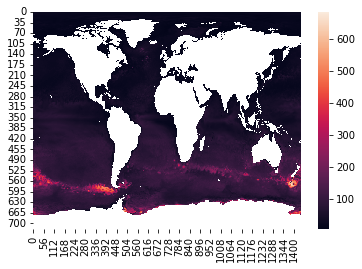

In [202]:
# Plot a month of data to check orientation
sns.heatmap(mld_HR_fix_stack[:,:,5])

In [218]:
# Set starting data index
start_num = 0
# Loop over time dimension in data
for i in range(start_num,mld_HR_fix_stack.shape[2],1):
    
    print(i, end=' ') # Print index value
    start_time = time.time() # Start timer for loop timing
    # Get slice of data
    mld_vals = mld_HR_fix_stack[:,:,i] # Get mld values

    # One month of data in Dataframe
    one_month_data = pd.DataFrame(data=mld_vals, index=lats, columns=lons)

    # Initialise a 1x1 degree grid of zeros
    one_deg_grid = np.zeros((len(range(90,-90,-1)),len(range(-180,180,1))))

    # Loop over latitudes - increments of 1-degree
    for lat_ind,latitude in enumerate(range(90,-90,-1)):
        # Loop over longitudes - increments of 1-degree
        for lon_ind,longitude in enumerate(range(-180,180,1)):
            
            # Get 1x1 degree square of values
            # If/elif statements catch edge values to ensure all data is used
            if (longitude == 179) and (latitude == -89):
                one_deg_square = np.asarray(one_month_data.loc[(one_month_data.index <= latitude) & (one_month_data.index >= latitude-1),(one_month_data.columns >= longitude) & (one_month_data.columns <= longitude+1)])
            
            elif (longitude == 179):
                one_deg_square = np.asarray(one_month_data.loc[(one_month_data.index <= latitude) & (one_month_data.index > latitude-1),(one_month_data.columns >= longitude) & (one_month_data.columns <= longitude+1)])
                
            elif (latitude == -89):
                one_deg_square = np.asarray(one_month_data.loc[(one_month_data.index <= latitude) & (one_month_data.index >= latitude-1),(one_month_data.columns >= longitude) & (one_month_data.columns < longitude+1)])
                
            else:
                one_deg_square = np.asarray(one_month_data.loc[(one_month_data.index <= latitude) & (one_month_data.index > latitude-1),(one_month_data.columns >= longitude) & (one_month_data.columns < longitude+1)])

            # If all values in square are NaN, set the square mean and NaN
            if np.isnan(one_deg_square).all() == True:
                one_deg_mean = np.nan
                
            # Else set to the mean of the values in the square (excluding NaNs)
            else:
                one_deg_mean = np.nanmean(one_deg_square)

            # Append chl-a mean to grid
            one_deg_grid[lat_ind, lon_ind] = one_deg_mean
            
    
    # Create/append to 3D array of one degree grids
    if i == start_num: # Creates array if i is equal to start num, and allows the loop to be run in stages
        mld_LR_data = one_deg_grid
    else: # Append to 3D array
        mld_LR_data = np.dstack((mld_LR_data, one_deg_grid))
    
    # End loop timer
    end_time = time.time()
    # Print data shape and time taken
    print(mld_LR_data.shape, round(end_time-start_time,3))
    

0 (180, 360) 29.707
1 (180, 360, 2) 30.151
2 (180, 360, 3) 29.2
3 (180, 360, 4) 28.826
4 (180, 360, 5) 28.825
5 (180, 360, 6) 29.778
6 (180, 360, 7) 30.408
7 (180, 360, 8) 28.638
8 (180, 360, 9) 29.271
9 (180, 360, 10) 29.235
10 (180, 360, 11) 28.471
11 (180, 360, 12) 27.852
12 (180, 360, 13) 26.911
13 (180, 360, 14) 26.929
14 (180, 360, 15) 28.482
15 (180, 360, 16) 27.986
16 (180, 360, 17) 26.834
17 (180, 360, 18) 26.921
18 (180, 360, 19) 27.258
19 (180, 360, 20) 26.998
20 (180, 360, 21) 26.918
21 (180, 360, 22) 27.155
22 (180, 360, 23) 26.964
23 (180, 360, 24) 26.789
24 (180, 360, 25) 27.624
25 (180, 360, 26) 27.223
26 (180, 360, 27) 26.867
27 (180, 360, 28) 26.866
28 (180, 360, 29) 26.641
29 (180, 360, 30) 26.691
30 (180, 360, 31) 26.755
31 (180, 360, 32) 27.814
32 (180, 360, 33) 26.884
33 (180, 360, 34) 26.745
34 (180, 360, 35) 26.8
35 (180, 360, 36) 26.678
36 (180, 360, 37) 26.729
37 (180, 360, 38) 27.323
38 (180, 360, 39) 28.208
39 (180, 360, 40) 28.067
40 (180, 360, 41) 28.435
4

313 (180, 360, 314) 26.374
314 (180, 360, 315) 26.365
315 (180, 360, 316) 26.349
316 (180, 360, 317) 27.902
317 (180, 360, 318) 26.354
318 (180, 360, 319) 26.383
319 (180, 360, 320) 26.422
320 (180, 360, 321) 26.325
321 (180, 360, 322) 26.416
322 (180, 360, 323) 26.542
323 (180, 360, 324) 26.545
324 (180, 360, 325) 27.437
325 (180, 360, 326) 26.336
326 (180, 360, 327) 26.348
327 (180, 360, 328) 26.226
328 (180, 360, 329) 26.176
329 (180, 360, 330) 26.279
330 (180, 360, 331) 26.361
331 (180, 360, 332) 26.304
332 (180, 360, 333) 26.477
333 (180, 360, 334) 26.172
334 (180, 360, 335) 26.241
335 (180, 360, 336) 26.373
336 (180, 360, 337) 26.353
337 (180, 360, 338) 27.684
338 (180, 360, 339) 26.685
339 (180, 360, 340) 26.297
340 (180, 360, 341) 26.296
341 (180, 360, 342) 26.375
342 (180, 360, 343) 26.339
343 (180, 360, 344) 26.227
344 (180, 360, 345) 26.522
345 (180, 360, 346) 26.436
346 (180, 360, 347) 26.207
347 (180, 360, 348) 26.195
348 (180, 360, 349) 26.261
349 (180, 360, 350) 26.338
3

In [221]:
# Flatten data
for d in range(0, mld_LR_data.shape[2]):
    if d == 0:
        mld_LR_flat = mld_LR_data[:,:,d]
    else:
        mld_LR_flat = np.concatenate((mld_LR_flat, mld_LR_data[:,:,d]))
        
# Get shape of data
print(mld_LR_flat.shape)
# Save data
np.savetxt('mld_LR_flat.csv',mld_LR_flat, delimiter=',')

<AxesSubplot:>

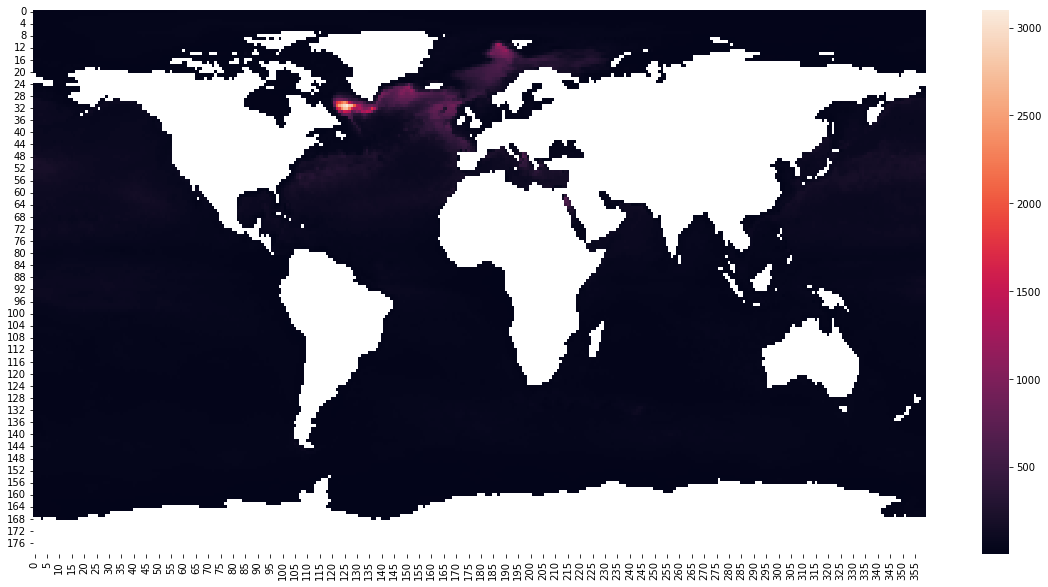

In [232]:
# Plot section to check data
plt.figure(figsize=(20,10))
sns.heatmap(mld_LR_data[:,:,0])

## Add climatolgies ##

In [4]:
# Get low resolution data
mld_data = np.loadtxt('mld_LR_flat.csv', delimiter=',')

In [5]:
# Convert data into 3d array
for r in range(0,mld_data.shape[0],180):
    if r==0:
        mld_stack = mld_data[r:r+180,:]
    else:
        mld_stack = np.dstack((mld_stack,mld_data[r:r+180,:]))

# Print data shape
print(mld_stack.shape)

(180, 360, 363)


In [6]:
### FILL PAST VALUES ###
num_idxs = 15 * 12 # Get number of years to average over in months
# Loop over start months e.g. 0=Jan -> 11=Dec.
for d in range(0,12):
    # Get all values of specific month by indexing every 12th slice, then average
    month_climatology = np.nanmean(mld_stack[:,:,d:num_idxs:12],axis=2)
    # If month is Jan (0) initialise climatology array
    if d == 0:
        past_climatology = month_climatology
    
    # Else append to climatology array
    else:
        past_climatology = np.dstack((past_climatology,month_climatology))

# Print shape of climatology array
print(past_climatology.shape)

/Users/joshblannin/opt/anaconda3/envs/python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


(180, 360, 12)


In [7]:
# Repeat climatology data for all missing historic years (1990 & 1991 here)
mld_clim_90_91 = np.tile(past_climatology,(1,1,2))
# Print shape as check
mld_clim_90_91.shape

(180, 360, 24)

In [8]:
# Get data only up to 2021 (i.e. dont' select 3 months of 2022)
mld_92_21 = mld_stack[:,:,:-3]
# Print data shape as check
print(mld_92_21.shape)

(180, 360, 360)

In [9]:
# Concatentate replicated climatology with true selected data
mld_wClim = np.concatenate((mld_clim_90_91,mld_92_21), axis=2)
# Print data shape as check
print(mld_wClim.shape)

(180, 360, 384)

In [10]:
# Flatten data for saving to CSV
for i in range(0, mld_wClim.shape[2]):
    if i == 0:
        mld_flat = mld_wClim[:,:,i]
    else:
        mld_slice = mld_wClim[:,:,i]
        mld_flat = np.concatenate((mld_flat,mld_slice), axis=0)

# Print data shape as check
print(mld_flat.shape)
# Save data to csv 
np.savetxt('mld_wClimatology.csv', mld_flat, delimiter=',')

(69120, 360)